<a href="https://colab.research.google.com/github/jajinkya/Telecom-Customer-Churn-Case-Study/blob/main/Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns", None)

In [ ]:
pwd

'/content'

In [ ]:
cd"/content/drive/My Drive/Machine Learning/Telecom Churn Case Study"

/content/drive/My Drive/Machine Learning/Telecom Churn Case Study


In [ ]:
pwd

'/content/drive/My Drive/Machine Learning/Telecom Churn Case Study'

## Basic Data Stats

In [ ]:
%config InlineBackend.figure_format = 'retina'
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [ ]:
telecom.shape

(99999, 226)

As we see there is almost 1 lac observations and 226 columns as features present in this dataset.

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Out of 226 feautres 179, 35 and 12 are of float ,int and object data type respectively.

In [ ]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [ ]:
telecom['mobile_number'].duplicated().sum()

0

There is no any mobile number is repeated. So all the users are unique.

## Data Cleaning

### Data Inspection

In [ ]:
x =  round(telecom.isnull().mean() * 100 ,2)

In [ ]:
missing_value_percentage = pd.DataFrame(x,index=telecom.columns,columns=['Missing %'])

In [ ]:
missing_value_percentage.sort_values(by='Missing %',ascending=False)

Missing %
arpu_3g_6                     74.85
night_pck_user_6              74.85
total_rech_data_6             74.85
arpu_2g_6                     74.85
max_rech_data_6               74.85
fb_user_6                     74.85
av_rech_amt_data_6            74.85
date_of_last_rech_data_6      74.85
count_rech_2g_6               74.85
count_rech_3g_6               74.85
date_of_last_rech_data_7      74.43
total_rech_data_7             74.43
fb_user_7                     74.43
max_rech_data_7               74.43
night_pck_user_7              74.43
count_rech_2g_7               74.43
av_rech_amt_data_7            74.43
arpu_2g_7                     74.43
count_rech_3g_7               74.43
arpu_3g_7                     74.43
total_rech_data_9             74.08
count_rech_3g_9               74.08
fb_user_9                     74.08
max_rech_data_9               74.08
arpu_3g_9                     74.08
date_of_last_rech_data_9      74.08
night_pck_user_9              74.08
arpu_2g_9                     74.08
count_rech_2g_9               74.08
av_rech_amt_data_9            74.08
total_rech_data_8             73.66
arpu_3g_8                     73.66
fb_user_8                     73.66
night_pck_user_8              73.66
av_rech_amt_data_8            73.66
max_rech_data_8               73.66
count_rech_3g_8               73.66
arpu_2g_8                     73.66
count_rech_2g_8               73.66
date_of_last_rech_data_8      73.66
ic_others_9                    7.75
std_og_mou_9                   7.75
std_og_t2c_mou_9               7.75
isd_ic_mou_9                   7.75
std_ic_mou_9                   7.75
isd_og_mou_9                   7.75
spl_og_mou_9                   7.75
spl_ic_mou_9                   7.75
og_others_9                    7.75
loc_ic_t2t_mou_9               7.75
std_ic_t2o_mou_9               7.75
loc_ic_t2m_mou_9               7.75
std_ic_t2f_mou_9               7.75
loc_ic_t2f_mou_9               7.75
loc_ic_mou_9                   7.75
std_ic_t2m_mou_9               7.75
std_og_t2f_mou_9               7.75
std_og_t2t_mou_9               7.75
std_ic_t2t_mou_9               7.75
loc_og_mou_9                   7.75
roam_og_mou_9                  7.75
loc_og_t2m_mou_9               7.75
loc_og_t2f_mou_9               7.75
roam_ic_mou_9                  7.75
offnet_mou_9                   7.75
loc_og_t2c_mou_9               7.75
loc_og_t2t_mou_9               7.75
std_og_t2m_mou_9               7.75
onnet_mou_9                    7.75
onnet_mou_8                    5.38
std_ic_t2t_mou_8               5.38
std_ic_mou_8                   5.38
loc_ic_t2t_mou_8               5.38
roam_og_mou_8                  5.38
std_ic_t2m_mou_8               5.38
loc_ic_mou_8                   5.38
std_ic_t2f_mou_8               5.38
roam_ic_mou_8                  5.38
std_ic_t2o_mou_8               5.38
loc_og_t2t_mou_8               5.38
loc_ic_t2f_mou_8               5.38
offnet_mou_8                   5.38
loc_ic_t2m_mou_8               5.38
loc_og_t2m_mou_8               5.38
isd_og_mou_8                   5.38
ic_others_8                    5.38
og_others_8                    5.38
spl_ic_mou_8                   5.38
loc_og_t2f_mou_8               5.38
std_og_t2m_mou_8               5.38
spl_og_mou_8                   5.38
std_og_t2c_mou_8               5.38
isd_ic_mou_8                   5.38
loc_og_t2c_mou_8               5.38
std_og_t2f_mou_8               5.38
std_og_t2t_mou_8               5.38
loc_og_mou_8                   5.38
std_og_mou_8                   5.38
date_of_last_rech_9            4.76
std_ic_t2f_mou_6               3.94
ic_others_6                    3.94
isd_ic_mou_6                   3.94
std_ic_t2m_mou_6               3.94
std_ic_mou_6                   3.94
spl_ic_mou_6                   3.94
std_ic_t2o_mou_6               3.94
loc_ic_t2f_mou_6               3.94
loc_ic_t2t_mou_6               3.94
std_og_t2c_mou_6               3.94
std_og_t2f_mou_6               3.94
std_og_mou_6                  

In [ ]:
telecom['count_rech_2g_6'].unique()

array([ 0., nan,  1.,  3.,  4.,  2.,  7.,  8., 12.,  5., 16., 11.,  6.,
       10., 20.,  9., 18., 19., 22., 14., 17., 13., 15., 21., 25., 32.,
       39., 24., 28., 30., 42., 34.])

In [ ]:
telecom['count_rech_3g_6'].unique()

array([ 1., nan,  0.,  5.,  3.,  2.,  8.,  4.,  6., 10., 22.,  7., 13.,
       11., 29., 16., 18., 12., 19.,  9., 23., 14., 17., 15., 21., 28.])

In [ ]:
x = telecom.columns[telecom.columns.str.contains('count_rech')]

In [ ]:
missing_value = {}
for i in x:
    missing_value[i] = telecom[i].isnull().sum()

In [ ]:
missing_value

{'count_rech_2g_6': 74846,
 'count_rech_2g_7': 74428,
 'count_rech_2g_8': 73660,
 'count_rech_2g_9': 74077,
 'count_rech_3g_6': 74846,
 'count_rech_3g_7': 74428,
 'count_rech_3g_8': 73660,
 'count_rech_3g_9': 74077}

In [ ]:
telecom.columns[telecom.columns.str.contains('rech_amt|rech_data|rech_num|count_rech')]

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [ ]:
x = ['max_rech_data_6','total_rech_data_6','av_rech_amt_data_6',
     'arpu_2g_6','arpu_3g_6']
null_inspection = telecom[(telecom['count_rech_2g_6'].isnull()) & (telecom['count_rech_3g_6'].isnull())][x]
null_inspection.head(10)

max_rech_data_6  total_rech_data_6  av_rech_amt_data_6  arpu_2g_6  \
1               NaN                NaN                 NaN        NaN   
2               NaN                NaN                 NaN        NaN   
3               NaN                NaN                 NaN        NaN   
5               NaN                NaN                 NaN        NaN   
6               NaN                NaN                 NaN        NaN   
7               NaN                NaN                 NaN        NaN   
8               NaN                NaN                 NaN        NaN   
9               NaN                NaN                 NaN        NaN   
10              NaN                NaN                 NaN        NaN   
11              NaN                NaN                 NaN        NaN   

    arpu_3g_6  
1         NaN  
2         NaN  
3         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  
10        NaN  
11        NaN

In [ ]:
null_inspection.shape

(74846, 5)

In [ ]:
print("Missing percentage of:\t")
round(null_inspection.isnull().mean() * 100, 2)

Missing percentage of:	


max_rech_data_6       100.0
total_rech_data_6     100.0
av_rech_amt_data_6    100.0
arpu_2g_6             100.0
arpu_3g_6             100.0
dtype: float64

As you can see that when **`count_rech_2g_6`** and **`count_rech_3g_6`** are missing then
- **max_rech_data_6**
- **total_rech_data_6**
- **av_rech_amt_data_6**
- **arpu_2g_6**      
- **arpu_3g_6** 

above columns' respective observation is also missing.  
So we can impute for missing values of count of recharge for 2G and 3G as zero. Then also can fill missing values of above columns as zero.


Since these columns have around 3/4 th of data is missing so we can impute with zero as reasoned above because lossing this much data is costly.

In [ ]:
def missing_impute_by_zero(months:list):
    for month in months:
        month = str(month)
        cols = ['count_rech_2g','count_rech_3g','max_rech_data','total_rech_data','av_rech_amt_data','arpu_2g','arpu_3g']
        for j in cols:
            telecom[j+'_'+ month] = telecom[j+'_'+month].fillna(0)

In [ ]:
missing_impute_by_zero([6,7,8,9])

In [ ]:
x =  round(telecom.isnull().mean() * 100 ,2)
missing_value_percentage = pd.DataFrame(x,index=telecom.columns,columns=['Missing %'])

In [ ]:
missing_value_percentage.sort_values(by='Missing %', ascending=False)

Missing %
fb_user_6                     74.85
date_of_last_rech_data_6      74.85
night_pck_user_6              74.85
fb_user_7                     74.43
date_of_last_rech_data_7      74.43
night_pck_user_7              74.43
night_pck_user_9              74.08
date_of_last_rech_data_9      74.08
fb_user_9                     74.08
fb_user_8                     73.66
night_pck_user_8              73.66
date_of_last_rech_data_8      73.66
std_og_t2m_mou_9               7.75
loc_og_t2m_mou_9               7.75
std_ic_t2f_mou_9               7.75
loc_og_t2f_mou_9               7.75
loc_og_t2c_mou_9               7.75
std_ic_t2m_mou_9               7.75
loc_og_mou_9                   7.75
std_ic_t2t_mou_9               7.75
std_og_t2t_mou_9               7.75
std_og_mou_9                   7.75
loc_ic_mou_9                   7.75
std_og_t2f_mou_9               7.75
loc_ic_t2f_mou_9               7.75
std_og_t2c_mou_9               7.75
loc_og_t2t_mou_9               7.75
loc_ic_t2m_mou_9               7.75
isd_og_mou_9                   7.75
spl_og_mou_9                   7.75
og_others_9                    7.75
std_ic_t2o_mou_9               7.75
loc_ic_t2t_mou_9               7.75
offnet_mou_9                   7.75
ic_others_9                    7.75
std_ic_mou_9                   7.75
spl_ic_mou_9                   7.75
roam_og_mou_9                  7.75
isd_ic_mou_9                   7.75
roam_ic_mou_9                  7.75
onnet_mou_9                    7.75
loc_ic_t2f_mou_8               5.38
std_og_t2f_mou_8               5.38
offnet_mou_8                   5.38
isd_ic_mou_8                   5.38
std_og_t2c_mou_8               5.38
onnet_mou_8                    5.38
std_og_mou_8                   5.38
loc_og_t2t_mou_8               5.38
loc_ic_t2m_mou_8               5.38
isd_og_mou_8                   5.38
loc_ic_t2t_mou_8               5.38
spl_og_mou_8                   5.38
ic_others_8                    5.38
og_others_8                    5.38
loc_ic_mou_8                   5.38
std_ic_t2f_mou_8               5.38
roam_og_mou_8                  5.38
std_ic_t2t_mou_8               5.38
loc_og_t2m_mou_8               5.38
std_og_t2t_mou_8               5.38
roam_ic_mou_8                  5.38
std_ic_mou_8                   5.38
loc_og_mou_8                   5.38
std_ic_t2m_mou_8               5.38
spl_ic_mou_8                   5.38
std_og_t2m_mou_8               5.38
loc_og_t2c_mou_8               5.38
std_ic_t2o_mou_8               5.38
loc_og_t2f_mou_8               5.38
date_of_last_rech_9            4.76
isd_ic_mou_6                   3.94
loc_ic_t2t_mou_6               3.94
spl_ic_mou_6                   3.94
loc_ic_t2m_mou_6               3.94
ic_others_6                    3.94
std_ic_t2f_mou_6               3.94
loc_ic_t2f_mou_6               3.94
std_ic_t2m_mou_6               3.94
loc_ic_mou_6                   3.94
std_ic_t2t_mou_6               3.94
std_ic_mou_6                   3.94
std_ic_t2o_mou_6               3.94
std_og_t2c_mou_6               3.94
std_og_mou_6                   3.94
loc_og_t2f_mou_6               3.94
loc_og_mou_6                   3.94
loc_og_t2m_mou_6               3.94
std_og_t2t_mou_6               3.94
std_og_t2m_mou_6               3.94
loc_og_t2t_mou_6               3.94
std_og_t2f_mou_6               3.94
roam_og_mou_6                  3.94
loc_og_t2c_mou_6               3.94
spl_og_mou_6                   3.94
isd_og_mou_6                   3.94
og_others_6                    3.94
onnet_mou_6                    3.94
offnet_mou_6                   3.94
roam_ic_mou_6                  3.94
onnet_mou_7                    3.86
std_ic_t2o_mou_7               3.86
loc_og_t2m_mou_7               3.86
ic_others_7                    3.86
roam_ic_mou_7                  3.86
std_ic_mou_7                   3.86
loc_og_t2t_mou_7               3.86
offnet_mou_7                   3.86
roam_og_mou_7                  3.86
spl_ic_mou_7                   3.86
loc_og_t2f_mou_7              

##### Facebook User imputation

In [ ]:
telecom['fb_user_6'].unique()

array([ 1., nan,  0.])

As we see that this column is categorical in nature. And for all months some missing values are there which is around 73% - 75% that means around 3/4 th data of that columns is missing so we need impute it.

As mode would skewed the data; So we can categorise it as -1 as new category. As a there might be user would not have smartphone to open the facebook else he/she would not have facebook account.

In [ ]:
x = telecom.columns[telecom.columns.str.contains('fb_user|night_pck')]

In [ ]:
len(x)

8

In [ ]:
telecom[x]= telecom[x].apply(lambda x : x.fillna(-1))

In [ ]:
x =  round(telecom.isnull().mean() * 100 ,2)
missing_value_percentage = pd.DataFrame(x,index=telecom.columns,columns=['Missing %'])

In [ ]:
missing_value_percentage.sort_values(by='Missing %', ascending=False)

Missing %
date_of_last_rech_data_6      74.85
date_of_last_rech_data_7      74.43
date_of_last_rech_data_9      74.08
date_of_last_rech_data_8      73.66
loc_ic_t2t_mou_9               7.75
loc_og_mou_9                   7.75
std_ic_t2f_mou_9               7.75
loc_og_t2t_mou_9               7.75
std_ic_t2m_mou_9               7.75
loc_og_t2m_mou_9               7.75
loc_og_t2f_mou_9               7.75
std_ic_t2t_mou_9               7.75
loc_og_t2c_mou_9               7.75
loc_ic_mou_9                   7.75
std_og_t2m_mou_9               7.75
std_og_t2t_mou_9               7.75
loc_ic_t2f_mou_9               7.75
std_ic_t2o_mou_9               7.75
loc_ic_t2m_mou_9               7.75
std_og_t2f_mou_9               7.75
std_og_t2c_mou_9               7.75
std_og_mou_9                   7.75
og_others_9                    7.75
isd_og_mou_9                   7.75
roam_og_mou_9                  7.75
spl_og_mou_9                   7.75
roam_ic_mou_9                  7.75
onnet_mou_9                    7.75
ic_others_9                    7.75
spl_ic_mou_9                   7.75
offnet_mou_9                   7.75
std_ic_mou_9                   7.75
isd_ic_mou_9                   7.75
std_ic_t2o_mou_8               5.38
isd_ic_mou_8                   5.38
std_og_t2t_mou_8               5.38
spl_ic_mou_8                   5.38
loc_ic_t2f_mou_8               5.38
std_og_t2m_mou_8               5.38
loc_ic_t2m_mou_8               5.38
std_og_t2f_mou_8               5.38
loc_ic_mou_8                   5.38
std_og_t2c_mou_8               5.38
loc_ic_t2t_mou_8               5.38
std_og_mou_8                   5.38
ic_others_8                    5.38
og_others_8                    5.38
isd_og_mou_8                   5.38
roam_og_mou_8                  5.38
std_ic_t2m_mou_8               5.38
onnet_mou_8                    5.38
loc_og_t2c_mou_8               5.38
std_ic_t2t_mou_8               5.38
roam_ic_mou_8                  5.38
std_ic_t2f_mou_8               5.38
offnet_mou_8                   5.38
loc_og_t2f_mou_8               5.38
loc_og_t2t_mou_8               5.38
spl_og_mou_8                   5.38
loc_og_mou_8                   5.38
loc_og_t2m_mou_8               5.38
std_ic_mou_8                   5.38
date_of_last_rech_9            4.76
std_ic_t2f_mou_6               3.94
og_others_6                    3.94
std_ic_mou_6                   3.94
loc_ic_t2m_mou_6               3.94
loc_ic_t2t_mou_6               3.94
ic_others_6                    3.94
std_ic_t2m_mou_6               3.94
loc_ic_t2f_mou_6               3.94
isd_ic_mou_6                   3.94
spl_ic_mou_6                   3.94
std_ic_t2t_mou_6               3.94
loc_ic_mou_6                   3.94
std_ic_t2o_mou_6               3.94
roam_og_mou_6                  3.94
std_og_mou_6                   3.94
loc_og_t2f_mou_6               3.94
loc_og_mou_6                   3.94
loc_og_t2m_mou_6               3.94
std_og_t2t_mou_6               3.94
std_og_t2m_mou_6               3.94
loc_og_t2t_mou_6               3.94
std_og_t2f_mou_6               3.94
std_og_t2c_mou_6               3.94
loc_og_t2c_mou_6               3.94
roam_ic_mou_6                  3.94
isd_og_mou_6                   3.94
offnet_mou_6                   3.94
onnet_mou_6                    3.94
spl_og_mou_6                   3.94
loc_og_t2t_mou_7               3.86
ic_others_7                    3.86
loc_og_t2m_mou_7               3.86
isd_ic_mou_7                   3.86
std_ic_t2f_mou_7               3.86
onnet_mou_7                    3.86
std_ic_mou_7                   3.86
std_ic_t2o_mou_7               3.86
roam_og_mou_7                  3.86
offnet_mou_7                   3.86
std_ic_t2m_mou_7               3.86
roam_ic_mou_7                  3.86
spl_og_mou_7                   3.86
spl_ic_mou_7                   3.86
loc_og_t2f_mou_7               3.86
loc_ic_t2f_mou_7               3.86
og_others_7                    3.86
std_og_mou_7                   3.86
loc_ic_t2t_mou_7              

### Imputation

#### Dropping of some unnecessary columns after filling missing values

In [ ]:
cols = ['std_ic_t2t_mou_6','std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6',
       'std_ic_mou_6']

cols_2 = ['total_ic_mou_6','loc_ic_mou_6','std_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','ic_others_6'
         ,'spl_ic_mou_6']

In [ ]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [ ]:
std_ic_mou_6 = telecom[cols]

In [ ]:
std_ic_mou_6.head()

std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_t2o_mou_6  \
0               NaN               NaN               NaN               NaN   
1              0.00              5.90              0.00               0.0   
2             72.41             45.18             21.73               0.0   
3             43.48              1.33              1.18               0.0   
4              0.00              1.93              0.00               0.0   

   std_ic_mou_6  
0           NaN  
1          5.90  
2        139.33  
3         45.99  
4          1.93

In [ ]:
column_list =  list(std_ic_mou_6)
column_list

['std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6']

In [ ]:
column_list.remove("std_ic_mou_6")

In [ ]:
std_ic_mou_6['total_std_ic_mou_6'] = std_ic_mou_6[column_list].sum(axis=1)

In [ ]:
std_ic_mou_6.head(10)

std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_t2o_mou_6  \
0               NaN               NaN               NaN               NaN   
1              0.00              5.90              0.00               0.0   
2             72.41             45.18             21.73               0.0   
3             43.48              1.33              1.18               0.0   
4              0.00              1.93              0.00               0.0   
5              0.00              0.00             77.03               0.0   
6              0.00              1.39              0.00               0.0   
7             36.89             91.44             52.19               0.0   
8              0.00             22.43              0.00               0.0   
9              0.30             32.86              0.00               0.0   

   std_ic_mou_6  total_std_ic_mou_6  
0           NaN                0.00  
1          5.90                5.90  
2        139.33              139.32  
3         45.99               45.99  
4          1.93                1.93  
5         77.03               77.03  
6          1.39                1.39  
7        180.54              180.52  
8         22.43               22.43  
9         33.16               33.16

As you can see that **`total_std_ic_mou_6`** and **`std_ic_mou_6`** are almost same; as `total_std_ic_mou_6` is sum of the first four columns;so the `nan` value in the `std_ic_mou_6` would be sum of the first four columns of the data which are also missing so we can fill them with zero value.

In [ ]:
telecom.columns[telecom.columns.str.contains('loc_ic')]

Index(['loc_ic_t2o_mou', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'loc_ic_mou_9'],
      dtype='object')

In [ ]:
cols = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']
loc_ic_mou_6 = telecom[cols]
loc_ic_mou_6.head()
    

loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6
0               NaN               NaN               NaN           NaN
1              1.61             17.48              0.00         19.09
2            115.69             14.38             99.48        229.56
3             62.08            113.96             57.43        233.48
4            105.68            106.84              1.50        214.03

In [ ]:
column_list =  list(loc_ic_mou_6)
column_list

['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']

In [ ]:
column_list.remove("loc_ic_mou_6")

In [ ]:
loc_ic_mou_6['total_local_ic_mou_6'] = loc_ic_mou_6[column_list].sum(axis=1)
loc_ic_mou_6.head(10)

loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
0               NaN               NaN               NaN           NaN   
1              1.61             17.48              0.00         19.09   
2            115.69             14.38             99.48        229.56   
3             62.08            113.96             57.43        233.48   
4            105.68            106.84              1.50        214.03   
5             28.73             49.19              0.00         77.93   
6           1857.99            248.64             20.24       2126.89   
7             58.14            217.56            152.16        427.88   
8             23.84             57.58              0.00         81.43   
9            129.34            132.94              0.40        262.69   

   total_local_ic_mou_6  
0                  0.00  
1                 19.09  
2                229.55  
3                233.47  
4                214.02  
5                 77.92  
6               2126.87  
7                427.86  
8                 81.42  
9                262.68

In [ ]:
# now lets look fot the total incoming minutes of usage for the 6th month
# it is the addition of all other incoming minutes of usage variable.

inc_6 = ['total_ic_mou_6','loc_ic_mou_6','std_ic_mou_6',
         'isd_ic_mou_6','ic_others_6','spl_ic_mou_6',]

total_ic = telecom[inc_6]

In [ ]:
total_ic.head()

total_ic_mou_6  loc_ic_mou_6  std_ic_mou_6  isd_ic_mou_6  ic_others_6  \
0            0.00           NaN           NaN           NaN          NaN   
1           26.83         19.09          5.90          1.83         0.00   
2          370.04        229.56        139.33          0.00         0.93   
3          280.08        233.48         45.99          0.00         0.00   
4          216.44        214.03          1.93          0.00         0.48   

   spl_ic_mou_6  
0           NaN  
1          0.00  
2          0.21  
3          0.59  
4          0.00

In [ ]:
column_list = list(total_ic)
column_list

['total_ic_mou_6',
 'loc_ic_mou_6',
 'std_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'spl_ic_mou_6']

In [ ]:
column_list.remove('total_ic_mou_6')
total_ic['total_mou_6'] = total_ic[column_list].sum(axis=1)
total_ic.head(10)

total_ic_mou_6  loc_ic_mou_6  std_ic_mou_6  isd_ic_mou_6  ic_others_6  \
0            0.00           NaN           NaN           NaN          NaN   
1           26.83         19.09          5.90          1.83         0.00   
2          370.04        229.56        139.33          0.00         0.93   
3          280.08        233.48         45.99          0.00         0.00   
4          216.44        214.03          1.93          0.00         0.48   
5          155.39         77.93         77.03          0.00         0.00   
6         2128.41       2126.89          1.39          0.00         0.11   
7          626.46        427.88        180.54          2.06        15.74   
8          103.86         81.43         22.43          0.00         0.00   
9          303.98        262.69         33.16          8.11         0.00   

   spl_ic_mou_6  total_mou_6  
0           NaN         0.00  
1          0.00        26.82  
2          0.21       370.03  
3          0.59       280.06  
4          0.00       216.44  
5          0.43       155.39  
6          0.00      2128.39  
7          0.21       626.43  
8          0.00       103.86  
9          0.00       303.96

Similar case for the outgoing service of the STD and local. As well as this same for all the months.So we can fill missing values of columns with zero.

In [ ]:
def missing_impute_by_zero(months:list):
    for month in months:
        month = str(month)
        cols =['std_ic_t2t_mou','std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou',
              'std_ic_mou','std_og_t2t_mou','std_og_t2m_mou', 'std_og_t2f_mou', 
              'std_og_t2c_mou','std_og_mou','loc_ic_t2t_mou','loc_ic_t2m_mou', 
              'loc_ic_t2f_mou', 'loc_ic_mou','loc_og_t2t_mou','loc_og_t2m_mou', 
              'loc_og_t2f_mou','loc_og_t2c_mou','loc_og_mou','total_ic_mou',
              'loc_ic_mou','std_ic_mou','isd_ic_mou','ic_others','spl_ic_mou',
              'total_og_mou','loc_og_mou','std_og_mou','isd_og_mou','og_others','spl_og_mou']
        for j in cols:
            telecom[j+'_'+ month] = telecom[j+'_'+month].fillna(0)

In [ ]:
missing_impute_by_zero([6,7,8,9])

In [ ]:
round(telecom.isnull().mean()*100, 2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
roam_og_mou_9                7.75
onnet_mou_9                  7.75
roam_ic_mou_9                7.75
offnet_mou_9                 7.75
roam_og_mou_8                5.38
onnet_mou_8                  5.38
roam_ic_mou_8                5.38
offnet_mou_8                 5.38
date_of_last_rech_9          4.76
onnet_mou_6                  3.94
roam_ic_mou_6                3.94
roam_og_mou_6                3.94
offnet_mou_6                 3.94
offnet_mou_7                 3.86
roam_og_mou_7                3.86
roam_ic_mou_7                3.86
onnet_mou_7                  3.86
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
last_date_of_month_8         1.10
std_og_t2o_mou               1.02
loc_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_m

In [ ]:
# from above we can see that some date variables having a high % of missing values.
# also we can drop other date and id columns which not required for analysis

# date columns
date_cols = telecom.columns[telecom.columns.str.contains('date')]
date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [ ]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [ ]:
telecom = telecom.drop(date_cols,axis=1)  # dropping date columns
telecom = telecom.drop('circle_id',axis=1)   # droping id column which is not useful in model 

print(telecom.shape)  # checking for changes
telecom.head()

(99999, 213)


mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0     7000842753             0.0             0.0             0.0  197.385   
1     7001865778             0.0             0.0             0.0   34.047   
2     7001625959             0.0             0.0             0.0  167.690   
3     7001204172             0.0             0.0             0.0  221.338   
4     7000142493             0.0             0.0             0.0  261.636   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  214.816  213.803   21.100          NaN          NaN         0.00   
1  355.074  268.321   86.285        24.11        78.68         7.68   
2  189.058  210.226  290.714        11.54        55.24        37.26   
3  251.102  508.054  389.500        99.91        54.39       310.98   
4  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN              0.00   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00               0.0   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0              0.00              0.00              0.00          0.00   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00     

In [ ]:
# lets find out columns where missing values are still present

missing_cols = telecom.columns[telecom.isnull().any()]
missing_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
      dtype='object')

In [ ]:
# lets first of all create a copy of imputed data, so if aything goes wrong
# we do not have to repeat the same steps again.

telecom_df = telecom.copy()
#telecom_df.set_index(telcom.index,inplace=True)
print(telecom_df.shape)
telecom_df.head()

(99999, 213)


mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0     7000842753             0.0             0.0             0.0  197.385   
1     7001865778             0.0             0.0             0.0   34.047   
2     7001625959             0.0             0.0             0.0  167.690   
3     7001204172             0.0             0.0             0.0  221.338   
4     7000142493             0.0             0.0             0.0  261.636   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  214.816  213.803   21.100          NaN          NaN         0.00   
1  355.074  268.321   86.285        24.11        78.68         7.68   
2  189.058  210.226  290.714        11.54        55.24        37.26   
3  251.102  508.054  389.500        99.91        54.39       310.98   
4  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN              0.00   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00               0.0   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0              0.00              0.00              0.00          0.00   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00     

Lets try to remove columns which are multicollinear with other columns which do not provide any new information about data.

In [ ]:
telecom_df.columns[telecom_df.columns.str.contains("^loc.*[6-9]$")]

Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'loc_ic_mou_9'],
      dtype='object')

we can remove above column list. 

In [ ]:
X  = telecom_df.drop(labels = telecom_df.columns[telecom_df.columns.str.contains("^loc.*[6-9]$")], axis=1)
X.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0     7000842753             0.0             0.0             0.0  197.385   
1     7001865778             0.0             0.0             0.0   34.047   
2     7001625959             0.0             0.0             0.0  167.690   
3     7001204172             0.0             0.0             0.0  221.338   
4     7000142493             0.0             0.0             0.0  261.636   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  214.816  213.803   21.100          NaN          NaN         0.00   
1  355.074  268.321   86.285        24.11        78.68         7.68   
2  189.058  210.226  290.714        11.54        55.24        37.26   
3  251.102  508.054  389.500        99.91        54.39       310.98   
4  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  std_og_t2t_mou_6  \
0            NaN           0.00            NaN              0.00   
1           0.00           0.00           0.00              0.23   
2           0.00           0.00          70.94              4.34   
3          28.09          39.04           0.00             26.23   
4           0.00           0.00           0.00              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1              4.11              0.00              0.00              0.00   
2             26.49             22.58              8.76             41.81   
3             14.89            289.58            226.21              2.99   
4              0.00              0.00              0.00              9.31   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1              0.46              0.13              0.00              0.00   
2             67.41             75.53              9.28              1.48   
3              1.73              6.53              9.99              0.00   
4              0.00              0.00              0.00              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0              0.00              0.00               0.0               0.0   
1              0.00              0.00               0.0               0.0   
2             14.76             22.83               0.0               0.0   
3              0.00              0.00               0.0               0.0   
4              0.00              0.00               0.0               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  \
0               0.0               0.0               0.0          0.00   
1               0.0               0.0               0.0          0.23   
2               0.0               0.0               0.0         47.64   
3               0.0               0.0               0.0         29.23   
4               0.0     

In [ ]:
X.shape

(99999, 177)

In [ ]:
X = X.drop(labels = X.columns[X.columns.str.contains("^std.*[6-9]$")],axis=1)
X.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0     7000842753             0.0             0.0             0.0  197.385   
1     7001865778             0.0             0.0             0.0   34.047   
2     7001625959             0.0             0.0             0.0  167.690   
3     7001204172             0.0             0.0             0.0  221.338   
4     7000142493             0.0             0.0             0.0  261.636   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  214.816  213.803   21.100          NaN          NaN         0.00   
1  355.074  268.321   86.285        24.11        78.68         7.68   
2  189.058  210.226  290.714        11.54        55.24        37.26   
3  251.102  508.054  389.500        99.91        54.39       310.98   
4  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0            NaN           0.00            NaN           0.0           0.0   
1           0.00           0.00           0.00           0.0           0.0   
2           0.00           0.00          70.94           0.0           0.0   
3          28.09          39.04           0.00           0.0           0.0   
4           0.00           0.00           0.00           0.0           0.0   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          0.00          0.00          0.00   
1           0.0           0.0          4.68         23.43         12.76   
2           0.0           0.0         46.56        236.84         96.84   
3           0.0           0.0         10.96          0.00         18.09   
4           0.0           0.0          0.00          0.00          0.00   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
0          0.00         0.00          0.0          0.0          0.0   
1          0.00         0.00          0.0          0.0          0.0   
2         42.08         0.45          0.0          0.0          0.0   
3         43.29         0.00          0.0          0.0          0.0   
4          5.98         0.00          0.0          0.0          0.0   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   spl_ic_

In [ ]:
X.shape

(99999, 137)

In [ ]:
X = X.drop(labels = X.columns[X.columns.str.contains("^isd.*[6-9]$")],axis=1)
X.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0     7000842753             0.0             0.0             0.0  197.385   
1     7001865778             0.0             0.0             0.0   34.047   
2     7001625959             0.0             0.0             0.0  167.690   
3     7001204172             0.0             0.0             0.0  221.338   
4     7000142493             0.0             0.0             0.0  261.636   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  214.816  213.803   21.100          NaN          NaN         0.00   
1  355.074  268.321   86.285        24.11        78.68         7.68   
2  189.058  210.226  290.714        11.54        55.24        37.26   
3  251.102  508.054  389.500        99.91        54.39       310.98   
4  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  spl_og_mou_6  spl_og_mou_7  \
0            NaN           0.00            NaN          0.00          0.00   
1           0.00           0.00           0.00          4.68         23.43   
2           0.00           0.00          70.94         46.56        236.84   
3          28.09          39.04           0.00         10.96          0.00   
4           0.00           0.00           0.00          0.00          0.00   

   spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  \
0          0.00          0.00         0.00          0.0          0.0   
1         12.76          0.00         0.00          0.0          0.0   
2         96.84         42.08         0.45          0.0          0.0   
3         18.09         43.29         0.00          0.0          0.0   
4          0.00          5.98         0.00          0.0          0.0   

   og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.0            0.00            0.00            0.00   
1          0.0           40.31          178.53          312.44   
2          0.0          155.33          412.94          285.46   
3          0.0          223.23          135.31          352.21   
4          0.0          127.28          241.33          208.16   

   total_og_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0            0.00            0.00            0.00            5.44   
1           72.11           26.83          104.23          423.28   
2          124.94          370.04          519.53          395.03   
3          362.54          280.08          216.61           53.13   
4          104.59          216.44          198.29          338.81   

   total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  \
0            0.00          0.00           0.0           0.0          0.00   
1          188.04          0.00           0.0           0.0          0.00   
2          517.74          0.21           0.0           0.0          0.45   
3          305.38          0.59           0.0           0.0          0.55   
4          205.31          0.00           0.0           0.0          0.18   

   ic_othe

In [ ]:
X.shape

(99999, 129)

In [ ]:
X = X.drop(labels = X.columns[X.columns.str.contains("^spl.*[6-9]$")],axis=1)
X.shape

(99999, 121)

In [ ]:
X = X.drop(labels = X.columns[X.columns.str.contains("^ic_others.*[6-9]$")],axis=1)
X.shape

(99999, 117)

In [ ]:
X = X.drop(labels= X.columns[X.columns.str.contains("^og_others.*[6-9]$")],axis=1)
X.shape

(99999, 113)

In [ ]:
# checking total_rech_data_6 is a addition of 'count_rech_3g_6' and 'count_rech_2g_6'
X['total_rech_data_6'].equals(X['count_rech_3g_6'] + X['count_rech_2g_6'])


True

In [ ]:
X = X.drop(labels = X.columns[X.columns.str.contains("count.*[6-9]$")],axis=1)
X.shape

(99999, 105)

In [ ]:
X.columns[X.columns.str.contains(".*t2o.*")]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], dtype='object')

In [ ]:
X = X.drop(labels = X.columns[X.columns.str.contains(".*t2o.*")],axis=1)
X.shape

(99999, 102)

In [ ]:
X.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0                 4                 3                 2                 6   
1                 4                 9                11                 5   
2                 5                 4                 2                 7   
3                10                11                18                14   
4                 5                 6                 3                 4   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0               362               252               252                 0   
1                74               384               283               121   
2               168               315               116               358   
3               230               310               601               410   
4               196               350               287               200   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0             252             252             252               0   
1              44             154              65              50   
2              86             200              86             100   
3              60              50              50              50   
4              56             110             110              50   

   last_day_rch_amt_6  last_day_rc

In [ ]:
round(X.isnull().mean()*100, 2).sort_values(ascending=False)

roam_og_mou_9         7.75
roam_ic_mou_9         7.75
offnet_mou_9          7.75
onnet_mou_9           7.75
roam_ic_mou_8         5.38
onnet_mou_8           5.38
roam_og_mou_8         5.38
offnet_mou_8          5.38
onnet_mou_6           3.94
offnet_mou_6          3.94
roam_ic_mou_6         3.94
roam_og_mou_6         3.94
onnet_mou_7           3.86
offnet_mou_7          3.86
roam_ic_mou_7         3.86
roam_og_mou_7         3.86
last_day_rch_amt_7    0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
max_rech_amt_6        0.00
total_rech_amt_9      0.00
total_rech_amt_8      0.00
max_rech_amt_9        0.00
last_day_rch_amt_6    0.00
sep_vbc_3g            0.00
last_day_rch_amt_8    0.00
last_day_rch_amt_9    0.00
total_rech_amt_6      0.00
total_rech_data_6     0.00
total_rech_data_7     0.00
total_rech_data_8     0.00
total_rech_data_9     0.00
total_rech_amt_7      0.00
total_og_mou_9        0.00
total_rech_num_9      0.00
total_og_mou_8        0.00
arpu_6                0.00
a

In [ ]:
# create datafram copy to proceed further imputation
imputing_df = X.drop('mobile_number', axis=1) 
imputing_df.shape

(99999, 101)

#### Imputation using `IterativeImputer`

In [ ]:
import fancyimpute

In [ ]:
imputing_df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  total_og_mou_6  \
0            NaN           0.00            NaN            0.00   
1           0.00           0.00           0.00           40.31   
2           0.00           0.00          70.94          155.33   
3          28.09          39.04           0.00          223.23   
4           0.00           0.00           0.00          127.28   

   total_og_mou_7  total_og_mou_8  total_og_mou_9  total_ic_mou_6  \
0            0.00            0.00            0.00            0.00   
1          178.53          312.44           72.11           26.83   
2          412.94          285.46          124.94          370.04   
3          135.31          352.21          362.54          280.08   
4          241.33          208.16          104.59          216.44   

   total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  total_rech_num_6  \
0            0.00            5.44            0.00                 4   
1          104.23          423.28          188.04                 4   
2          519.53          395.03          517.74                 5   
3          216.61           53.13          305.38                10   
4          198.29          338.81          205.31                 5   

   total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  \
0                 3                 2                 6               362   
1                 9                11                 5                74   
2                 4                 2                 7               168   
3                11                18                14               230   
4                 6                 3                 4               196   

   total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  \
0               252               252                 0             252   
1               384               283               121              44   
2               315               116               358              86   
3               310               601               410              60   
4               350               287               200              56   

   max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  \
0             252             252               0                 252   
1             154              65              50                  44   
2             200              86             100                   0   
3              50              50              50                  30   
4             110             110              50                  50   

   la

In [ ]:
imputing_df.shape

(99999, 101)

In [ ]:
round(imputing_df.isnull().mean()*100, 2).sort_values(ascending=False)

roam_ic_mou_9         7.75
onnet_mou_9           7.75
roam_og_mou_9         7.75
offnet_mou_9          7.75
roam_og_mou_8         5.38
onnet_mou_8           5.38
offnet_mou_8          5.38
roam_ic_mou_8         5.38
offnet_mou_6          3.94
roam_ic_mou_6         3.94
onnet_mou_6           3.94
roam_og_mou_6         3.94
roam_ic_mou_7         3.86
onnet_mou_7           3.86
offnet_mou_7          3.86
roam_og_mou_7         3.86
max_rech_amt_9        0.00
max_rech_amt_8        0.00
total_rech_amt_8      0.00
max_rech_amt_6        0.00
max_rech_amt_7        0.00
last_day_rch_amt_7    0.00
total_rech_amt_9      0.00
last_day_rch_amt_6    0.00
sep_vbc_3g            0.00
last_day_rch_amt_8    0.00
last_day_rch_amt_9    0.00
total_rech_data_6     0.00
total_rech_amt_6      0.00
total_rech_data_7     0.00
total_rech_data_8     0.00
total_rech_data_9     0.00
total_rech_amt_7      0.00
total_ic_mou_6        0.00
total_rech_num_9      0.00
total_rech_num_8      0.00
total_rech_num_7      0.00
t

In [ ]:
from fancyimpute import IterativeImputer

In [ ]:
#since columns with missing values are having minutes of usage data 
# so as minutes can't be negtive we can set min value as 0
fancy = IterativeImputer(min_value=0,random_state = 42)

In [ ]:
imputed_df = pd.DataFrame(fancy.fit_transform(imputing_df))
imputed_df.columns = imputing_df.columns
imputed_df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100   132.733572   133.485251         0.00   
1   34.047  355.074  268.321   86.285    24.110000    78.680000         7.68   
2  167.690  189.058  210.226  290.714    11.540000    55.240000        37.26   
3  221.338  251.102  508.054  389.500    99.910000    54.390000       310.98   
4  261.636  309.876  238.174  163.426    50.310000   149.440000        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0    130.24797    170.199722     144.70619          0.00    135.043151   
1     18.34000     15.740000      99.84000        304.76     53.760000   
2     74.81000    143.330000     220.59000        208.36    118.910000   
3    241.71000    123.310000     109.01000         71.68    113.540000   
4     58.78000     76.960000      91.88000        124.26     45.810000   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0      134.98857     127.833863           0.00     117.186527     300.883455   
1        0.00000       0.000000           0.00       0.000000       0.000000   
2        0.00000       0.000000           0.00      38.490000       0.000000   
3        0.00000      54.860000          44.38       0.000000       0.000000   
4        0.00000       0.000000           0.00       0.000000       0.000000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  total_og_mou_6  \
0     276.251571           0.00     265.237951            0.00   
1       0.000000           0.00       0.000000           40.31   
2       0.000000           0.00      70.940000          155.33   
3      28.090000          39.04       0.000000          223.23   
4       0.000000           0.00       0.000000          127.28   

   total_og_mou_7  total_og_mou_8  total_og_mou_9  total_ic_mou_6  \
0            0.00            0.00            0.00            0.00   
1          178.53          312.44           72.11           26.83   
2          412.94          285.46          124.94          370.04   
3          135.31          352.21          362.54          280.08   
4          241.33          208.16          104.59          216.44   

   total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  total_rech_num_6  \
0            0.00            5.44            0.00               4.0   
1          104.23          423.28          188.04               4.0   
2          519.53          395.03          517.74               5.0   
3          216.61           53.13          305.38              10.0   
4          198.29          338.81          205.31               5.0   

   total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  \
0               3.0               2.0               6.0             362.0   
1               9.0              11.0               5.0              74.0   
2               4.0               2.0               7.0             168.0   
3              11.0              18.0              14.0             230.0   
4               6.0               3.0               4.0             196.0   

   total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  \
0             252.0             252.0               0.0           252.0   
1             384.0             283.0             121.0            44.0   
2             315.0             116.0             358.0            86.0   
3             310.0             601.0             410.0            60.0   
4             350.0             287.0             200.0            56.0   

   max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  \
0           252.0           252.0             0.0               252.0   
1           154.0            65.0            50.0                44.0   
2           200.0            86.0           100.0                 0.0   
3            50.0            50.0            50.0                30.0   
4           110.0           110.0            50.0                50.0   

   la

In [ ]:
# saving the dataframe 
imputed_df.to_csv('imputed_iterative.csv')

In [ ]:
imputed_df = pd.read_csv("imputed_iterative.csv")
imputed_df.drop(labels='Unnamed: 0',axis=1,inplace=True)
imputed_df.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=101)

In [ ]:
imputed_df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100   132.733572   133.485251         0.00   
1   34.047  355.074  268.321   86.285    24.110000    78.680000         7.68   
2  167.690  189.058  210.226  290.714    11.540000    55.240000        37.26   
3  221.338  251.102  508.054  389.500    99.910000    54.390000       310.98   
4  261.636  309.876  238.174  163.426    50.310000   149.440000        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0    130.24797    170.199722     144.70619          0.00    135.043151   
1     18.34000     15.740000      99.84000        304.76     53.760000   
2     74.81000    143.330000     220.59000        208.36    118.910000   
3    241.71000    123.310000     109.01000         71.68    113.540000   
4     58.78000     76.960000      91.88000        124.26     45.810000   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0      134.98857     127.833863           0.00     117.186527     300.883455   
1        0.00000       0.000000           0.00       0.000000       0.000000   
2        0.00000       0.000000           0.00      38.490000       0.000000   
3        0.00000      54.860000          44.38       0.000000       0.000000   
4        0.00000       0.000000           0.00       0.000000       0.000000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  total_og_mou_6  \
0     276.251571           0.00     265.237951            0.00   
1       0.000000           0.00       0.000000           40.31   
2       0.000000           0.00      70.940000          155.33   
3      28.090000          39.04       0.000000          223.23   
4       0.000000           0.00       0.000000          127.28   

   total_og_mou_7  total_og_mou_8  total_og_mou_9  total_ic_mou_6  \
0            0.00            0.00            0.00            0.00   
1          178.53          312.44           72.11           26.83   
2          412.94          285.46          124.94          370.04   
3          135.31          352.21          362.54          280.08   
4          241.33          208.16          104.59          216.44   

   total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  total_rech_num_6  \
0            0.00            5.44            0.00               4.0   
1          104.23          423.28          188.04               4.0   
2          519.53          395.03          517.74               5.0   
3          216.61           53.13          305.38              10.0   
4          198.29          338.81          205.31               5.0   

   total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  \
0               3.0               2.0               6.0             362.0   
1               9.0              11.0               5.0              74.0   
2               4.0               2.0               7.0             168.0   
3              11.0              18.0              14.0             230.0   
4               6.0               3.0               4.0             196.0   

   total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  \
0             252.0             252.0               0.0           252.0   
1             384.0             283.0             121.0            44.0   
2             315.0             116.0             358.0            86.0   
3             310.0             601.0             410.0            60.0   
4             350.0             287.0             200.0            56.0   

   max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  \
0           252.0           252.0             0.0               252.0   
1           154.0            65.0            50.0                44.0   
2           200.0            86.0           100.0                 0.0   
3            50.0            50.0            50.0                30.0   
4           110.0           110.0            50.0                50.0   

   la

In [ ]:
imputed_df.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
total_og_mou_6        0
total_og_mou_7        0
total_og_mou_8        0
total_og_mou_9        0
total_ic_mou_6        0
total_ic_mou_7        0
total_ic_mou_8        0
total_ic_mou_9        0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt

In [ ]:
X.columns[X.isnull().any()]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
      dtype='object')

Those above columns are filled using `IterativeImputer`

In [ ]:
imputed_df.insert(loc=0, column='mobile_number', value=X.mobile_number)
imputed_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100   132.733572   
1     7001865778   34.047  355.074  268.321   86.285    24.110000   
2     7001625959  167.690  189.058  210.226  290.714    11.540000   
3     7001204172  221.338  251.102  508.054  389.500    99.910000   
4     7000142493  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.485251         0.00    130.24797    170.199722     144.70619   
1    78.680000         7.68     18.34000     15.740000      99.84000   
2    55.240000        37.26     74.81000    143.330000     220.59000   
3    54.390000       310.98    241.71000    123.310000     109.01000   
4   149.440000        83.89     58.78000     76.960000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    135.043151      134.98857     127.833863           0.00   
1        304.76     53.760000        0.00000       0.000000           0.00   
2        208.36    118.910000        0.00000       0.000000           0.00   
3         71.68    113.540000        0.00000      54.860000          44.38   
4        124.26     45.810000        0.00000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0     117.186527     300.883455     276.251571           0.00     265.237951   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0               4.0               3.0               2.0               6.0   
1               4.0               9.0              11.0               5.0   
2               5.0               4.0               2.0               7.0   
3              10.0              11.0              18.0              14.0   
4               5.0               6.0               3.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0             362.0             252.0             252.0               0.0   
1              74.0             384.0             283.0             121.0   
2             168.0             315.0             116.0             358.0   
3             230.0             310.0             601.0             410.0   
4             196.0             350.0             287.0             200.0   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0           252.0           252.0           252.0             0.0   
1            44.0           154.0            65.0            50.0   
2            86.0           200.0            86.0           100.0   
3            60.0            50.0            50.0            50.0   
4            56.0           110.0           110.0            50.0   

   last_day_rch_amt_6  last_day_rc

In [ ]:
imputed_df.shape

(99999, 102)

In [ ]:
cols = imputed_df.columns[imputed_df.columns.str.contains("^onnet.*[6-9]$")|imputed_df.columns.str.contains("^offnet.*[6-9]$")|
                           imputed_df.columns.str.contains("^roam.*[6-9]$")]

cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
      dtype='object')

In [ ]:
imputed_df[cols].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     132.415110    133.665608    133.037464    130.301854    196.642436   
std      291.298487    302.777901    300.529350    296.291435    310.620572   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.030000      7.290000      7.410000      6.630000     36.720000   
50%       37.960000     35.810000     37.160000     37.140000    103.410000   
75%      132.574671    132.660000    133.213509    130.302238    222.550000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     195.024857    194.232593    186.388387      14.792062      11.894298   
std      319.680037    318.412914    307.100354      75.434597      76.102350   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       33.960000     34.500000     31.230000       0.000000       0.000000   
50%       98.510000    101.940000    101.260000       0.000000       0.000000   
75%      217.830000    215.520000    202.850000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean       13.120101      15.077349      24.995645      20.097586   
std        71.203564      62.831054      88.905278      76.985882   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  
count   99999.000000   99999.000000  
mean       24.799110      28.752301  
std        88.550353      89.575730  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max      5337.040000    4428.460000

In [ ]:
round(imputed_df.isnull().mean(),2).sort_values(ascending=False)

sep_vbc_3g            0.0
max_rech_amt_6        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_7        0.0
total_ic_mou_6        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
total_ic_mou_7        0.0
total_og_mou_9        0.0
jun_vbc_3g            0.0
offnet_mou_8          0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_9

After iterative imputation all the columns don't have missing values. So we can now further proceed to derive some new variables and EDA of the data.

### Identification of HVCs

In this highly competitive market, the telecommunications industry experiences an **average of 15-25% annual churn rate**.  
Given the fact that it **costs 5-10 times more** to acquire a new customer than to retain an existing one.  
**Customer retention** has now become even **more important** than **customer acquisition**.

#### Types of Churn:  
- **Revenue Based Churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue.'  
- **Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, or internet data consumption etc. over a period of time.

Since both the defination have some shortcomings but let aside it and lets we agree with second approach i.e **usage based churn** to build model to predict whether customer will churn or not in upcoming month which is september. 

As we loosely accept **Pareto Principle** as 80% of revenue is being generated by 20% of the customer which use respective network service.  
So we should be focus our attention to identify those 20% high value customers(HVCs) for our company. And predict for them whether they will churn or not. That should be our first priority because loosing those customers will leak our revenue for the company.

In [ ]:
imputed_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100   132.733572   
1     7001865778   34.047  355.074  268.321   86.285    24.110000   
2     7001625959  167.690  189.058  210.226  290.714    11.540000   
3     7001204172  221.338  251.102  508.054  389.500    99.910000   
4     7000142493  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.485251         0.00    130.24797    170.199722     144.70619   
1    78.680000         7.68     18.34000     15.740000      99.84000   
2    55.240000        37.26     74.81000    143.330000     220.59000   
3    54.390000       310.98    241.71000    123.310000     109.01000   
4   149.440000        83.89     58.78000     76.960000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    135.043151      134.98857     127.833863           0.00   
1        304.76     53.760000        0.00000       0.000000           0.00   
2        208.36    118.910000        0.00000       0.000000           0.00   
3         71.68    113.540000        0.00000      54.860000          44.38   
4        124.26     45.810000        0.00000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0     117.186527     300.883455     276.251571           0.00     265.237951   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0               4.0               3.0               2.0               6.0   
1               4.0               9.0              11.0               5.0   
2               5.0               4.0               2.0               7.0   
3              10.0              11.0              18.0              14.0   
4               5.0               6.0               3.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0             362.0             252.0             252.0               0.0   
1              74.0             384.0             283.0             121.0   
2             168.0             315.0             116.0             358.0   
3             230.0             310.0             601.0             410.0   
4             196.0             350.0             287.0             200.0   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0           252.0           252.0           252.0             0.0   
1            44.0           154.0            65.0            50.0   
2            86.0           200.0            86.0           100.0   
3            60.0            50.0            50.0            50.0   
4            56.0           110.0           110.0            50.0   

   last_day_rch_amt_6  last_day_rc

In [ ]:
imputed_df.shape

(99999, 102)

In [ ]:
# we can calculate total data recharge amount for 6,7,8 months
# to do these we need to multiply column of total_rech_data and av_rech_amt_data of respective months
for i in range(6,9):
    i= str(i)
    imputed_df['total_data_rech_amt_'+i] = imputed_df["total_rech_data_"+i]  * imputed_df["av_rech_amt_data_"+i]

imputed_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100   132.733572   
1     7001865778   34.047  355.074  268.321   86.285    24.110000   
2     7001625959  167.690  189.058  210.226  290.714    11.540000   
3     7001204172  221.338  251.102  508.054  389.500    99.910000   
4     7000142493  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.485251         0.00    130.24797    170.199722     144.70619   
1    78.680000         7.68     18.34000     15.740000      99.84000   
2    55.240000        37.26     74.81000    143.330000     220.59000   
3    54.390000       310.98    241.71000    123.310000     109.01000   
4   149.440000        83.89     58.78000     76.960000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    135.043151      134.98857     127.833863           0.00   
1        304.76     53.760000        0.00000       0.000000           0.00   
2        208.36    118.910000        0.00000       0.000000           0.00   
3         71.68    113.540000        0.00000      54.860000          44.38   
4        124.26     45.810000        0.00000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0     117.186527     300.883455     276.251571           0.00     265.237951   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0               4.0               3.0               2.0               6.0   
1               4.0               9.0              11.0               5.0   
2               5.0               4.0               2.0               7.0   
3              10.0              11.0              18.0              14.0   
4               5.0               6.0               3.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0             362.0             252.0             252.0               0.0   
1              74.0             384.0             283.0             121.0   
2             168.0             315.0             116.0             358.0   
3             230.0             310.0             601.0             410.0   
4             196.0             350.0             287.0             200.0   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0           252.0           252.0           252.0             0.0   
1            44.0           154.0            65.0            50.0   
2            86.0           200.0            86.0           100.0   
3            60.0            50.0            50.0            50.0   
4            56.0           110.0           110.0            50.0   

   last_day_rch_amt_6  last_day_rc

In [ ]:
cols=imputed_df.columns[imputed_df.columns.str.contains(".*num.*[6-9]")|imputed_df.columns.str.contains("total_rech_amt.*[6-9]")]
cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9'],
      dtype='object')

In [ ]:
imputed_df[cols].head()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0               4.0               3.0               2.0               6.0   
1               4.0               9.0              11.0               5.0   
2               5.0               4.0               2.0               7.0   
3              10.0              11.0              18.0              14.0   
4               5.0               6.0               3.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  
0             362.0             252.0             252.0               0.0  
1              74.0             384.0             283.0             121.0  
2             168.0             315.0             116.0             358.0  
3             230.0             310.0             601.0             410.0  
4             196.0             350.0             287.0             200.0

In [ ]:
imputed_df.shape

(99999, 105)

#### Filtering HVCs

HVCs are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months i.e 6th and 7th months (the good phase).

In [ ]:
imputed_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100   132.733572   
1     7001865778   34.047  355.074  268.321   86.285    24.110000   
2     7001625959  167.690  189.058  210.226  290.714    11.540000   
3     7001204172  221.338  251.102  508.054  389.500    99.910000   
4     7000142493  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.485251         0.00    130.24797    170.199722     144.70619   
1    78.680000         7.68     18.34000     15.740000      99.84000   
2    55.240000        37.26     74.81000    143.330000     220.59000   
3    54.390000       310.98    241.71000    123.310000     109.01000   
4   149.440000        83.89     58.78000     76.960000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    135.043151      134.98857     127.833863           0.00   
1        304.76     53.760000        0.00000       0.000000           0.00   
2        208.36    118.910000        0.00000       0.000000           0.00   
3         71.68    113.540000        0.00000      54.860000          44.38   
4        124.26     45.810000        0.00000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0     117.186527     300.883455     276.251571           0.00     265.237951   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0               4.0               3.0               2.0               6.0   
1               4.0               9.0              11.0               5.0   
2               5.0               4.0               2.0               7.0   
3              10.0              11.0              18.0              14.0   
4               5.0               6.0               3.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0             362.0             252.0             252.0               0.0   
1              74.0             384.0             283.0             121.0   
2             168.0             315.0             116.0             358.0   
3             230.0             310.0             601.0             410.0   
4             196.0             350.0             287.0             200.0   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0           252.0           252.0           252.0             0.0   
1            44.0           154.0            65.0            50.0   
2            86.0           200.0            86.0           100.0   
3            60.0            50.0            50.0            50.0   
4            56.0           110.0           110.0            50.0   

   last_day_rch_amt_6  last_day_rc

In [ ]:
# adding data and talktime recharge of 6th and 7th month to calculate total recharge amount

imputed_df['total_amt_6'] = imputed_df.total_rech_amt_6 + imputed_df.total_data_rech_amt_6
imputed_df['total_amt_7'] = imputed_df.total_rech_amt_7 + imputed_df.total_data_rech_amt_7
imputed_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100   132.733572   
1     7001865778   34.047  355.074  268.321   86.285    24.110000   
2     7001625959  167.690  189.058  210.226  290.714    11.540000   
3     7001204172  221.338  251.102  508.054  389.500    99.910000   
4     7000142493  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.485251         0.00    130.24797    170.199722     144.70619   
1    78.680000         7.68     18.34000     15.740000      99.84000   
2    55.240000        37.26     74.81000    143.330000     220.59000   
3    54.390000       310.98    241.71000    123.310000     109.01000   
4   149.440000        83.89     58.78000     76.960000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    135.043151      134.98857     127.833863           0.00   
1        304.76     53.760000        0.00000       0.000000           0.00   
2        208.36    118.910000        0.00000       0.000000           0.00   
3         71.68    113.540000        0.00000      54.860000          44.38   
4        124.26     45.810000        0.00000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0     117.186527     300.883455     276.251571           0.00     265.237951   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0               4.0               3.0               2.0               6.0   
1               4.0               9.0              11.0               5.0   
2               5.0               4.0               2.0               7.0   
3              10.0              11.0              18.0              14.0   
4               5.0               6.0               3.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0             362.0             252.0             252.0               0.0   
1              74.0             384.0             283.0             121.0   
2             168.0             315.0             116.0             358.0   
3             230.0             310.0             601.0             410.0   
4             196.0             350.0             287.0             200.0   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0           252.0           252.0           252.0             0.0   
1            44.0           154.0            65.0            50.0   
2            86.0           200.0            86.0           100.0   
3            60.0            50.0            50.0            50.0   
4            56.0           110.0           110.0            50.0   

   last_day_rch_amt_6  last_day_rc

In [ ]:
imputed_df['total_amt_6'].equals(imputed_df['total_rech_amt_6']+imputed_df['total_data_rech_amt_6'])

True

Now we have to take average of `total_amt_6` and `total_amt_7` to decide 70th percentile value to filter high value customers.

In [ ]:
imputed_df['avg_total_amt'] = (imputed_df['total_amt_6'] + imputed_df['total_amt_7'])/2
imputed_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100   132.733572   
1     7001865778   34.047  355.074  268.321   86.285    24.110000   
2     7001625959  167.690  189.058  210.226  290.714    11.540000   
3     7001204172  221.338  251.102  508.054  389.500    99.910000   
4     7000142493  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.485251         0.00    130.24797    170.199722     144.70619   
1    78.680000         7.68     18.34000     15.740000      99.84000   
2    55.240000        37.26     74.81000    143.330000     220.59000   
3    54.390000       310.98    241.71000    123.310000     109.01000   
4   149.440000        83.89     58.78000     76.960000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    135.043151      134.98857     127.833863           0.00   
1        304.76     53.760000        0.00000       0.000000           0.00   
2        208.36    118.910000        0.00000       0.000000           0.00   
3         71.68    113.540000        0.00000      54.860000          44.38   
4        124.26     45.810000        0.00000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0     117.186527     300.883455     276.251571           0.00     265.237951   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   
2          155.33          412.94          285.46          124.94   
3          223.23          135.31          352.21          362.54   
4          127.28          241.33          208.16          104.59   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0            0.00            0.00            5.44            0.00   
1           26.83          104.23          423.28          188.04   
2          370.04          519.53          395.03          517.74   
3          280.08          216.61           53.13          305.38   
4          216.44          198.29          338.81          205.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0               4.0               3.0               2.0               6.0   
1               4.0               9.0              11.0               5.0   
2               5.0               4.0               2.0               7.0   
3              10.0              11.0              18.0              14.0   
4               5.0               6.0               3.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0             362.0             252.0             252.0               0.0   
1              74.0             384.0             283.0             121.0   
2             168.0             315.0             116.0             358.0   
3             230.0             310.0             601.0             410.0   
4             196.0             350.0             287.0             200.0   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0           252.0           252.0           252.0             0.0   
1            44.0           154.0            65.0            50.0   
2            86.0           200.0            86.0           100.0   
3            60.0            50.0            50.0            50.0   
4            56.0           110.0           110.0            50.0   

   last_day_rch_amt_6  last_day_rc

In [ ]:
percentile_70 = imputed_df["avg_total_amt"].quantile(0.7)
print(f"Average recharge amount at 70th percetile : {percentile_70}")

Average recharge amount at 70th percetile : 478.0


In [ ]:
# retaining only customers whose avg_total_amt is greater or equal to 70th percentile

telecom_hvcs = imputed_df[imputed_df["avg_total_amt"] >= percentile_70]
print(telecom_hvcs.shape)
telecom_hvcs.head()

(30001, 108)


mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100   132.733572   
7      7000701601  1069.180  1349.850  3171.480  500.000    57.840000   
8      7001524846   378.721   492.223   137.362  166.787   413.690000   
21     7002124215   514.453   597.753   637.760  578.596   102.410000   
23     7000887461    74.350   193.897   366.966  811.480    48.960000   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0    133.485251         0.00   130.247970    170.199722     144.70619   
7     54.680000        52.29   131.230776    453.430000     567.16000   
8    351.030000        35.08    33.460000     94.660000      80.63000   
21   132.110000        85.14   161.630000    757.930000     896.68000   
23    50.660000        33.58    15.740000     85.410000      89.36000   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00    135.043151      134.98857     127.833863           0.00   
7         325.91    113.035909       16.23000      33.490000          31.64   
8         136.48    108.710000        0.00000       0.000000           0.00   
21        983.39    869.890000        0.00000       0.000000           0.00   
23        205.89    111.880000        0.00000       0.000000           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0      117.186527     300.883455     276.251571           0.00     265.237951   
7      115.248364      23.740000      12.590000          38.06     241.213972   
8        0.000000       0.000000       0.000000           0.00       0.000000   
21       0.000000       0.000000       0.000000           0.00       0.000000   
23       0.000000       0.000000       0.000000           0.00       0.000000   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16            0.00   
8           508.36          431.66          171.56          142.18   
21          860.34         1028.79         1068.54         1031.53   
23          134.38          140.04          239.48          127.63   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0             0.00            0.00            5.44            0.00   
7           626.46          558.04          428.74            0.00   
8           103.86           28.49           16.54           34.91   
21          207.09          131.89          261.04          252.61   
23          119.58          222.89          298.33          127.48   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0                4.0               3.0               2.0               6.0   
7                5.0               5.0               7.0               3.0   
8               19.0              21.0              14.0              15.0   
21              22.0              26.0              27.0              17.0   
23               3.0               5.0               4.0               4.0   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0              362.0             252.0             252.0               0.0   
7             1580.0             790.0            3638.0               0.0   
8              437.0             601.0             120.0             186.0   
21             600.0             680.0             718.0             680.0   
23               0.0             454.0             439.0             252.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0            252.0           252.0           252.0             0.0   
7           1580.0           790.0          1580.0             0.0   
8             90.0           154.0            30.0            36.0   
21            50.0            50.0            50.0            50.0   
23             0.0           179.0

#### Tagging the customer

As per given customer who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [ ]:
telecom_hvcs['churn'] = telecom_hvcs.apply(lambda x  : 1 if ((x['total_ic_mou_9'] == 0 )|(x['total_og_mou_9'] == 0))&
                                           ((x['vol_2g_mb_9']==0)|(x['vol_3g_mb_9']==0)) else 0,
                                           axis=1)
telecom_hvcs.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100   132.733572   
7      7000701601  1069.180  1349.850  3171.480  500.000    57.840000   
8      7001524846   378.721   492.223   137.362  166.787   413.690000   
21     7002124215   514.453   597.753   637.760  578.596   102.410000   
23     7000887461    74.350   193.897   366.966  811.480    48.960000   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0    133.485251         0.00   130.247970    170.199722     144.70619   
7     54.680000        52.29   131.230776    453.430000     567.16000   
8    351.030000        35.08    33.460000     94.660000      80.63000   
21   132.110000        85.14   161.630000    757.930000     896.68000   
23    50.660000        33.58    15.740000     85.410000      89.36000   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00    135.043151      134.98857     127.833863           0.00   
7         325.91    113.035909       16.23000      33.490000          31.64   
8         136.48    108.710000        0.00000       0.000000           0.00   
21        983.39    869.890000        0.00000       0.000000           0.00   
23        205.89    111.880000        0.00000       0.000000           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0      117.186527     300.883455     276.251571           0.00     265.237951   
7      115.248364      23.740000      12.590000          38.06     241.213972   
8        0.000000       0.000000       0.000000           0.00       0.000000   
21       0.000000       0.000000       0.000000           0.00       0.000000   
23       0.000000       0.000000       0.000000           0.00       0.000000   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16            0.00   
8           508.36          431.66          171.56          142.18   
21          860.34         1028.79         1068.54         1031.53   
23          134.38          140.04          239.48          127.63   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0             0.00            0.00            5.44            0.00   
7           626.46          558.04          428.74            0.00   
8           103.86           28.49           16.54           34.91   
21          207.09          131.89          261.04          252.61   
23          119.58          222.89          298.33          127.48   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0                4.0               3.0               2.0               6.0   
7                5.0               5.0               7.0               3.0   
8               19.0              21.0              14.0              15.0   
21              22.0              26.0              27.0              17.0   
23               3.0               5.0               4.0               4.0   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0              362.0             252.0             252.0               0.0   
7             1580.0             790.0            3638.0               0.0   
8              437.0             601.0             120.0             186.0   
21             600.0             680.0             718.0             680.0   
23               0.0             454.0             439.0             252.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0            252.0           252.0           252.0             0.0   
7           1580.0           790.0          1580.0             0.0   
8             90.0           154.0            30.0            36.0   
21            50.0            50.0            50.0            50.0   
23             0.0           179.0

In [ ]:
telecom_hvcs['churn'].value_counts()

0    26735
1     3266
Name: churn, dtype: int64

In [ ]:
#checking churn percentage

100*(telecom_hvcs["churn"].value_counts(normalize=True))

0    89.113696
1    10.886304
Name: churn, dtype: float64

In [ ]:
telecom_hvcs.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100   132.733572   
7      7000701601  1069.180  1349.850  3171.480  500.000    57.840000   
8      7001524846   378.721   492.223   137.362  166.787   413.690000   
21     7002124215   514.453   597.753   637.760  578.596   102.410000   
23     7000887461    74.350   193.897   366.966  811.480    48.960000   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0    133.485251         0.00   130.247970    170.199722     144.70619   
7     54.680000        52.29   131.230776    453.430000     567.16000   
8    351.030000        35.08    33.460000     94.660000      80.63000   
21   132.110000        85.14   161.630000    757.930000     896.68000   
23    50.660000        33.58    15.740000     85.410000      89.36000   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00    135.043151      134.98857     127.833863           0.00   
7         325.91    113.035909       16.23000      33.490000          31.64   
8         136.48    108.710000        0.00000       0.000000           0.00   
21        983.39    869.890000        0.00000       0.000000           0.00   
23        205.89    111.880000        0.00000       0.000000           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0      117.186527     300.883455     276.251571           0.00     265.237951   
7      115.248364      23.740000      12.590000          38.06     241.213972   
8        0.000000       0.000000       0.000000           0.00       0.000000   
21       0.000000       0.000000       0.000000           0.00       0.000000   
23       0.000000       0.000000       0.000000           0.00       0.000000   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16            0.00   
8           508.36          431.66          171.56          142.18   
21          860.34         1028.79         1068.54         1031.53   
23          134.38          140.04          239.48          127.63   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0             0.00            0.00            5.44            0.00   
7           626.46          558.04          428.74            0.00   
8           103.86           28.49           16.54           34.91   
21          207.09          131.89          261.04          252.61   
23          119.58          222.89          298.33          127.48   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0                4.0               3.0               2.0               6.0   
7                5.0               5.0               7.0               3.0   
8               19.0              21.0              14.0              15.0   
21              22.0              26.0              27.0              17.0   
23               3.0               5.0               4.0               4.0   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0              362.0             252.0             252.0               0.0   
7             1580.0             790.0            3638.0               0.0   
8              437.0             601.0             120.0             186.0   
21             600.0             680.0             718.0             680.0   
23               0.0             454.0             439.0             252.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0            252.0           252.0           252.0             0.0   
7           1580.0           790.0          1580.0             0.0   
8             90.0           154.0            30.0            36.0   
21            50.0            50.0            50.0            50.0   
23             0.0           179.0

In [ ]:
telecom_hvcs.shape

(30001, 109)

### Derived Features

In [ ]:
telecom_hvcs.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100   132.733572   
7      7000701601  1069.180  1349.850  3171.480  500.000    57.840000   
8      7001524846   378.721   492.223   137.362  166.787   413.690000   
21     7002124215   514.453   597.753   637.760  578.596   102.410000   
23     7000887461    74.350   193.897   366.966  811.480    48.960000   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0    133.485251         0.00   130.247970    170.199722     144.70619   
7     54.680000        52.29   131.230776    453.430000     567.16000   
8    351.030000        35.08    33.460000     94.660000      80.63000   
21   132.110000        85.14   161.630000    757.930000     896.68000   
23    50.660000        33.58    15.740000     85.410000      89.36000   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00    135.043151      134.98857     127.833863           0.00   
7         325.91    113.035909       16.23000      33.490000          31.64   
8         136.48    108.710000        0.00000       0.000000           0.00   
21        983.39    869.890000        0.00000       0.000000           0.00   
23        205.89    111.880000        0.00000       0.000000           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0      117.186527     300.883455     276.251571           0.00     265.237951   
7      115.248364      23.740000      12.590000          38.06     241.213972   
8        0.000000       0.000000       0.000000           0.00       0.000000   
21       0.000000       0.000000       0.000000           0.00       0.000000   
23       0.000000       0.000000       0.000000           0.00       0.000000   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16            0.00   
8           508.36          431.66          171.56          142.18   
21          860.34         1028.79         1068.54         1031.53   
23          134.38          140.04          239.48          127.63   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  \
0             0.00            0.00            5.44            0.00   
7           626.46          558.04          428.74            0.00   
8           103.86           28.49           16.54           34.91   
21          207.09          131.89          261.04          252.61   
23          119.58          222.89          298.33          127.48   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0                4.0               3.0               2.0               6.0   
7                5.0               5.0               7.0               3.0   
8               19.0              21.0              14.0              15.0   
21              22.0              26.0              27.0              17.0   
23               3.0               5.0               4.0               4.0   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0              362.0             252.0             252.0               0.0   
7             1580.0             790.0            3638.0               0.0   
8              437.0             601.0             120.0             186.0   
21             600.0             680.0             718.0             680.0   
23               0.0             454.0             439.0             252.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0            252.0           252.0           252.0             0.0   
7           1580.0           790.0          1580.0             0.0   
8             90.0           154.0            30.0            36.0   
21            50.0            50.0            50.0            50.0   
23             0.0           179.0

Since we can use 9 months data for tagging only. As we did it; need to remove all the respective month columns from our dataframe.

In [ ]:
telecom_hvcs.shape

(30001, 109)

In [ ]:
cols = telecom_hvcs.columns[telecom_hvcs.columns.str.contains("9$")|telecom_hvcs.columns.str.contains("^sep")]
print(cols)
len(cols)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'total_og_mou_9', 'total_ic_mou_9', 'total_rech_num_9',
       'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g'],
      dtype='object')


25

In [ ]:
telecom_hvcs.drop(labels=cols, axis=1,inplace=True) # drop the above columns
telecom_hvcs.shape

(30001, 84)

In [ ]:
telecom_hvcs.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803   132.733572   133.485251   
7      7000701601  1069.180  1349.850  3171.480    57.840000    54.680000   
8      7001524846   378.721   492.223   137.362   413.690000   351.030000   
21     7002124215   514.453   597.753   637.760   102.410000   132.110000   
23     7000887461    74.350   193.897   366.966    48.960000    50.660000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    170.199722     144.70619          0.00      134.98857   
7         52.29    453.430000     567.16000        325.91       16.23000   
8         35.08     94.660000      80.63000        136.48        0.00000   
21        85.14    757.930000     896.68000        983.39        0.00000   
23        33.58     85.410000      89.36000        205.89        0.00000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      127.833863           0.00     300.883455     276.251571           0.00   
7       33.490000          31.64      23.740000      12.590000          38.06   
8        0.000000           0.00       0.000000       0.000000           0.00   
21       0.000000           0.00       0.000000       0.000000           0.00   
23       0.000000           0.00       0.000000       0.000000           0.00   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16          626.46   
8           508.36          431.66          171.56          103.86   
21          860.34         1028.79         1068.54          207.09   
23          134.38          140.04          239.48          119.58   

    total_ic_mou_7  total_ic_mou_8  total_rech_num_6  total_rech_num_7  \
0             0.00            5.44               4.0               3.0   
7           558.04          428.74               5.0               5.0   
8            28.49           16.54              19.0              21.0   
21          131.89          261.04              22.0              26.0   
23          222.89          298.33               3.0               5.0   

    total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
0                2.0             362.0             252.0             252.0   
7                7.0            1580.0             790.0            3638.0   
8               14.0             437.0             601.0             120.0   
21              27.0             600.0             680.0             718.0   
23               4.0               0.0             454.0             439.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
0            252.0           252.0           252.0               252.0   
7           1580.0           790.0          1580.0                 0.0   
8             90.0           154.0            30.0                50.0   
21            50.0            50.0            50.0                30.0   
23             0.0           179.0           179.0                 0.0   

    last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  \
0                252.0               252.0                1.0   
7                  0.0               779.0                0.0   
8                  0.0                10.0                0.0   
21                20.0                50.0                0.0   
23               179.0                 0.0                0.0   

    total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
0                 1.0                1.0            252.0            252.0   
7                 0.0                0.0              0.0              0.0   
8                 2.0                3.0              0.0            154.0   
21                0.0                0.0              0.0              0.0   
23                2.0               

In [ ]:
telecom_derived = telecom_hvcs.copy()
telecom_derived.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803   132.733572   133.485251   
7      7000701601  1069.180  1349.850  3171.480    57.840000    54.680000   
8      7001524846   378.721   492.223   137.362   413.690000   351.030000   
21     7002124215   514.453   597.753   637.760   102.410000   132.110000   
23     7000887461    74.350   193.897   366.966    48.960000    50.660000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    170.199722     144.70619          0.00      134.98857   
7         52.29    453.430000     567.16000        325.91       16.23000   
8         35.08     94.660000      80.63000        136.48        0.00000   
21        85.14    757.930000     896.68000        983.39        0.00000   
23        33.58     85.410000      89.36000        205.89        0.00000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      127.833863           0.00     300.883455     276.251571           0.00   
7       33.490000          31.64      23.740000      12.590000          38.06   
8        0.000000           0.00       0.000000       0.000000           0.00   
21       0.000000           0.00       0.000000       0.000000           0.00   
23       0.000000           0.00       0.000000       0.000000           0.00   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16          626.46   
8           508.36          431.66          171.56          103.86   
21          860.34         1028.79         1068.54          207.09   
23          134.38          140.04          239.48          119.58   

    total_ic_mou_7  total_ic_mou_8  total_rech_num_6  total_rech_num_7  \
0             0.00            5.44               4.0               3.0   
7           558.04          428.74               5.0               5.0   
8            28.49           16.54              19.0              21.0   
21          131.89          261.04              22.0              26.0   
23          222.89          298.33               3.0               5.0   

    total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
0                2.0             362.0             252.0             252.0   
7                7.0            1580.0             790.0            3638.0   
8               14.0             437.0             601.0             120.0   
21              27.0             600.0             680.0             718.0   
23               4.0               0.0             454.0             439.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
0            252.0           252.0           252.0               252.0   
7           1580.0           790.0          1580.0                 0.0   
8             90.0           154.0            30.0                50.0   
21            50.0            50.0            50.0                30.0   
23             0.0           179.0           179.0                 0.0   

    last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  \
0                252.0               252.0                1.0   
7                  0.0               779.0                0.0   
8                  0.0                10.0                0.0   
21                20.0                50.0                0.0   
23               179.0                 0.0                0.0   

    total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
0                 1.0                1.0            252.0            252.0   
7                 0.0                0.0              0.0              0.0   
8                 2.0                3.0              0.0            154.0   
21                0.0                0.0              0.0              0.0   
23                2.0               

In [ ]:
telecom_data_raw= telecom_hvcs.copy()

In [ ]:
telecom_derived.shape

(30001, 84)

`change_arpu_7_6` is change for arpu of 7 and 6.

In [ ]:
for i in range(6,9):
    if 'arpu_'+  str(i+1) in telecom_derived:
        value = telecom_derived['arpu_'+str(i+1)] - telecom_derived['arpu_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("arpu_"+str(i+1)) + 1,column='change_arpu_'+str(i+1)+'_'+str(i), value=value)
    else:
        break

In [ ]:
for i in range(6,9):
    if 'onnet_mou_'+  str(i+1) in telecom_derived:
        value = telecom_derived['onnet_mou_'+str(i+1)] - telecom_derived['onnet_mou_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("onnet_mou_"+str(i+1)) + 1,column='change_onnet_mou'+str(i+1)+'_'+str(i), value=value)
    else:
        break

In [ ]:
for i in range(6,9):
    if 'offnet_mou_'+  str(i+1) in telecom_derived:
        value = telecom_derived['offnet_mou_'+str(i+1)] - telecom_derived['offnet_mou_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("offnet_mou_"+str(i+1)) + 1,column='change_offnet_mou'+str(i+1)+'_'+str(i), value=value)
    else:
        break

addition of roaming incoming and outgoing with respective total incoming and outgoing minutes of usage for respective months.

In [ ]:
for i in range(6,9):
    if 'total_og_mou_'+  str(i) in telecom_derived:
        value = telecom_derived['roam_og_mou_'+str(i)] + telecom_derived['total_og_mou_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("total_og_mou_"+str(i)) + 1,column='grand_total_og_mou_'+str(i), value=value)
    else:
        break


In [ ]:
for i in range(6,9):
    if 'total_ic_mou_'+  str(i) in telecom_derived:
        value = telecom_derived['roam_ic_mou_'+str(i)] + telecom_derived['total_ic_mou_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("total_ic_mou_"+str(i)) + 1,column='grand_total_ic_mou_'+str(i), value=value)
    else:
        break

In [ ]:
for i in range(6,9):
    if 'arpu_2g_'+  str(i) in telecom_derived:
        value = telecom_derived['arpu_2g_'+str(i)] + telecom_derived['arpu_3g_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("arpu_2g_"+str(i)) + 1,column='arpu_total_data_'+str(i), value=value)
    else:
        break

In [ ]:
for i in range(6,9):
    if 'vol_3g_mb_'+  str(i) in telecom_derived:
        value = telecom_derived['vol_2g_mb_'+str(i)] + telecom_derived['vol_3g_mb_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("vol_3g_mb_"+str(i)) + 1,column='total_data_vol_'+str(i), value=value)
    else:
        break

In [ ]:
telecom_derived.head()

mobile_number    arpu_6    arpu_7  change_arpu_7_6    arpu_8  \
0      7000842753   197.385   214.816           17.431   213.803   
7      7000701601  1069.180  1349.850          280.670  3171.480   
8      7001524846   378.721   492.223          113.502   137.362   
21     7002124215   514.453   597.753           83.300   637.760   
23     7000887461    74.350   193.897          119.547   366.966   

    change_arpu_8_7  onnet_mou_6  onnet_mou_7  change_onnet_mou7_6  \
0            -1.013   132.733572   133.485251             0.751679   
7          1821.630    57.840000    54.680000            -3.160000   
8          -354.861   413.690000   351.030000           -62.660000   
21           40.007   102.410000   132.110000            29.700000   
23          173.069    48.960000    50.660000             1.700000   

    onnet_mou_8  change_onnet_mou8_7  offnet_mou_6  offnet_mou_7  \
0          0.00          -133.485251    170.199722     144.70619   
7         52.29            -2.390000    453.430000     567.16000   
8         35.08          -315.950000     94.660000      80.63000   
21        85.14           -46.970000    757.930000     896.68000   
23        33.58           -17.080000     85.410000      89.36000   

    change_offnet_mou7_6  offnet_mou_8  change_offnet_mou8_7  roam_ic_mou_6  \
0             -25.493532          0.00            -144.70619      134.98857   
7             113.730000        325.91            -241.25000       16.23000   
8             -14.030000        136.48              55.85000        0.00000   
21            138.750000        983.39              86.71000        0.00000   
23              3.950000        205.89             116.53000        0.00000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      127.833863           0.00     300.883455     276.251571           0.00   
7       33.490000          31.64      23.740000      12.590000          38.06   
8        0.000000           0.00       0.000000       0.000000           0.00   
21       0.000000           0.00       0.000000       0.000000           0.00   
23       0.000000           0.00       0.000000       0.000000           0.00   

    total_og_mou_6  grand_total_og_mou_6  total_og_mou_7  \
0             0.00            300.883455            0.00   
7           487.53            511.270000          609.24   
8           508.36            508.360000          431.66   
21          860.34            860.340000         1028.79   
23          134.38            134.380000          140.04   

    grand_total_og_mou_7  total_og_mou_8  grand_total_og_mou_8  \
0             276.251571            0.00                  0.00   
7             621.830000          350.16                388.22   
8             431.660000          171.56                171.56   
21           1028.790000         1068.54               1068.54   
23            140.040000          239.48                239.48   

    total_ic_mou_6  grand_total_ic_mou_6  total_ic_mou_7  \
0             0.00             134.98857            0.00   
7           626.46             642.69000          558.04   
8           103.86             103.86000           28.49   
21          207.09             207.09000          131.89   
23          119.58             119.58000          222.89   

    grand_total_ic_mou_7  total_ic_mou_8  grand_total_ic_mou_8  \
0             127.833863            5.44                  5.44   
7             591.530000          428.74                460.38   
8              28.490000           16.54                 16.54   
21            131.890000          261.04                261.04   
23            222.890000          298.33                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                4.0               3.0               2.0             362.0   
7                5.0               5.0               7.0            1580.0   
8               19.0              21.0              1

#### Dropping of some features

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^arpu.*.g.*[6-8]$")|telecom_derived.columns.str.contains("^arpu_[6-8]$")]
cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

Since above columns list is used to derive new features we can remove it because they can not provide any new information to model and also we need to save ourselves from curse of multicollinearity.

In [ ]:
telecom_derived.shape

(30001, 102)

In [ ]:
telecom_derived.drop(labels=cols,axis=1,inplace=True)
telecom_derived.shape

(30001, 93)

In [ ]:
telecom_derived.columns[telecom_derived.columns.str.contains("^arpu")]

Index(['arpu_total_data_6', 'arpu_total_data_7', 'arpu_total_data_8'], dtype='object')

In [ ]:
#similar for the other columns which we used to derive new features
cols = telecom_derived.columns[telecom_derived.columns.str.contains('^o.*')]
print(cols)
telecom_derived.drop(labels=cols, axis=1, inplace=True)
telecom_derived.shape

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')


(30001, 87)

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains('^r.*')|telecom_derived.columns.str.contains('^t.*ic.*')
                                |telecom_derived.columns.str.contains('^t.*og.*')]
cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'],
      dtype='object')

In [ ]:
telecom_derived.drop(labels = cols, axis=1, inplace=True)
telecom_derived.shape

(30001, 75)

In [ ]:
cols = telecom_derived.columns[(telecom_derived.columns.str.contains("sachet.*6$"))|
                               (telecom_derived.columns.str.contains("monthly.*6$"))]
print(cols)
telecom_derived['total_rech_data_6'].equals(telecom_derived.loc[:,cols].sum(axis=1))

Index(['monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6'], dtype='object')


True

This means `total_rech_data_6` which is total number of data recharge is sum of the:-
- `sachet_2g_6`
- `sachet_3g_6`
- `monthly_2g_6`
- `monthly_3g_6`  

And this same case would be for remaining months.So we can remove those columns

In [ ]:
cols = telecom_derived.columns[(telecom_derived.columns.str.contains("sachet.*[6-8]$"))|
                               (telecom_derived.columns.str.contains("monthly.*[6-8]$"))]
cols

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [ ]:
telecom_derived.shape

(30001, 75)

In [ ]:
telecom_derived.drop(labels = cols, axis=1, inplace=True)
telecom_derived.shape

(30001, 63)

In [ ]:
telecom_derived['total_data_rech_amt_6'].equals(telecom_derived['av_rech_amt_data_6']*telecom_derived['total_rech_data_6'])

True

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^av_.*")]
print(cols)
telecom_derived.drop(labels = cols, axis=1,inplace=True)
telecom_derived.shape

Index(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], dtype='object')


(30001, 60)

In [ ]:
cols = ['total_amt_6', 'total_amt_7','avg_total_amt']
telecom_derived.drop(labels = cols, axis=1,inplace=True)
telecom_derived.shape

(30001, 57)

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains('^v')]
cols

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8'],
      dtype='object')

In [ ]:
telecom_derived.drop(labels=cols, axis=1, inplace=True)

In [ ]:
telecom_derived.shape

(30001, 51)

In [ ]:
telecom_derived.head()

mobile_number  change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0      7000842753           17.431           -1.013             0.751679   
7      7000701601          280.670         1821.630            -3.160000   
8      7001524846          113.502         -354.861           -62.660000   
21     7002124215           83.300           40.007            29.700000   
23     7000887461          119.547          173.069             1.700000   

    change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0           -133.485251            -25.493532            -144.70619   
7             -2.390000            113.730000            -241.25000   
8           -315.950000            -14.030000              55.85000   
21           -46.970000            138.750000              86.71000   
23           -17.080000              3.950000             116.53000   

    grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0             300.883455            276.251571                  0.00   
7             511.270000            621.830000                388.22   
8             508.360000            431.660000                171.56   
21            860.340000           1028.790000               1068.54   
23            134.380000            140.040000                239.48   

    grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0              134.98857            127.833863                  5.44   
7              642.69000            591.530000                460.38   
8              103.86000             28.490000                 16.54   
21             207.09000            131.890000                261.04   
23             119.58000            222.890000                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                4.0               3.0               2.0             362.0   
7                5.0               5.0               7.0            1580.0   
8               19.0              21.0              14.0             437.0   
21              22.0              26.0              27.0             600.0   
23               3.0               5.0               4.0               0.0   

    total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0              252.0             252.0           252.0           252.0   
7              790.0            3638.0          1580.0           790.0   
8              601.0             120.0            90.0           154.0   
21             680.0             718.0            50.0            50.0   
23             454.0             439.0             0.0           179.0   

    max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0               252.0               252.0   
7           1580.0                 0.0                 0.0   
8             30.0                50.0                 0.0   
21            50.0                30.0                20.0   
23           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    total_data_vol_6  total_data_vol_7  total_data_vol_8  arpu_total_data_6  \
0              113.7            152.08        

In [ ]:
telecom_derived.columns[telecom_derived.columns.str.contains("^t.*amt.*")]

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8'],
      dtype='object')

In [ ]:
for i in range(6,9):
    if 'total_rech_amt_'+  str(i+1) in telecom_derived:
        value = telecom_derived['total_rech_amt_'+str(i+1)] - telecom_derived['total_rech_amt_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("total_rech_amt_"+str(i+1)) + 1,column='change_total_rech_amt_'+str(i+1)+'_'+str(i), value=value)
    else:
        break

In [ ]:
for i in range(6,9):
    if 'total_data_rech_amt_'+  str(i+1) in telecom_derived:
        value = telecom_derived['total_data_rech_amt_'+str(i+1)] - telecom_derived['total_data_rech_amt_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("total_data_rech_amt_"+str(i+1)) + 1,column='change_total_data_rech_amt_'+str(i+1)+'_'+str(i), value=value)
    else:
        break

In [ ]:
telecom_derived.shape

(30001, 55)

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^t.*amt.*")]
telecom_derived.drop(labels = cols, axis= 1, inplace=True)
print(cols)


Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8'],
      dtype='object')


In [ ]:
telecom_derived.shape

(30001, 49)

In [ ]:
telecom_derived.columns[telecom_derived.columns.str.contains("^ar.*total_data.*")]

Index(['arpu_total_data_6', 'arpu_total_data_7', 'arpu_total_data_8'], dtype='object')

In [ ]:
for i in range(6,9):
    if 'arpu_total_data_'+  str(i+1) in telecom_derived:
        value = telecom_derived['arpu_total_data_'+str(i+1)] - telecom_derived['arpu_total_data_'+str(i)]
        telecom_derived.insert(loc=telecom_derived.columns.get_loc("arpu_total_data_"+str(i+1)) + 1,column='change_arpu_total_data_'+str(i+1)+'_'+str(i), value=value)
    else:
        break

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^ar.*total_data.*")]
telecom_derived.drop(labels=cols, axis=1, inplace=True)
telecom_derived.shape

(30001, 48)

##Exploratory Data Analysis

### Univariate Analysis

#### Before Dropping the Features

In [ ]:
telecom_hvcs.shape

(30001, 84)

In [ ]:
telecom_hvcs.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803   132.733572   133.485251   
7      7000701601  1069.180  1349.850  3171.480    57.840000    54.680000   
8      7001524846   378.721   492.223   137.362   413.690000   351.030000   
21     7002124215   514.453   597.753   637.760   102.410000   132.110000   
23     7000887461    74.350   193.897   366.966    48.960000    50.660000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    170.199722     144.70619          0.00      134.98857   
7         52.29    453.430000     567.16000        325.91       16.23000   
8         35.08     94.660000      80.63000        136.48        0.00000   
21        85.14    757.930000     896.68000        983.39        0.00000   
23        33.58     85.410000      89.36000        205.89        0.00000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      127.833863           0.00     300.883455     276.251571           0.00   
7       33.490000          31.64      23.740000      12.590000          38.06   
8        0.000000           0.00       0.000000       0.000000           0.00   
21       0.000000           0.00       0.000000       0.000000           0.00   
23       0.000000           0.00       0.000000       0.000000           0.00   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16          626.46   
8           508.36          431.66          171.56          103.86   
21          860.34         1028.79         1068.54          207.09   
23          134.38          140.04          239.48          119.58   

    total_ic_mou_7  total_ic_mou_8  total_rech_num_6  total_rech_num_7  \
0             0.00            5.44               4.0               3.0   
7           558.04          428.74               5.0               5.0   
8            28.49           16.54              19.0              21.0   
21          131.89          261.04              22.0              26.0   
23          222.89          298.33               3.0               5.0   

    total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
0                2.0             362.0             252.0             252.0   
7                7.0            1580.0             790.0            3638.0   
8               14.0             437.0             601.0             120.0   
21              27.0             600.0             680.0             718.0   
23               4.0               0.0             454.0             439.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
0            252.0           252.0           252.0               252.0   
7           1580.0           790.0          1580.0                 0.0   
8             90.0           154.0            30.0                50.0   
21            50.0            50.0            50.0                30.0   
23             0.0           179.0           179.0                 0.0   

    last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  \
0                252.0               252.0                1.0   
7                  0.0               779.0                0.0   
8                  0.0                10.0                0.0   
21                20.0                50.0                0.0   
23               179.0                 0.0                0.0   

    total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
0                 1.0                1.0            252.0            252.0   
7                 0.0                0.0              0.0              0.0   
8                 2.0                3.0              0.0            154.0   
21                0.0                0.0              0.0              0.0   
23                2.0               

In [ ]:
telecom_hvcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mobile_number          30001 non-null  int64  
 1   arpu_6                 30001 non-null  float64
 2   arpu_7                 30001 non-null  float64
 3   arpu_8                 30001 non-null  float64
 4   onnet_mou_6            30001 non-null  float64
 5   onnet_mou_7            30001 non-null  float64
 6   onnet_mou_8            30001 non-null  float64
 7   offnet_mou_6           30001 non-null  float64
 8   offnet_mou_7           30001 non-null  float64
 9   offnet_mou_8           30001 non-null  float64
 10  roam_ic_mou_6          30001 non-null  float64
 11  roam_ic_mou_7          30001 non-null  float64
 12  roam_ic_mou_8          30001 non-null  float64
 13  roam_og_mou_6          30001 non-null  float64
 14  roam_og_mou_7          30001 non-null  float64
 15  ro

In [ ]:
import seaborn as sns 

Lets try to plot boxplots of some cotinuous variables.

For `arpu`'s of respective telecom service of the respective months.

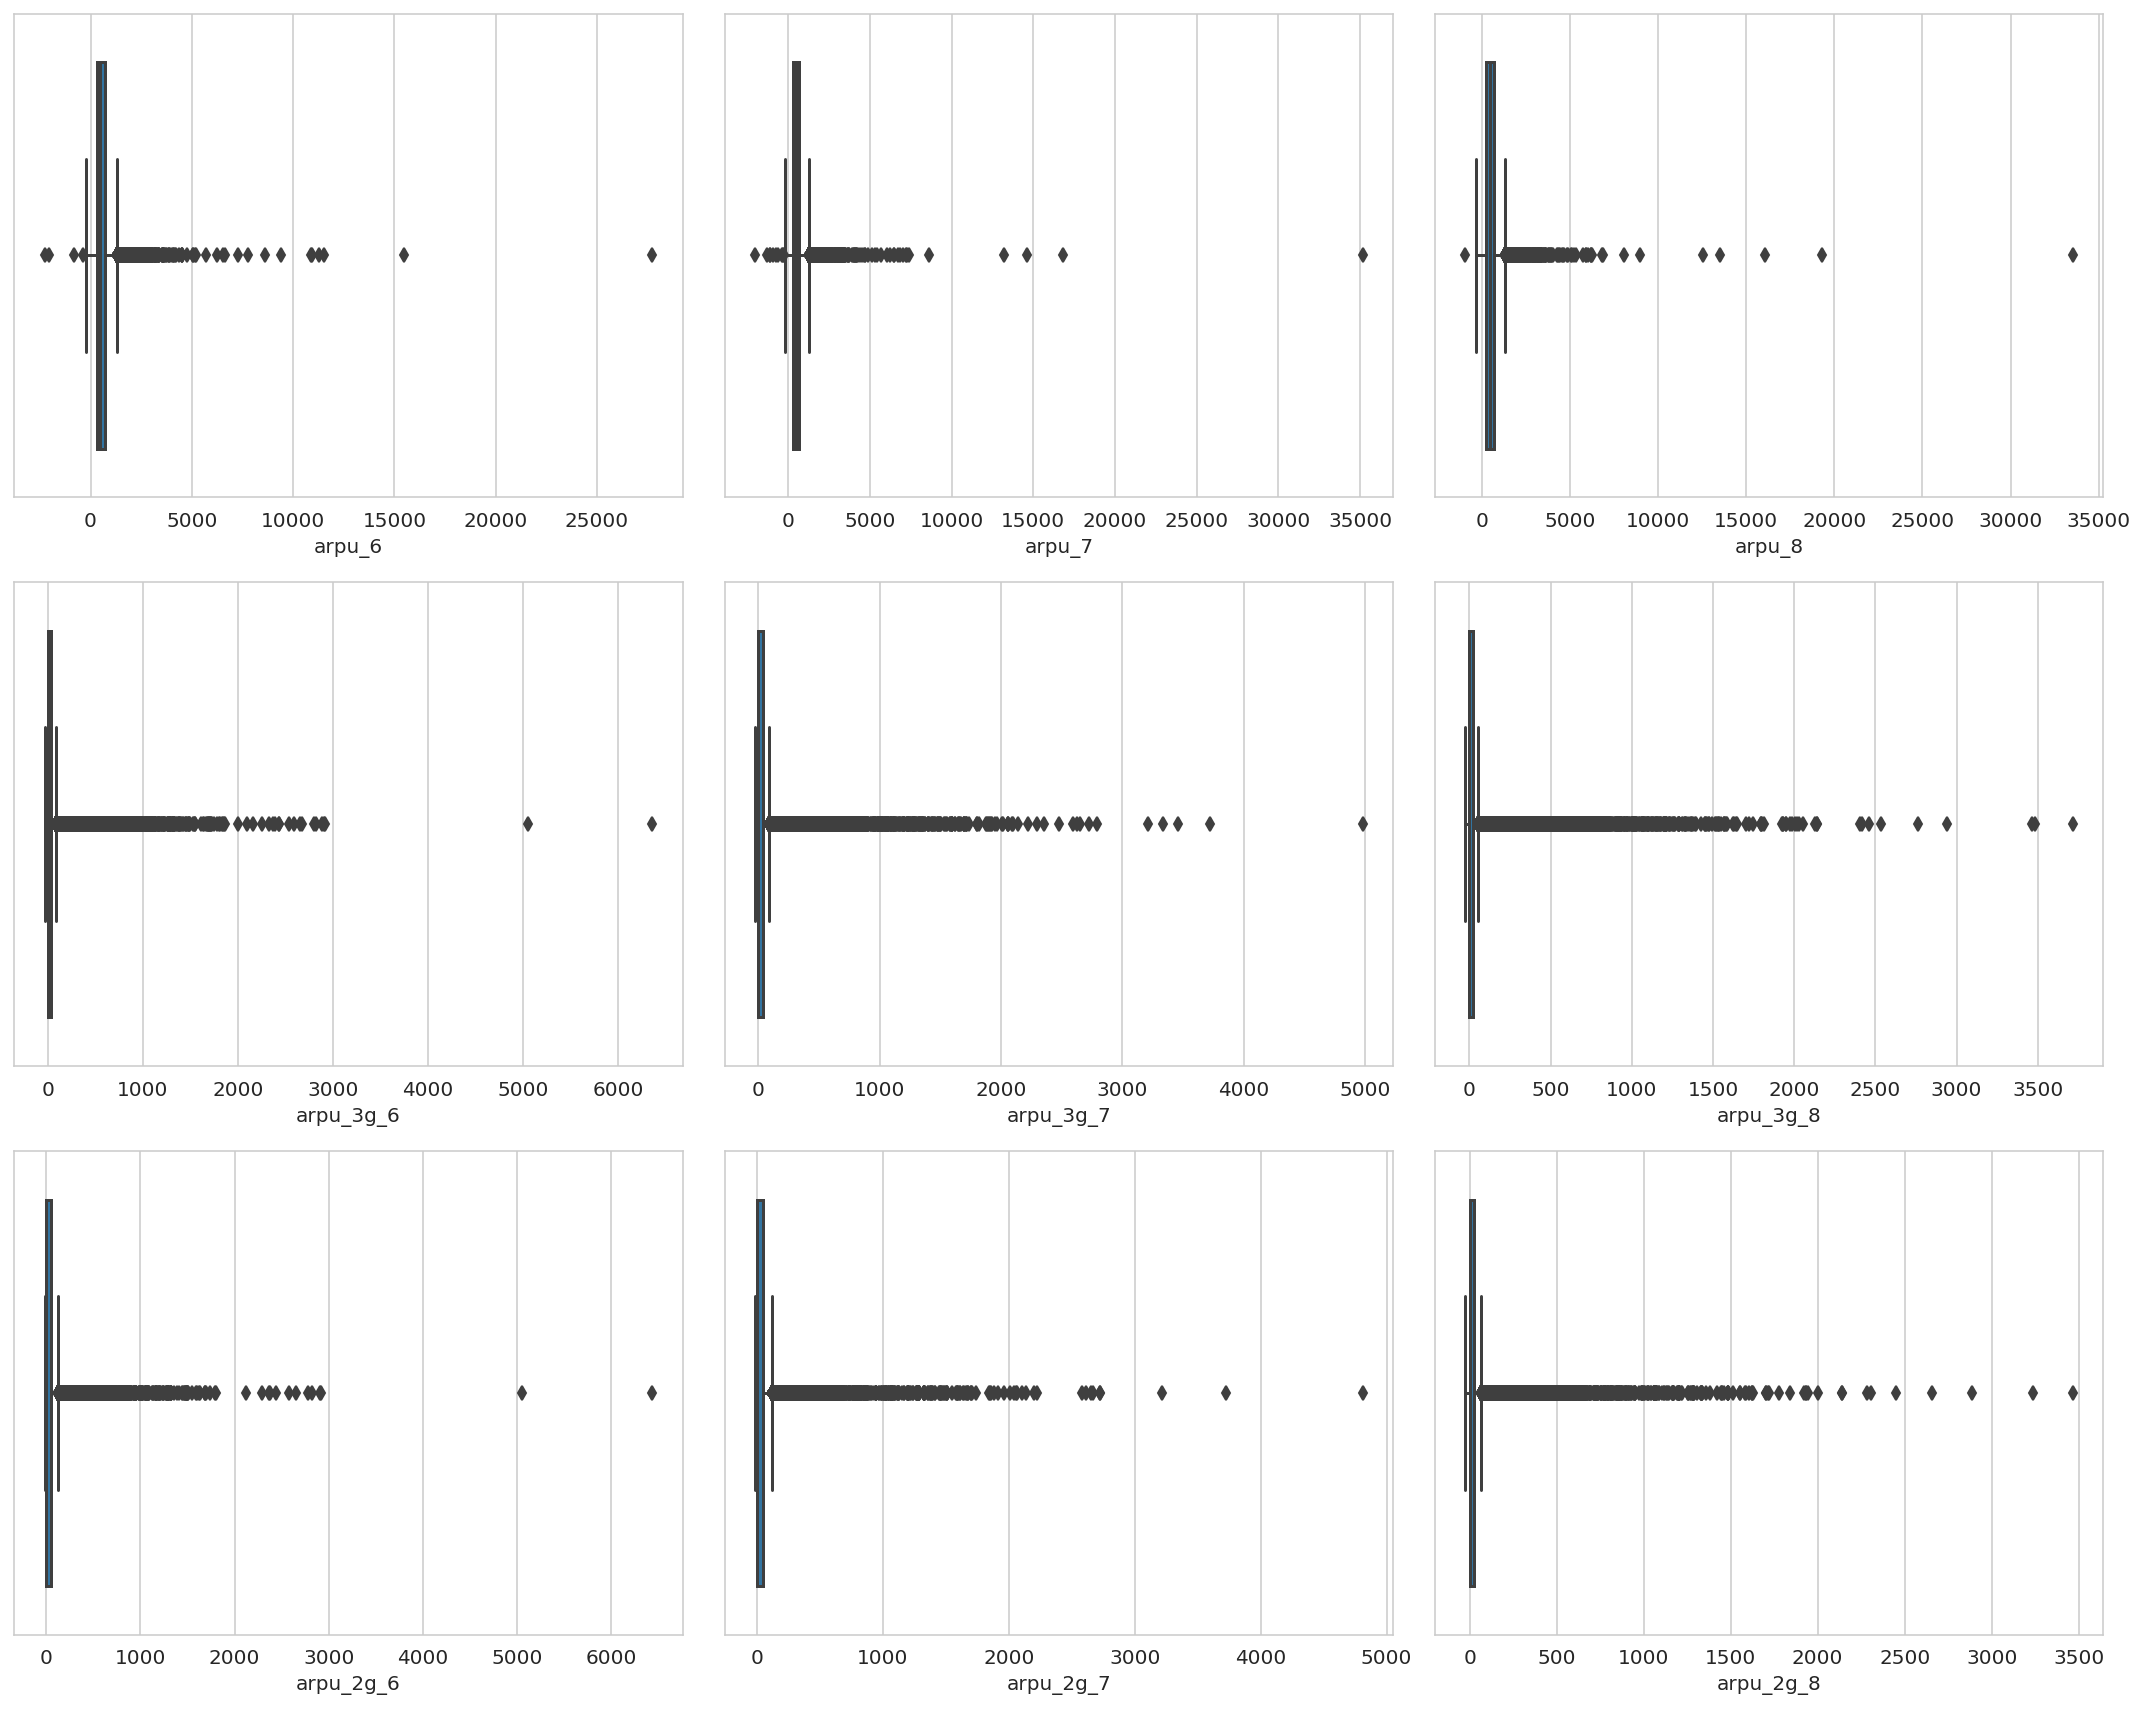

In [ ]:
# writing a function to plot a box plot
cols = telecom_hvcs.columns[telecom_hvcs.columns.str.contains("^ar")]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(telecom_hvcs[i[1]])
    
    
plt.tight_layout()
plt.show()

In [ ]:
cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

As you can see there are large number of outliers present in the above listed columns.But they are intentional oultiers which we need to treat cautiously to retain the information in the dataset.

But before that as we know we can derive the new features from the some features of the dataset as we did in above `derived features` section. And removed multicollinear columns.

In [ ]:
telecom_hvcs.columns[telecom_hvcs.columns.str.contains("^t.*rech_amt.*") & ~telecom_hvcs.columns.str.contains(".*num.*")]

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8'],
      dtype='object')

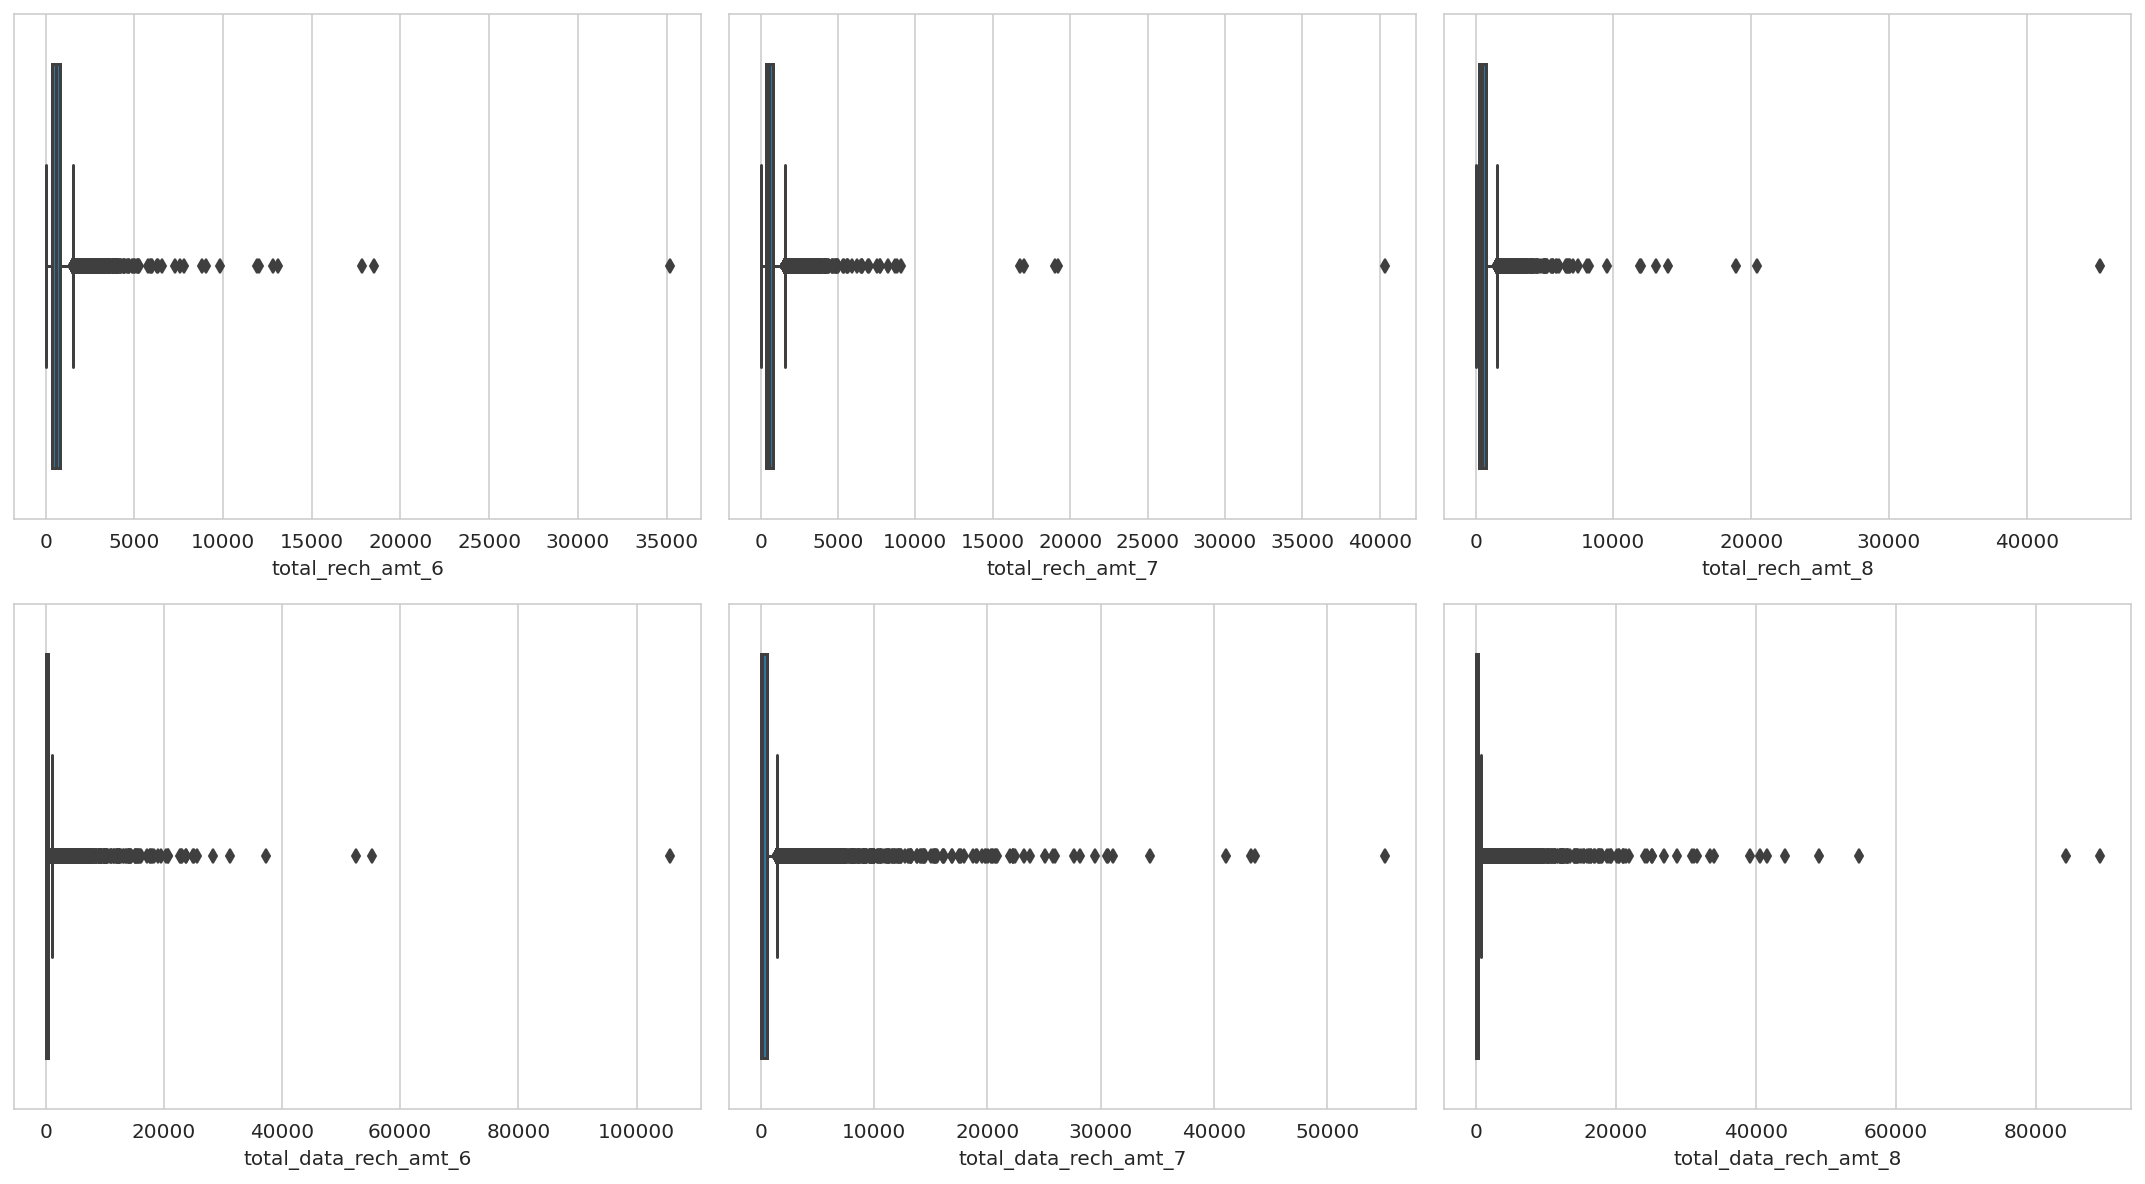

In [ ]:
cols = telecom_hvcs.columns[telecom_hvcs.columns.str.contains("^t.*rech_amt.*") & ~telecom_hvcs.columns.str.contains(".*num.*")]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(telecom_hvcs[i[1]])
    
    
plt.tight_layout()
plt.show()

In [ ]:
cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8'],
      dtype='object')

Similar cases for the outliers of the above columns also and  might be for others columns too. So we need to treat them; which is we did above `derived features` section.

#### After deriving new features and dropping the multicollinear features

In [ ]:
telecom_derived.shape

(30001, 48)

As you can see that after deriving new features and removing multicollinear faetures we have 51 columns in dataset. Lets try to plot boxplots of some of the features. 

In [ ]:
telecom_derived.columns[telecom_derived.columns.str.contains(".*ar.*")]

Index(['change_arpu_7_6', 'change_arpu_8_7', 'change_arpu_total_data_7_6',
       'change_arpu_total_data_8_7'],
      dtype='object')

Lets plot boxpplots of the above columns list.

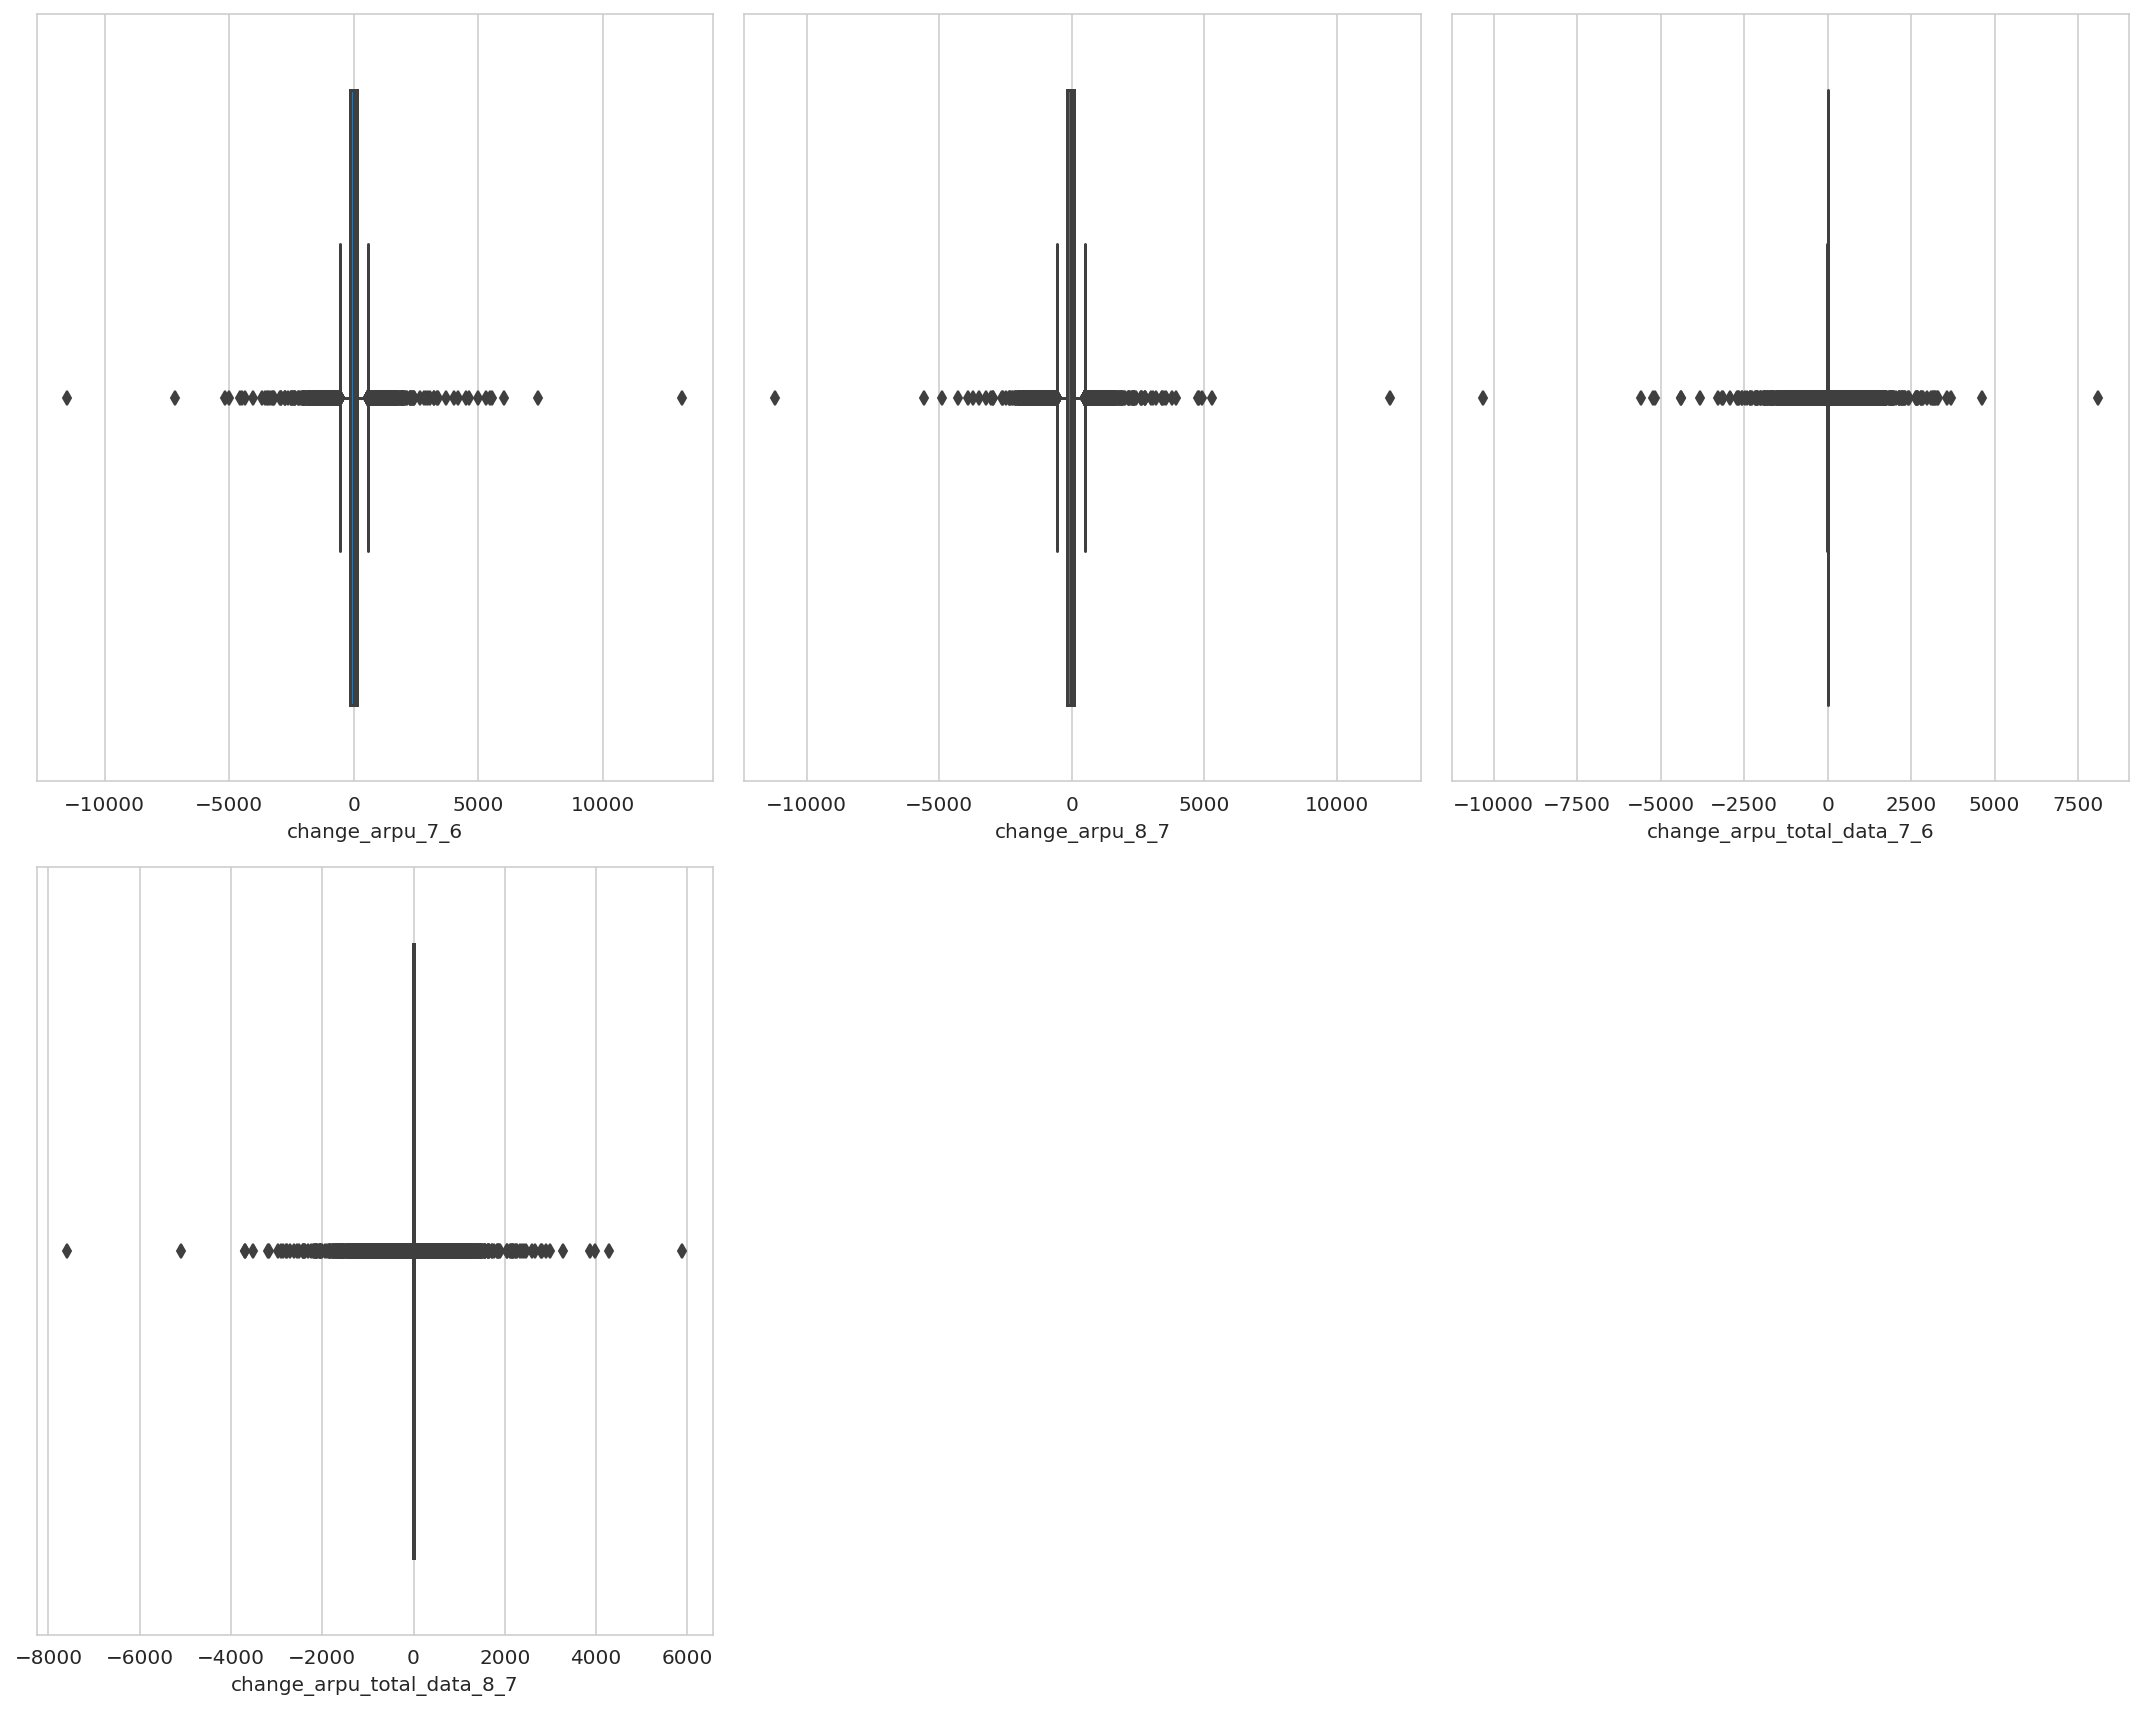

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains(".*ar.*")]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(telecom_derived[i[1]])


plt.tight_layout()
plt.show()

In [ ]:
telecom_derived.head()

mobile_number  change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0      7000842753           17.431           -1.013             0.751679   
7      7000701601          280.670         1821.630            -3.160000   
8      7001524846          113.502         -354.861           -62.660000   
21     7002124215           83.300           40.007            29.700000   
23     7000887461          119.547          173.069             1.700000   

    change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0           -133.485251            -25.493532            -144.70619   
7             -2.390000            113.730000            -241.25000   
8           -315.950000            -14.030000              55.85000   
21           -46.970000            138.750000              86.71000   
23           -17.080000              3.950000             116.53000   

    grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0             300.883455            276.251571                  0.00   
7             511.270000            621.830000                388.22   
8             508.360000            431.660000                171.56   
21            860.340000           1028.790000               1068.54   
23            134.380000            140.040000                239.48   

    grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0              134.98857            127.833863                  5.44   
7              642.69000            591.530000                460.38   
8              103.86000             28.490000                 16.54   
21             207.09000            131.890000                261.04   
23             119.58000            222.890000                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0                4.0               3.0               2.0   
7                5.0               5.0               7.0   
8               19.0              21.0              14.0   
21              22.0              26.0              27.0   
23               3.0               5.0               4.0   

    change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
0                      -110.0                        0.0           252.0   
7                      -790.0                     2848.0          1580.0   
8                       164.0                     -481.0            90.0   
21                       80.0                       38.0            50.0   
23                      454.0                      -15.0             0.0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0           252.0               252.0               252.0   
7            790.0          1580.0                 0.0                 0.0   
8            154.0            30.0                50.0                 0.0   
21            50.0            50.0                30.0                20.0   
23           179.0           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    total_data_vol_6  total_data_vol_7  total_data_vol_8  \
0              113.7            152.08            115.36   
7    

In [ ]:
telecom_derived.columns[telecom_derived.columns.str.contains("^gr.*")]

Index(['grand_total_og_mou_6', 'grand_total_og_mou_7', 'grand_total_og_mou_8',
       'grand_total_ic_mou_6', 'grand_total_ic_mou_7', 'grand_total_ic_mou_8'],
      dtype='object')

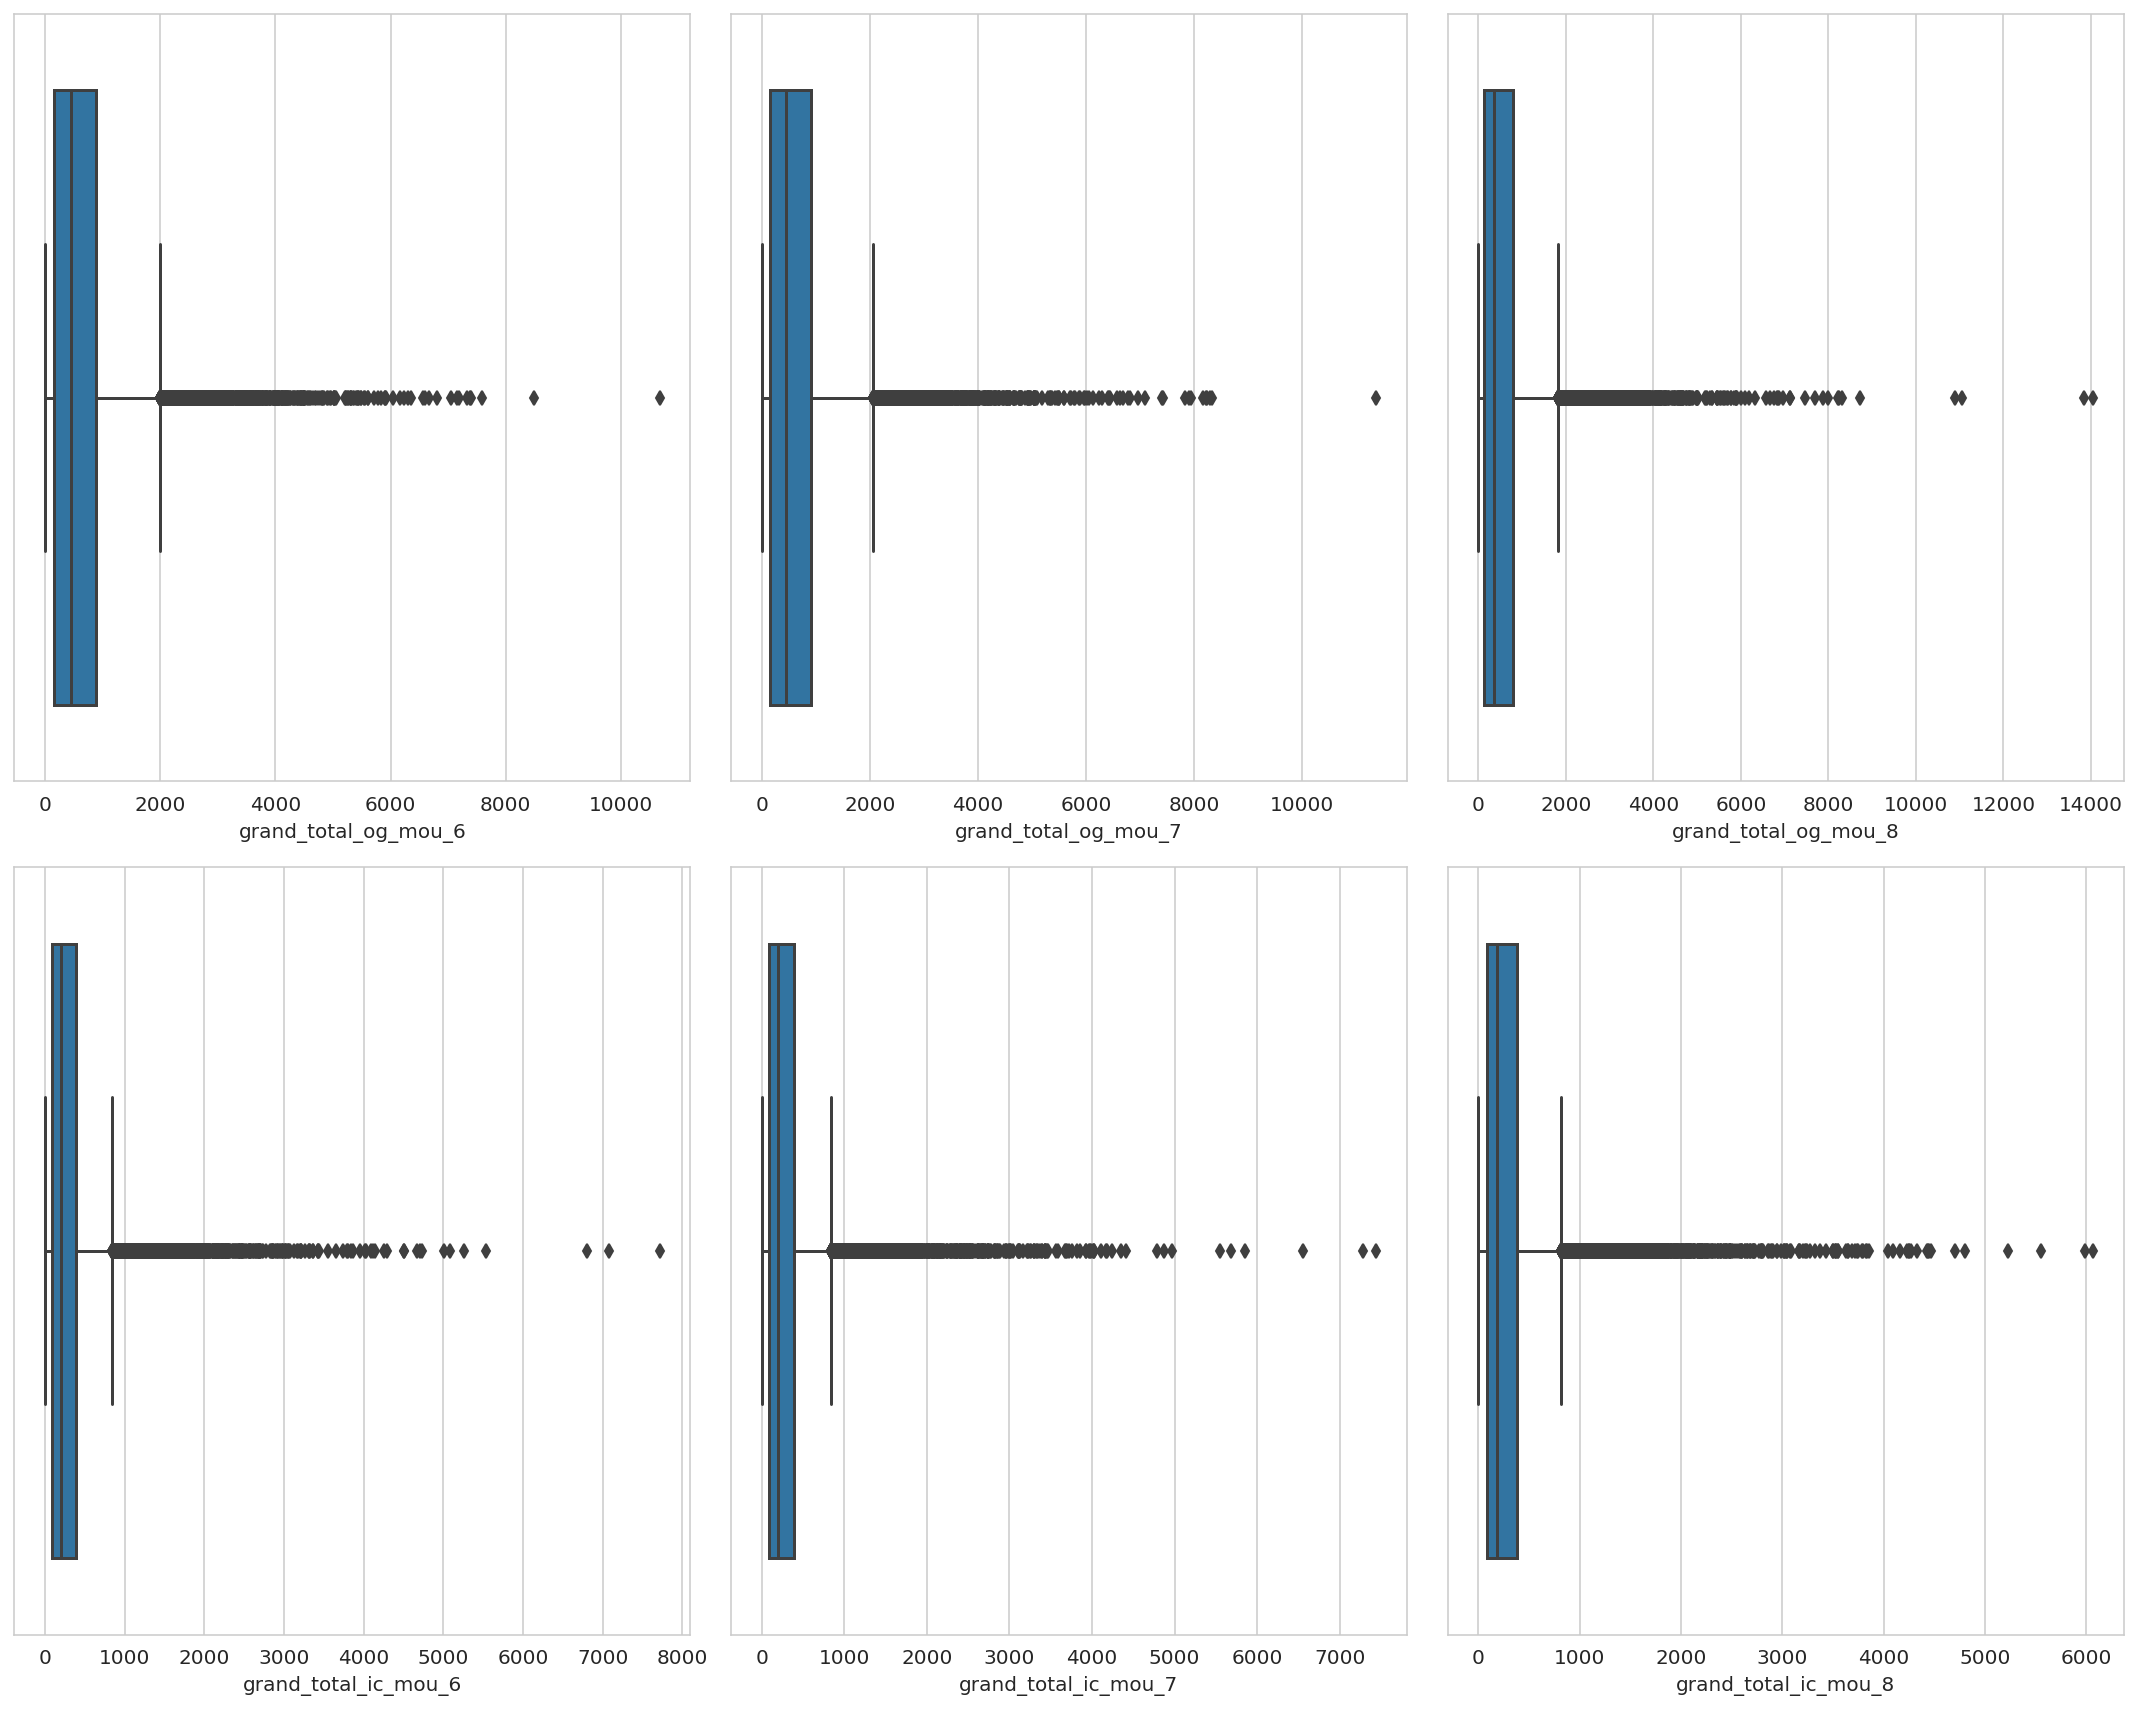

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^gr.*")]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(telecom_derived[i[1]])


plt.tight_layout()
plt.show()


### Outliers Treatment 

In [ ]:
telecom_derived.head()

mobile_number  change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0      7000842753           17.431           -1.013             0.751679   
7      7000701601          280.670         1821.630            -3.160000   
8      7001524846          113.502         -354.861           -62.660000   
21     7002124215           83.300           40.007            29.700000   
23     7000887461          119.547          173.069             1.700000   

    change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0           -133.485251            -25.493532            -144.70619   
7             -2.390000            113.730000            -241.25000   
8           -315.950000            -14.030000              55.85000   
21           -46.970000            138.750000              86.71000   
23           -17.080000              3.950000             116.53000   

    grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0             300.883455            276.251571                  0.00   
7             511.270000            621.830000                388.22   
8             508.360000            431.660000                171.56   
21            860.340000           1028.790000               1068.54   
23            134.380000            140.040000                239.48   

    grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0              134.98857            127.833863                  5.44   
7              642.69000            591.530000                460.38   
8              103.86000             28.490000                 16.54   
21             207.09000            131.890000                261.04   
23             119.58000            222.890000                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0                4.0               3.0               2.0   
7                5.0               5.0               7.0   
8               19.0              21.0              14.0   
21              22.0              26.0              27.0   
23               3.0               5.0               4.0   

    change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
0                      -110.0                        0.0           252.0   
7                      -790.0                     2848.0          1580.0   
8                       164.0                     -481.0            90.0   
21                       80.0                       38.0            50.0   
23                      454.0                      -15.0             0.0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0           252.0               252.0               252.0   
7            790.0          1580.0                 0.0                 0.0   
8            154.0            30.0                50.0                 0.0   
21            50.0            50.0                30.0                20.0   
23           179.0           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    total_data_vol_6  total_data_vol_7  total_data_vol_8  \
0              113.7            152.08            115.36   
7    

In [ ]:
telecom_cap = telecom_derived.copy()

In [ ]:
telecom_cap.columns[telecom_cap.columns.str.contains("^f")|telecom_cap.columns.str.contains("^n")]

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')

In [ ]:
cols = telecom_cap.columns[telecom_cap.columns.str.contains("^f")|telecom_cap.columns.str.contains("^n")]
cols

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')

In [ ]:
telecom_cap.drop(labels=cols, axis=1,inplace=True)

In [ ]:
percentile = [0.01, 0.05, 0.1, .25, 0.5,.75, .90, .95, .99]
describe = telecom_cap.iloc[:,1:-1].describe(percentile)

In [ ]:
describe.style.apply(lambda x: ['background: lightgreen' 
                                if (x.name == '1%' or x.name == '5%' or x.name == '95%' or x.name == '99%')
                                else '' for i in x], axis=1)


As you can see the jump from 95% to 99% is almost double sometimes tripple simliar for 1% and 5%. So we cap around 5% for lower limit and 95% for upper limit.

In [ ]:
telecom_cap.head()

mobile_number  change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0      7000842753           17.431           -1.013             0.751679   
7      7000701601          280.670         1821.630            -3.160000   
8      7001524846          113.502         -354.861           -62.660000   
21     7002124215           83.300           40.007            29.700000   
23     7000887461          119.547          173.069             1.700000   

    change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0           -133.485251            -25.493532            -144.70619   
7             -2.390000            113.730000            -241.25000   
8           -315.950000            -14.030000              55.85000   
21           -46.970000            138.750000              86.71000   
23           -17.080000              3.950000             116.53000   

    grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0             300.883455            276.251571                  0.00   
7             511.270000            621.830000                388.22   
8             508.360000            431.660000                171.56   
21            860.340000           1028.790000               1068.54   
23            134.380000            140.040000                239.48   

    grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0              134.98857            127.833863                  5.44   
7              642.69000            591.530000                460.38   
8              103.86000             28.490000                 16.54   
21             207.09000            131.890000                261.04   
23             119.58000            222.890000                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0                4.0               3.0               2.0   
7                5.0               5.0               7.0   
8               19.0              21.0              14.0   
21              22.0              26.0              27.0   
23               3.0               5.0               4.0   

    change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
0                      -110.0                        0.0           252.0   
7                      -790.0                     2848.0          1580.0   
8                       164.0                     -481.0            90.0   
21                       80.0                       38.0            50.0   
23                      454.0                      -15.0             0.0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0           252.0               252.0               252.0   
7            790.0          1580.0                 0.0                 0.0   
8            154.0            30.0                50.0                 0.0   
21            50.0            50.0                30.0                20.0   
23           179.0           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    total_data_vol_6  total_data_vol_7  total_data_vol_8  \
0              113.7            152.08            115.36   
7    

In [ ]:
for i in telecom_cap.iloc[:,1:-1].columns:

    q1 = telecom_cap[i].quantile(0.05)
    q2 = telecom_cap[i].quantile(0.95)
    telecom_cap[i][telecom_cap[i] < q1] = q1
    telecom_cap[i][telecom_cap[i] >  q2] = q2

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^mo")|telecom_derived.columns.str.contains("^f")|telecom_derived.columns.str.contains("^n")]
cols

Index(['mobile_number', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [ ]:
df = telecom_derived[cols]
df.head()

mobile_number  night_pck_user_6  night_pck_user_7  night_pck_user_8  \
0      7000842753               0.0               0.0               0.0   
7      7000701601              -1.0              -1.0              -1.0   
8      7001524846              -1.0               0.0               0.0   
21     7002124215              -1.0              -1.0              -1.0   
23     7000887461              -1.0               0.0               0.0   

    fb_user_6  fb_user_7  fb_user_8  
0         1.0        1.0        1.0  
7        -1.0       -1.0       -1.0  
8        -1.0        1.0        1.0  
21       -1.0       -1.0       -1.0  
23       -1.0        1.0        1.0

In [ ]:
telecom_derived.shape

(30001, 48)

In [ ]:
telecom_cap = pd.merge(telecom_cap, df, on='mobile_number')

In [ ]:
telecom_cap.shape

(30001, 48)

In [ ]:
telecom_cap.head()

mobile_number  change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0     7000842753           17.431           -1.013             0.751679   
1     7000701601          280.670          376.593            -3.160000   
2     7001524846          113.502         -354.861           -62.660000   
3     7002124215           83.300           40.007            29.700000   
4     7000887461          119.547          173.069             1.700000   

   change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0          -133.485251            -25.493532            -144.70619   
1            -2.390000            113.730000            -241.25000   
2          -315.950000            -14.030000              55.85000   
3           -46.970000            138.750000              86.71000   
4           -17.080000              3.950000             116.53000   

   grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0            300.883455            276.251571                  2.14   
1            511.270000            621.830000                388.22   
2            508.360000            431.660000                171.56   
3            860.340000           1028.790000               1068.54   
4            134.380000            140.040000                239.48   

   grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0             134.98857            127.833863                 10.29   
1             642.69000            591.530000                460.38   
2             103.86000             28.490000                 16.54   
3             207.09000            131.890000                261.04   
4             119.58000            222.890000                298.33   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0               4.0               3.0               2.0   
1               5.0               5.0               7.0   
2              19.0              21.0              14.0   
3              22.0              26.0              27.0   
4               3.0               5.0               4.0   

   change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
0                     -110.0                        0.0           252.0   
1                     -688.0                      495.0           459.0   
2                      164.0                     -481.0            90.0   
3                       80.0                       38.0            50.0   
4                      454.0                      -15.0            25.0   

   max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0           252.0           252.0               252.0               252.0   
1           459.0           440.0                 0.0                 0.0   
2           154.0            30.0                50.0                 0.0   
3            50.0            50.0                30.0                20.0   
4           179.0           179.0                 0.0               179.0   

   last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0               252.0                1.0                1.0   
1               252.0                0.0                0.0   
2                10.0                0.0                2.0   
3                50.0                0.0                0.0   
4                 0.0                0.0                2.0   

   total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                1.0            252.0            252.0            252.0   
1                0.0              0.0              0.0              0.0   
2                3.0              0.0            154.0             23.0   
3                0.0              0.0              0.0              0.0   
4                2.0              0.0            179.0            179.0   

   total_data_vol_6  total_data_vol_7  total_data_vol_8  \
0             113.7            152.08            115.36   
1               0.0              0.00              0.00   
2

In [ ]:
percentile = [0.01, 0.05, 0.1, .25, 0.5,.75, .90, .95, .99]
telecom_cap.iloc[:, 1:-1].describe(percentile)

change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
count     30001.000000     30001.000000         30001.000000   
mean          1.335399       -52.021334             2.943045   
std         249.690787       226.404981           143.356040   
min        -507.977000      -540.163000          -323.780000   
1%         -507.977000      -540.163000          -323.780000   
5%         -507.977000      -540.163000          -323.780000   
10%        -336.170000      -376.862000          -160.430000   
25%        -141.289000      -179.401000           -37.780000   
50%           0.011000       -33.791000             0.000000   
75%         144.439000        86.181000            35.850000   
90%         337.754000       240.033000           171.630000   
95%         519.705000       376.593000           365.550000   
99%         519.705000       376.593000           365.550000   
max         519.705000       376.593000           365.550000   

       change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
count         30001.000000          30001.000000          30001.000000   
mean            -25.864888              0.874130            -33.790199   
std             136.630881            186.415095            173.552729   
min            -412.520000           -409.540000           -482.290000   
1%             -412.520000           -409.540000           -482.290000   
5%             -412.520000           -409.540000           -482.290000   
10%            -204.090000           -232.420000           -271.110000   
25%             -47.420000            -75.300000            -92.950000   
50%              -0.980000             -1.210000             -5.680000   
75%              23.580000             72.280000             47.580000   
90%             120.670000            242.950000            158.650000   
95%             222.570000            433.600000            289.700000   
99%             222.570000            433.600000            289.700000   
max             222.570000            433.600000            289.700000   

       grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
count          30001.000000          30001.000000          30001.000000   
mean             601.941874            610.801167            539.182359   
std              548.271992            562.402868            529.797193   
min                5.290000              4.840000              2.140000   
1%                 5.290000              4.840000              2.140000   
5%                 5.290000              4.840000              2.140000   
10%               28.740000             27.580000             17.740000   
25%              157.540000            152.340000            119.850000   
50%              446.290000            449.640000            355.030000   
75%              890.930000            915.330000            799.480000   
90%             1476.880000           1509.020000           1384.730000   
95%             1945.540000           1981.390000           1884.530000   
99%             1945.540000           1981.390000           1884.530000   
max             1945.540000           1981.390000           1884.530000   

       grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
count          30001.000000          30001.000000          30001.000000   
mean             282.134718            283.856025            271.180418   
std              256.321421            256.973036            254.275748   
min               13.090000             15.610000             10.290000   
1%                13.090000             15.610000             10.290000   
5%                13.090000             15.610000             10.290000   
10%               33.240000             35.440000             28.660000   
25%               90.030000             93.730000             84.690000   
50%              200.140000            198.790000            185.330000   
75%              391.990000            391.740000          

#### Analysis after capping the outliers 

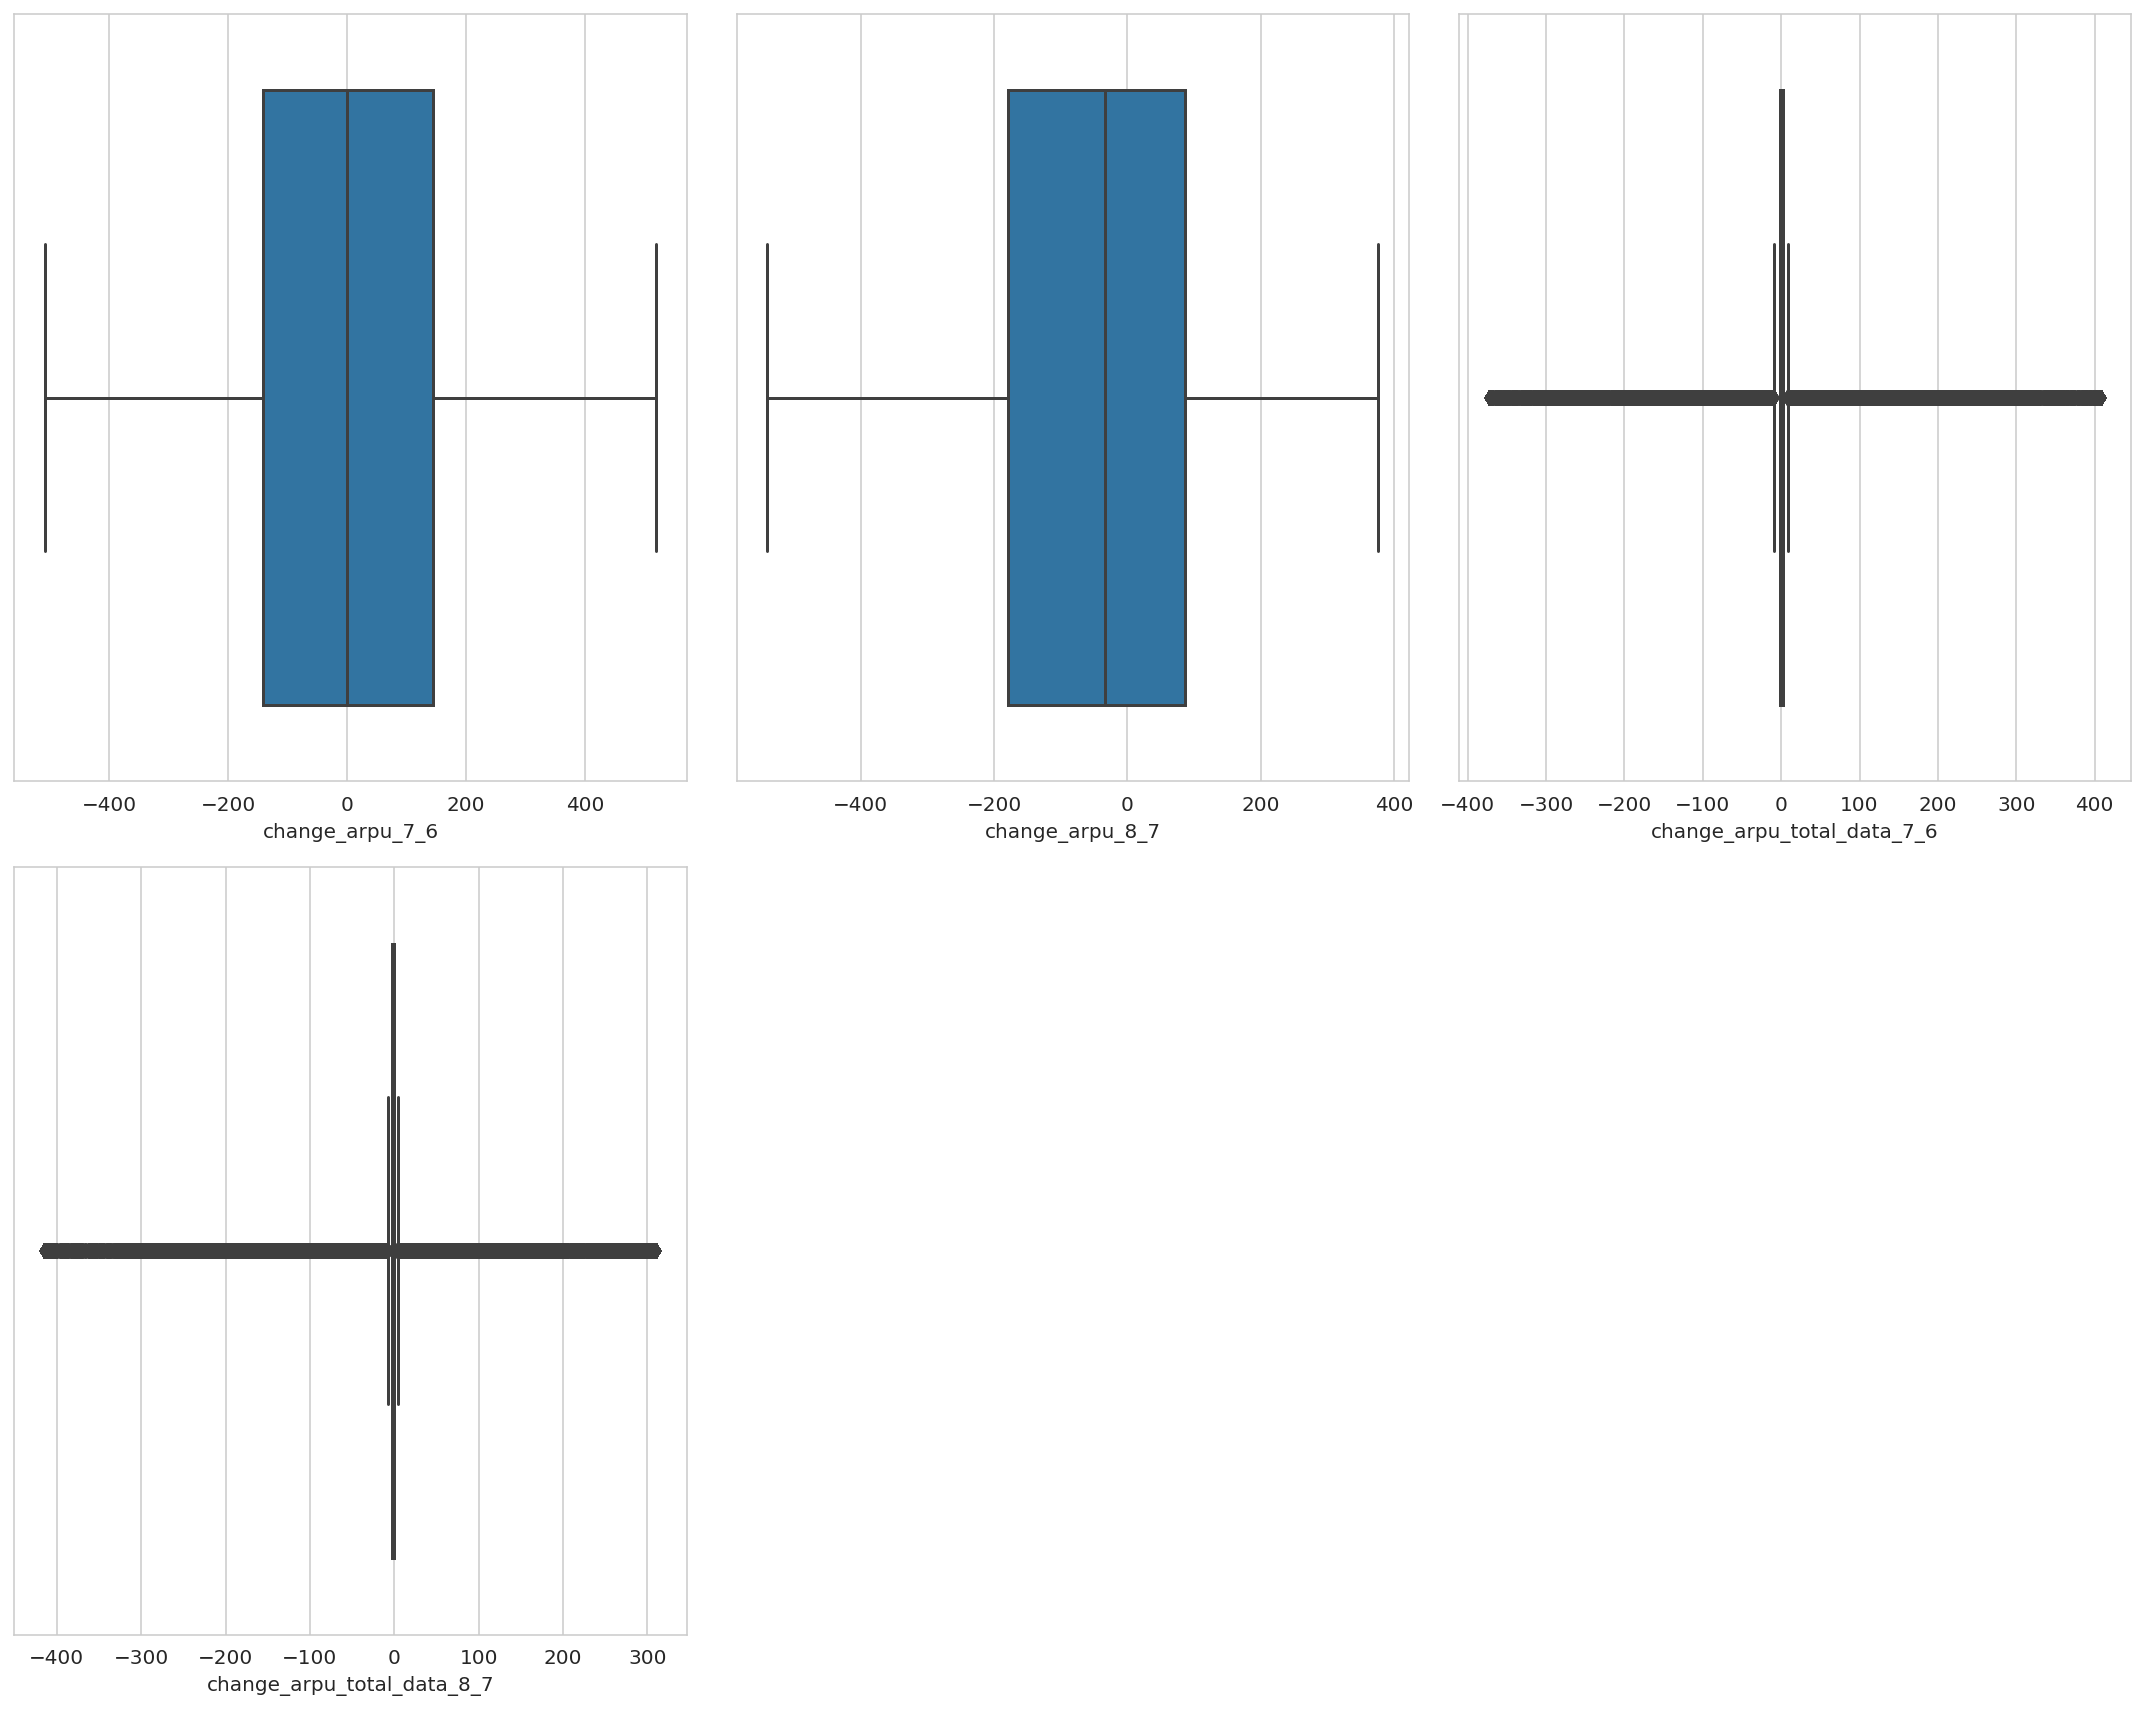

In [ ]:
cols = telecom_cap.columns[telecom_cap.columns.str.contains(".*ar.*")]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(telecom_cap[i[1]])


plt.tight_layout()
plt.show()

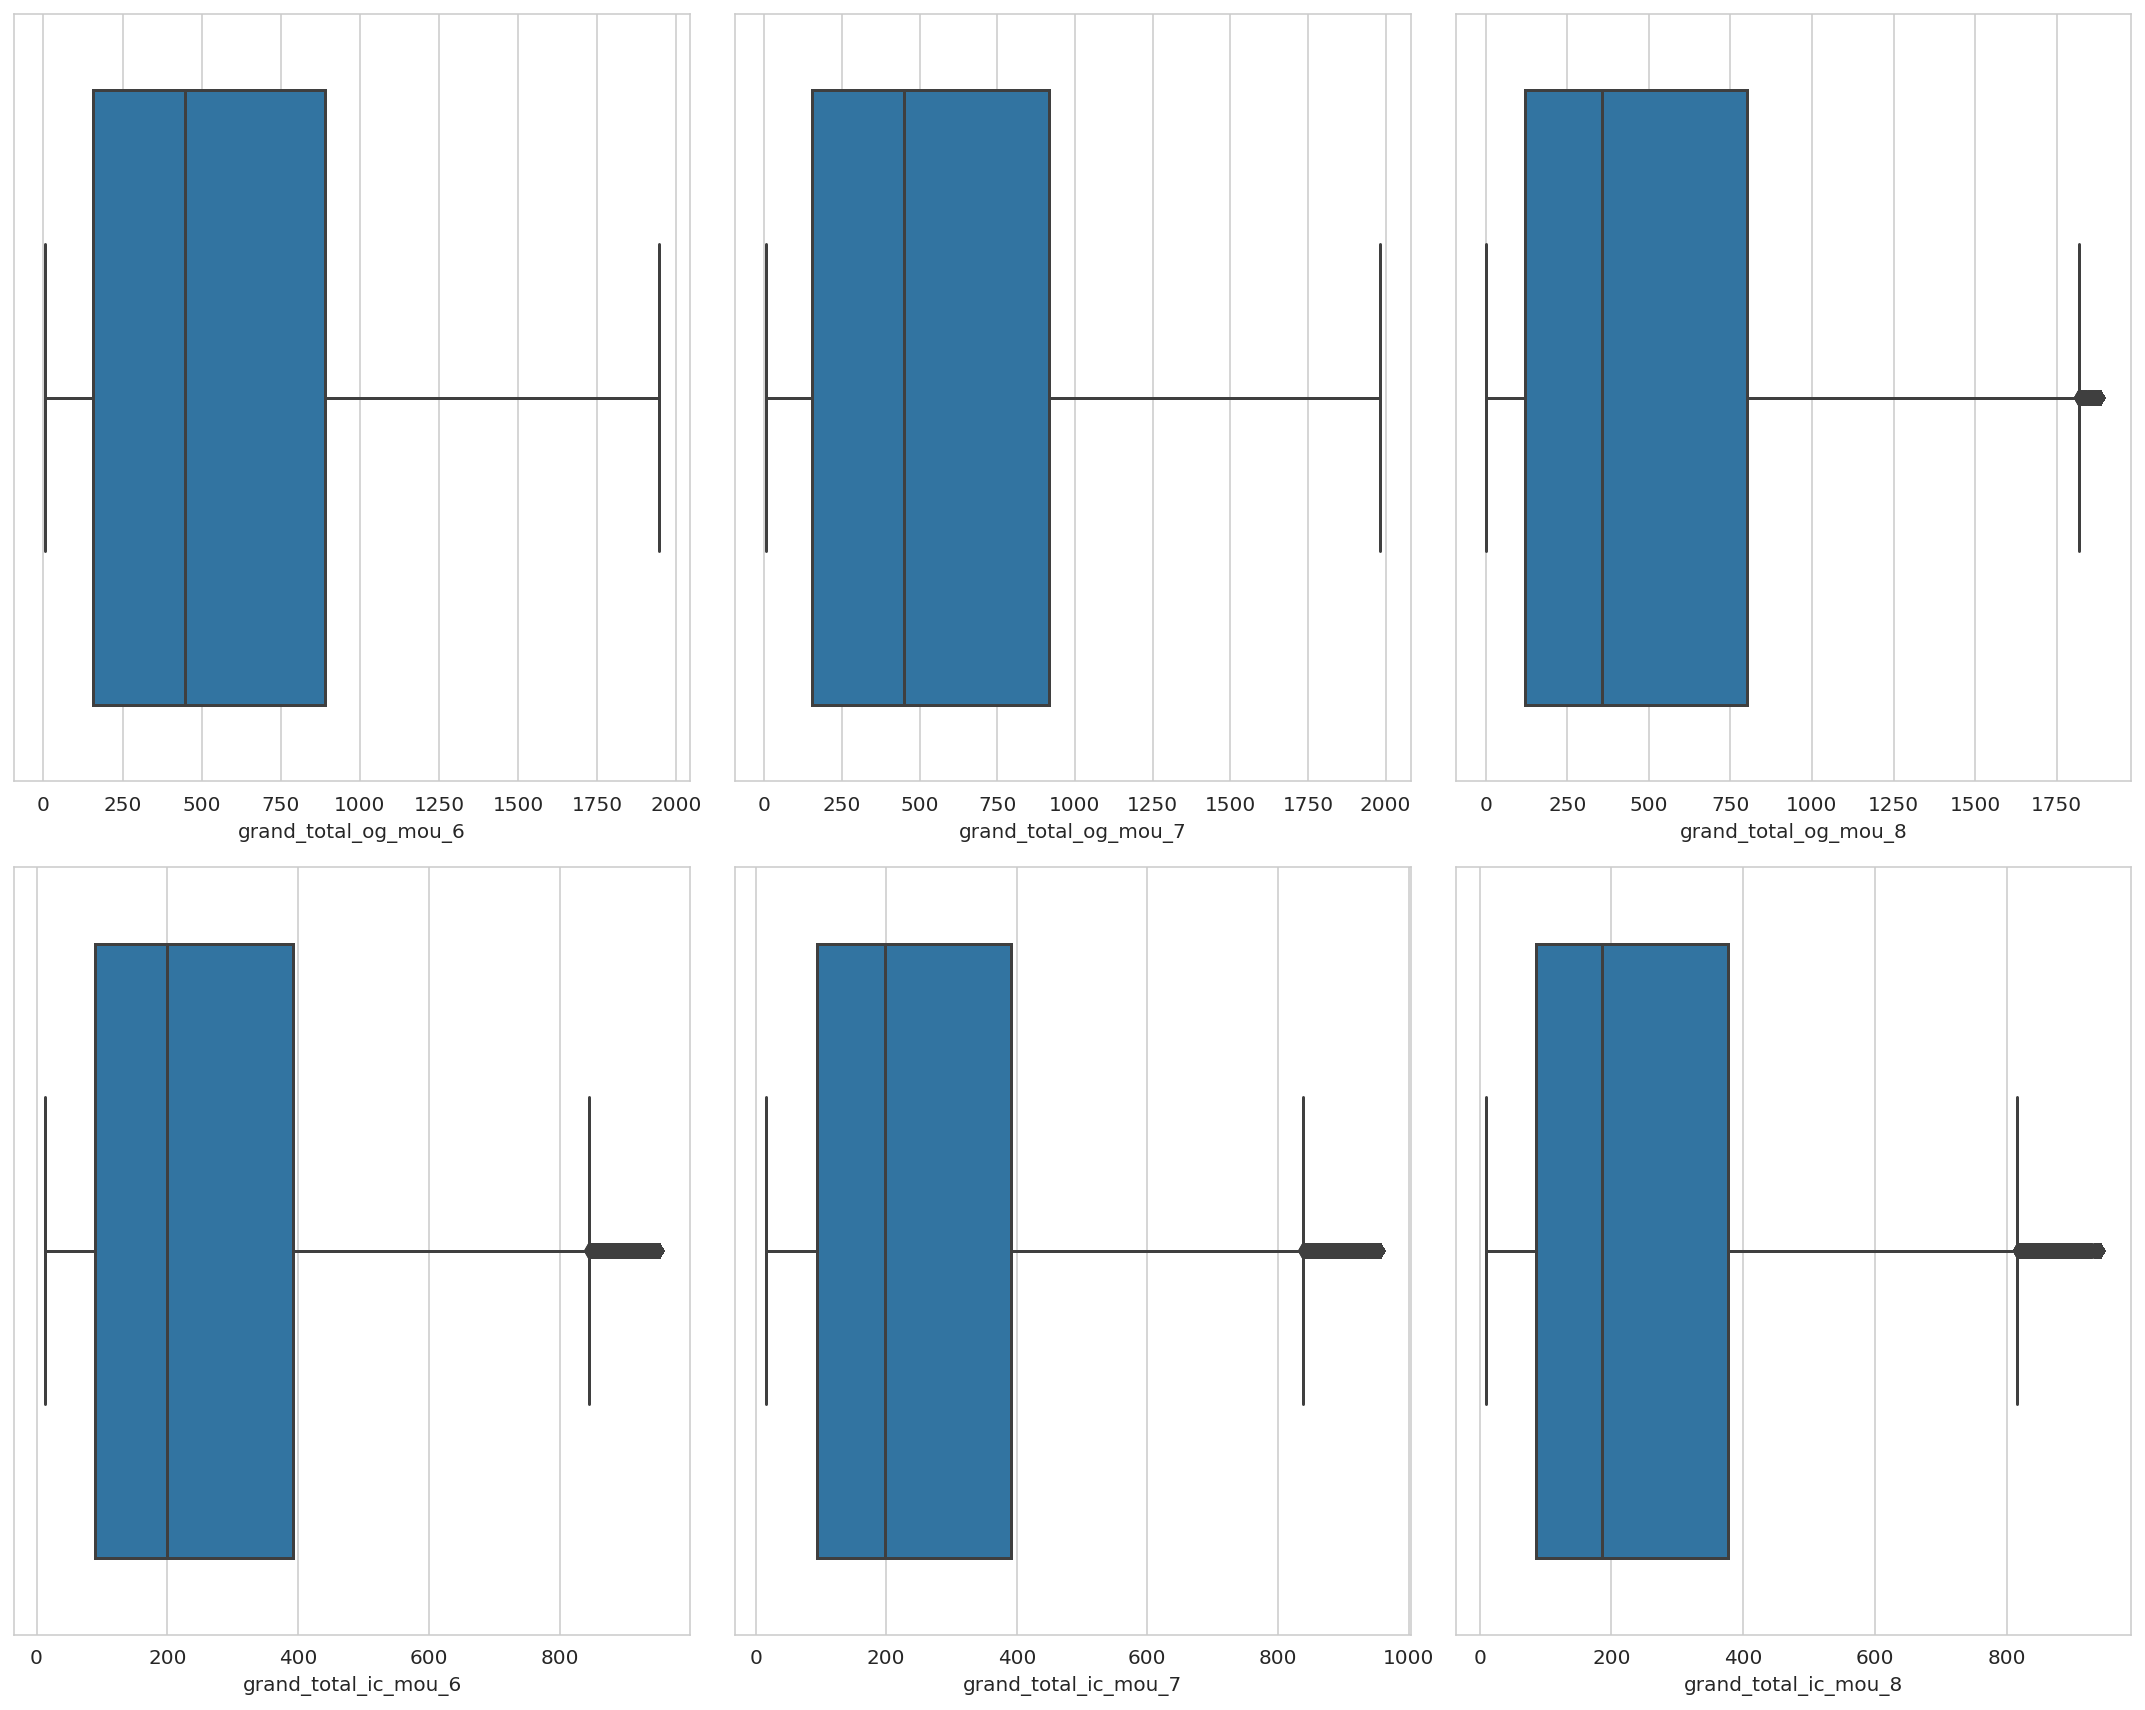

In [ ]:
cols = telecom_cap.columns[telecom_cap.columns.str.contains("^gr.*")]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(telecom_cap[i[1]])


plt.tight_layout()
plt.show()


### Bivariate Analysis

In [ ]:
telecom_derived.head()

mobile_number  change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0      7000842753           17.431           -1.013             0.751679   
7      7000701601          280.670         1821.630            -3.160000   
8      7001524846          113.502         -354.861           -62.660000   
21     7002124215           83.300           40.007            29.700000   
23     7000887461          119.547          173.069             1.700000   

    change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0           -133.485251            -25.493532            -144.70619   
7             -2.390000            113.730000            -241.25000   
8           -315.950000            -14.030000              55.85000   
21           -46.970000            138.750000              86.71000   
23           -17.080000              3.950000             116.53000   

    grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0             300.883455            276.251571                  0.00   
7             511.270000            621.830000                388.22   
8             508.360000            431.660000                171.56   
21            860.340000           1028.790000               1068.54   
23            134.380000            140.040000                239.48   

    grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0              134.98857            127.833863                  5.44   
7              642.69000            591.530000                460.38   
8              103.86000             28.490000                 16.54   
21             207.09000            131.890000                261.04   
23             119.58000            222.890000                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0                4.0               3.0               2.0   
7                5.0               5.0               7.0   
8               19.0              21.0              14.0   
21              22.0              26.0              27.0   
23               3.0               5.0               4.0   

    change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
0                      -110.0                        0.0           252.0   
7                      -790.0                     2848.0          1580.0   
8                       164.0                     -481.0            90.0   
21                       80.0                       38.0            50.0   
23                      454.0                      -15.0             0.0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0           252.0               252.0               252.0   
7            790.0          1580.0                 0.0                 0.0   
8            154.0            30.0                50.0                 0.0   
21            50.0            50.0                30.0                20.0   
23           179.0           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    total_data_vol_6  total_data_vol_7  total_data_vol_8  \
0              113.7            152.08            115.36   
7    

In [ ]:
telecom_derived.columns[telecom_derived.columns.str.contains('^n')]

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], dtype='object')

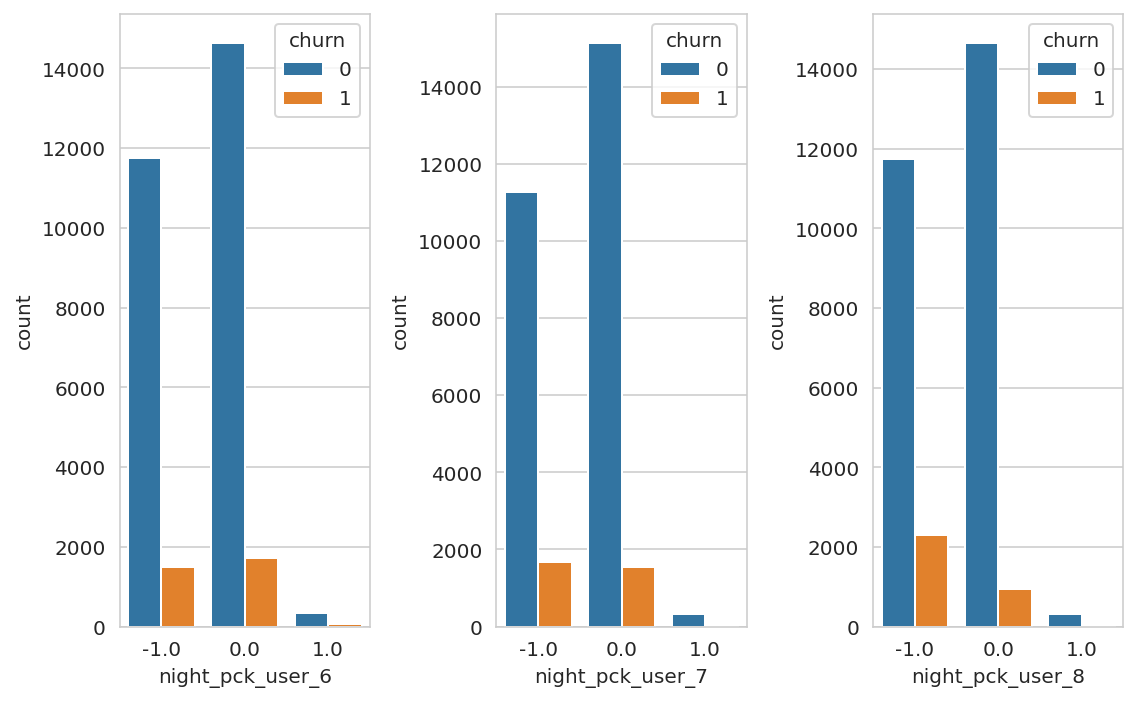

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^n.*")]

plt.figure(figsize=(8,5))
#sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(1,3,i[0]+1)
    sns.countplot( i[1] ,hue = 'churn', data=telecom_derived)


plt.tight_layout()
plt.show()


There is not churned customers are more than churned customers

In [ ]:
telecom_derived.columns[telecom_derived.columns.str.contains("^f.*")]

Index(['fb_user_6', 'fb_user_7', 'fb_user_8'], dtype='object')

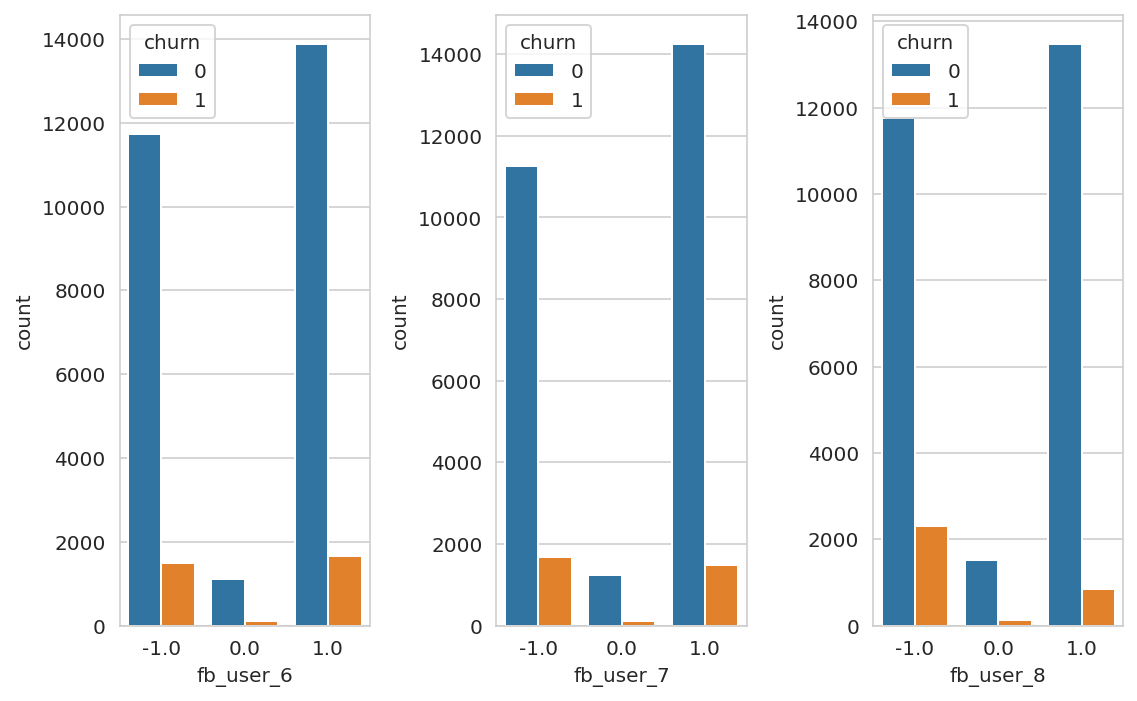

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^f.*")]

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(1,3,i[0]+1)
    sns.countplot( i[1] ,hue = 'churn', data=telecom_derived)


plt.tight_layout()
plt.show()

For `fb_user` facebook user have three distinct categories for which not churned customers are more than churned one. But as you noticed carefully those who have avail these service and distinct category customers are way more churned than those who don't have avail this service.

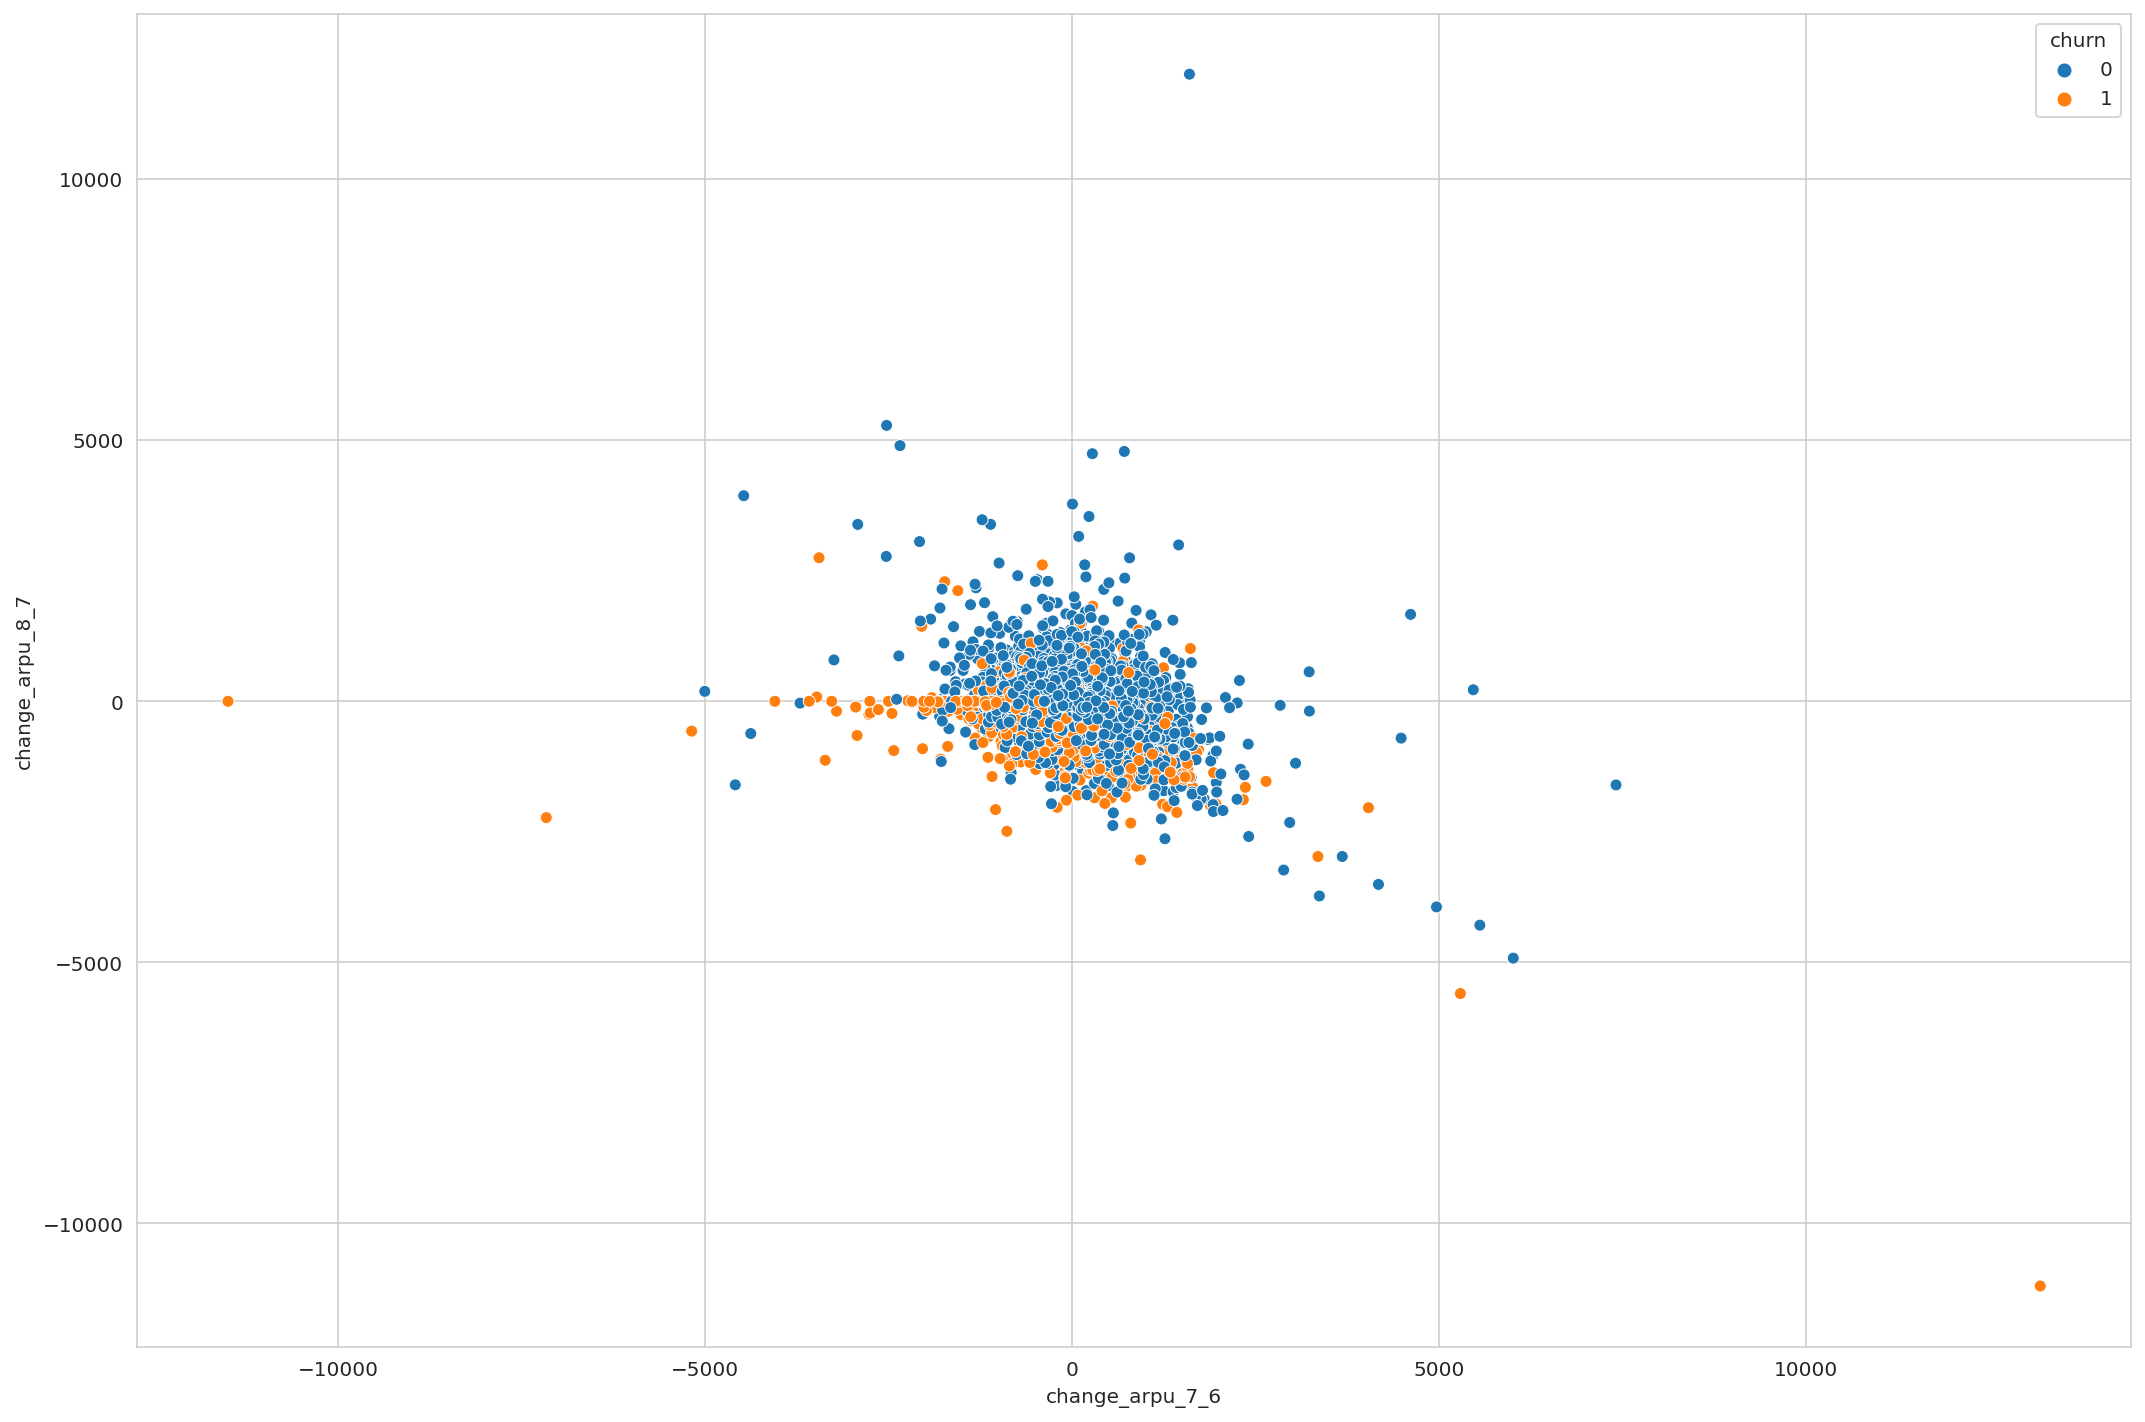

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=telecom_derived, x="change_arpu_7_6", y= 'change_arpu_8_7' ,hue='churn')
plt.tight_layout()

As you can clearly see that those who has churned whose monthly change in average revenue is negative for both months.That means revenue from those HVCs gets decresing month by month.So clearly there might be some problem they were facing during good and action phase. 

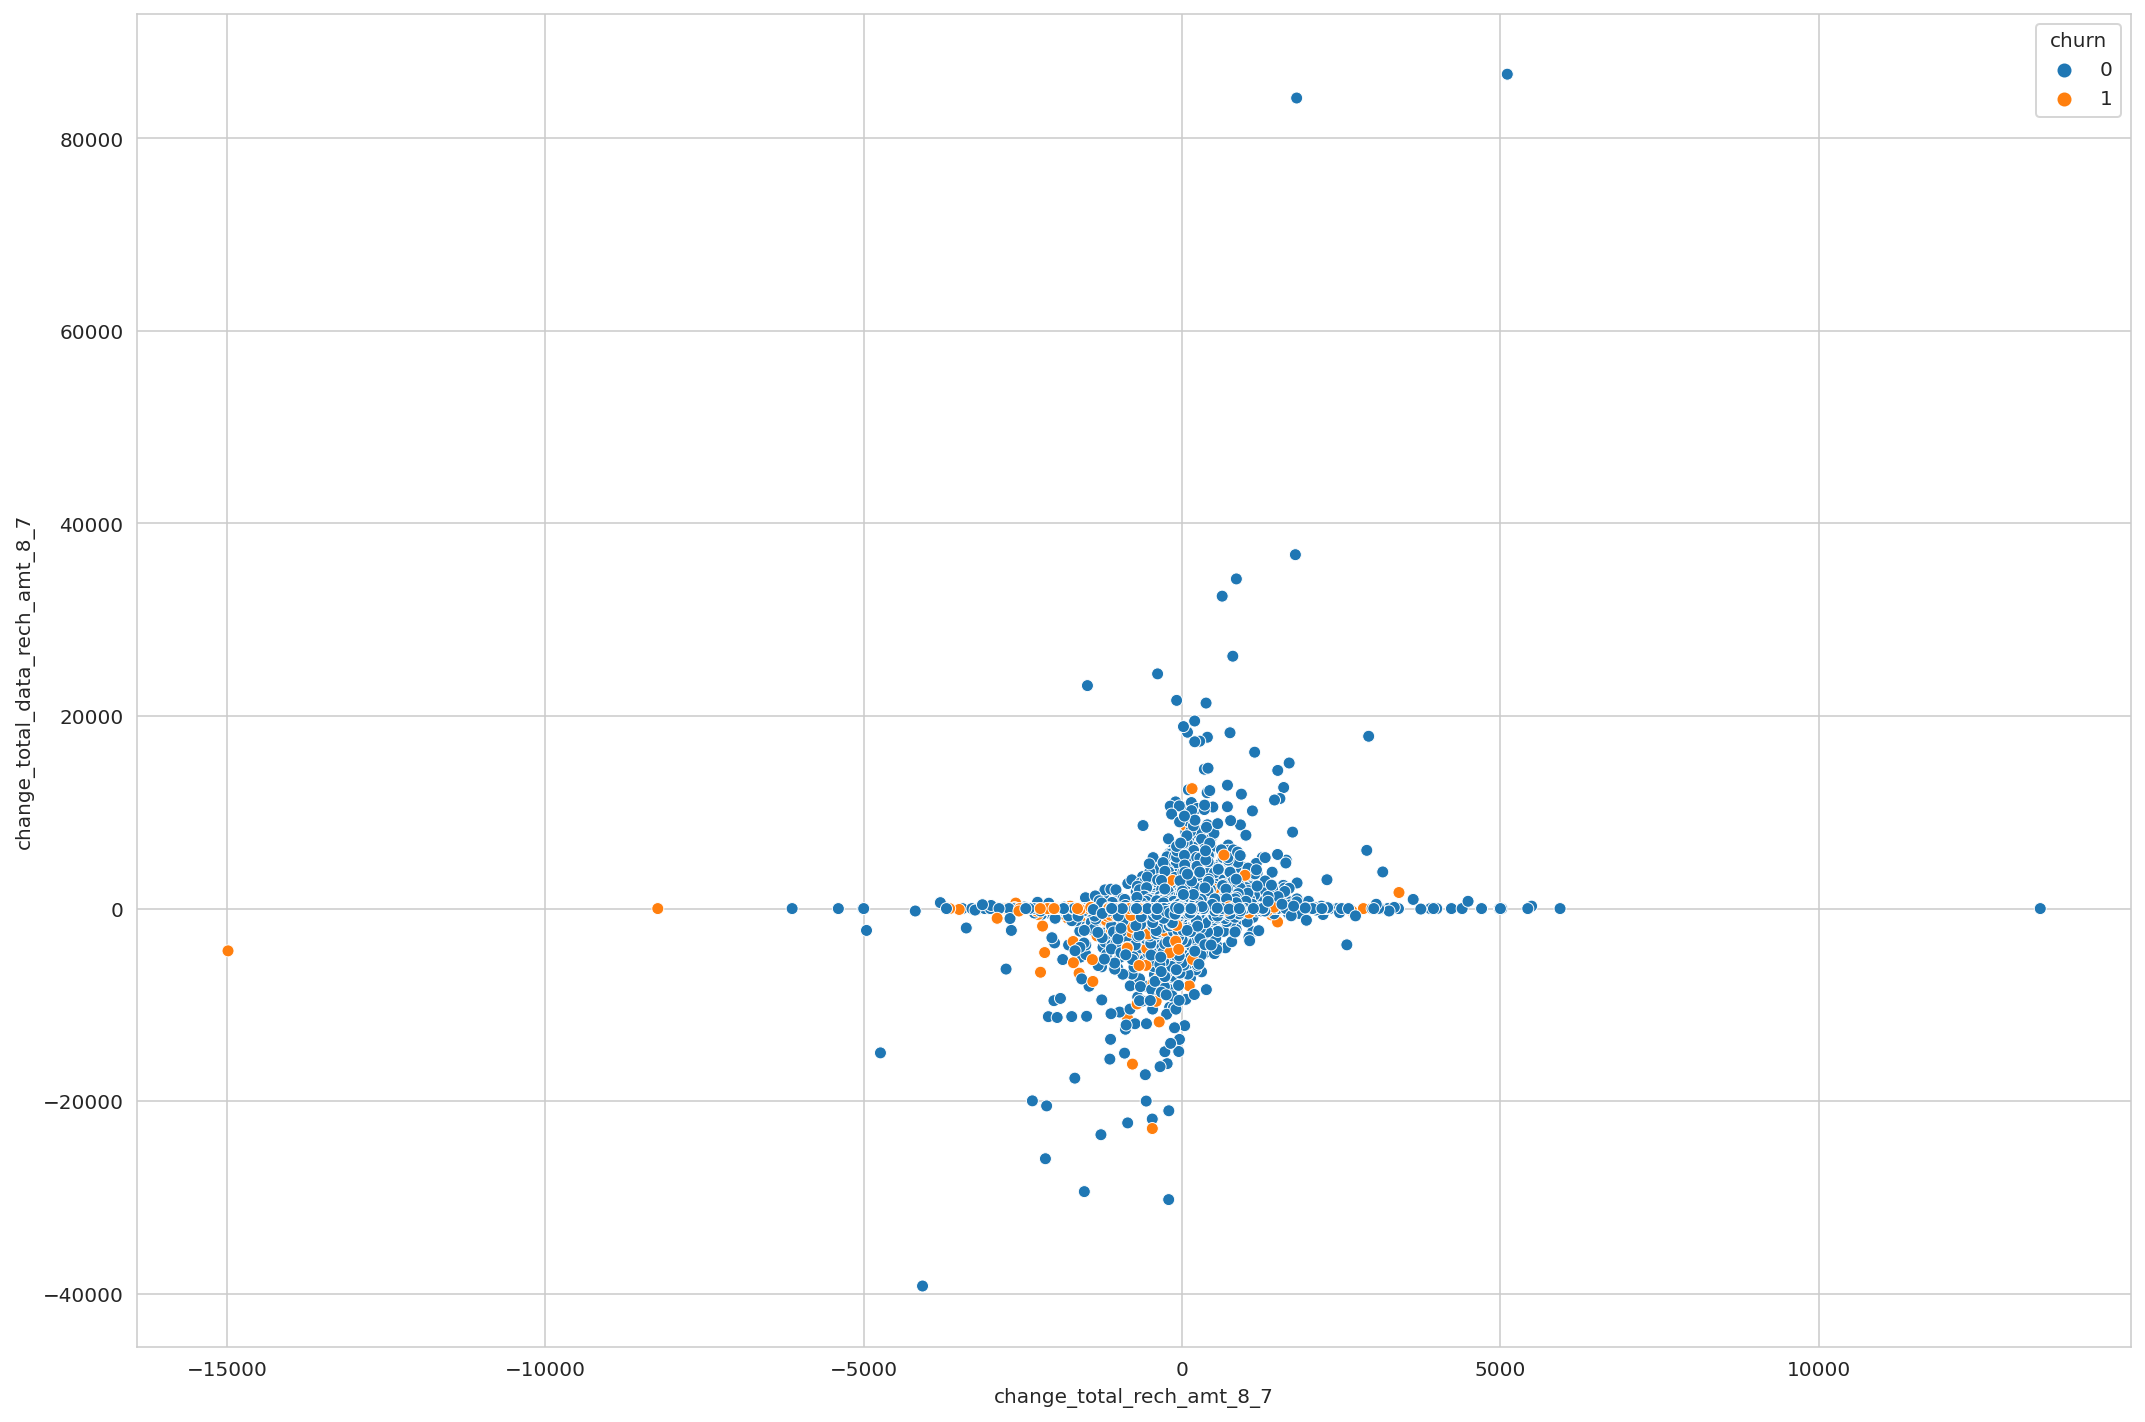

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=telecom_derived, x="change_total_rech_amt_8_7", y= 'change_total_data_rech_amt_8_7' ,hue='churn')
plt.tight_layout()

Similarly for change in total data recharge amount and call recharge amount for 7 and 8th months for negative that  means if recharge amount is decreased those customers are churned largely.

In [ ]:
cols = telecom_derived.columns[telecom_derived.columns.str.contains("^change")]

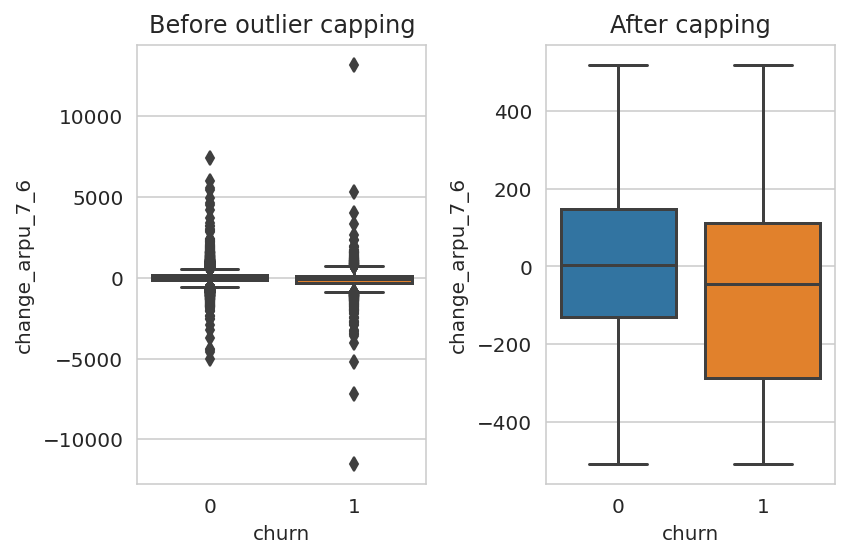

In [ ]:
fig,axes = plt.subplots(1,2)
sns.boxplot(data=telecom_derived, x= 'churn', y= 'change_arpu_7_6',ax = axes[0])
axes[0].set_title("Before outlier capping")
sns.boxplot(data=telecom_cap,x = 'churn', y ='change_arpu_7_6',ax = axes[1])
axes[1].set_title("After capping")
plt.tight_layout()

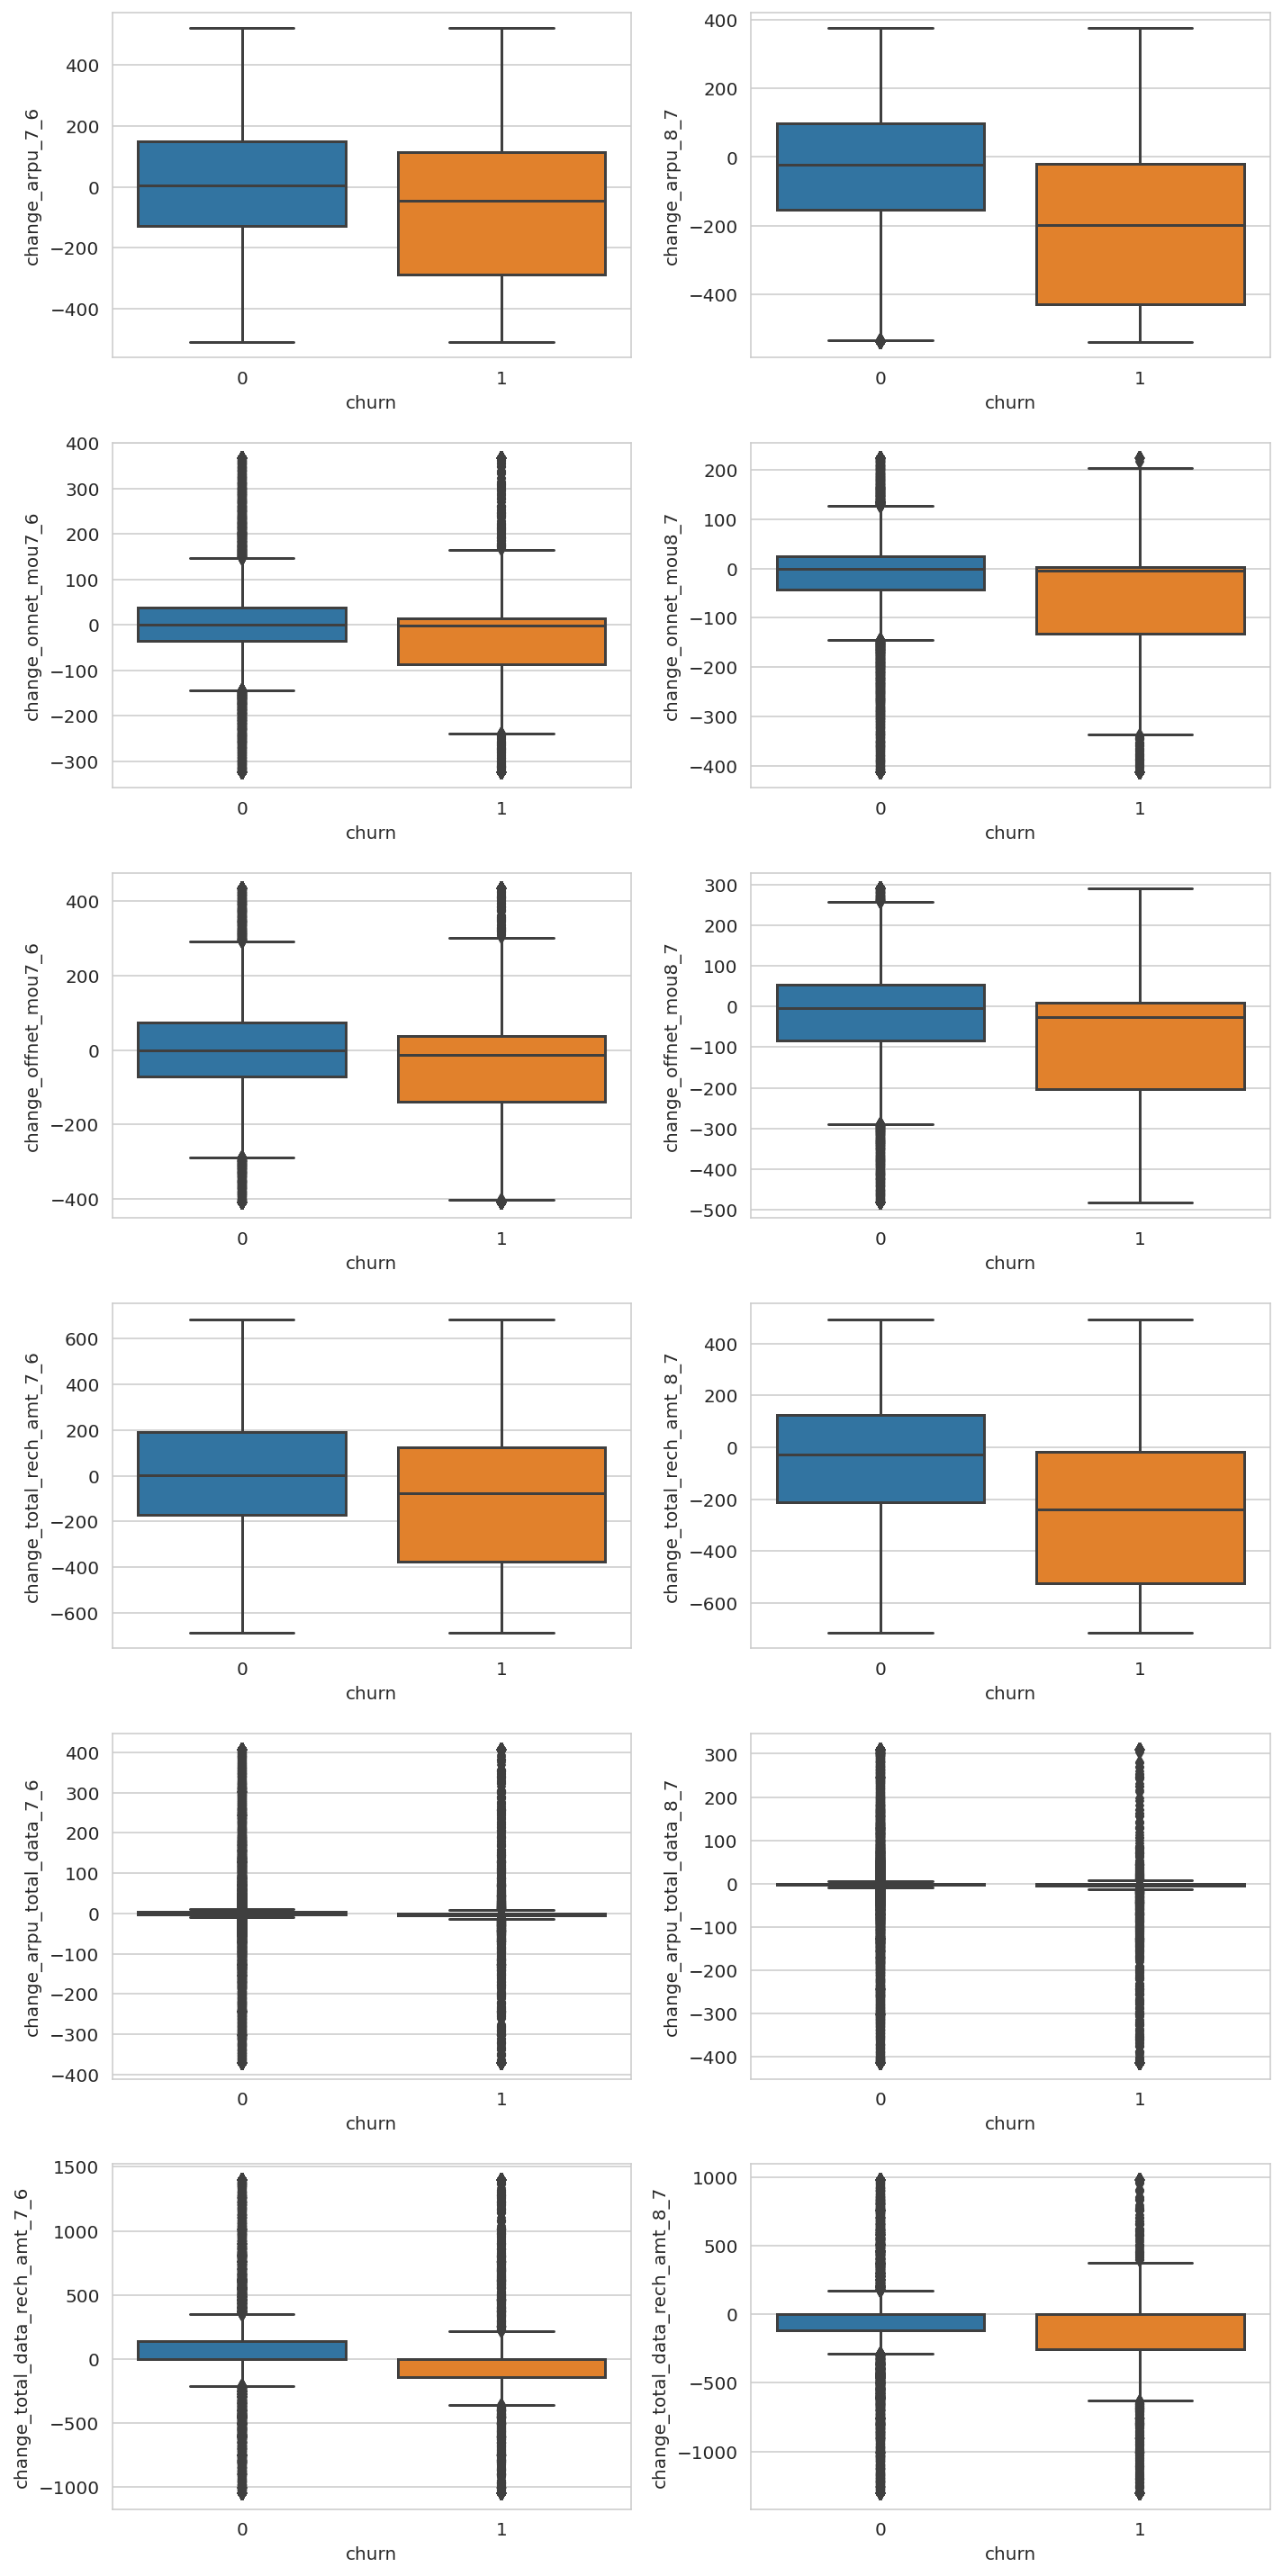

In [ ]:
plt.figure(figsize=(10, 20))
sns.set_style("whitegrid")
for num, col in enumerate(cols):
    plt.subplot(6, 2, num+1)
    sns.boxplot(data=telecom_cap,x = 'churn', y =col)

plt.tight_layout()

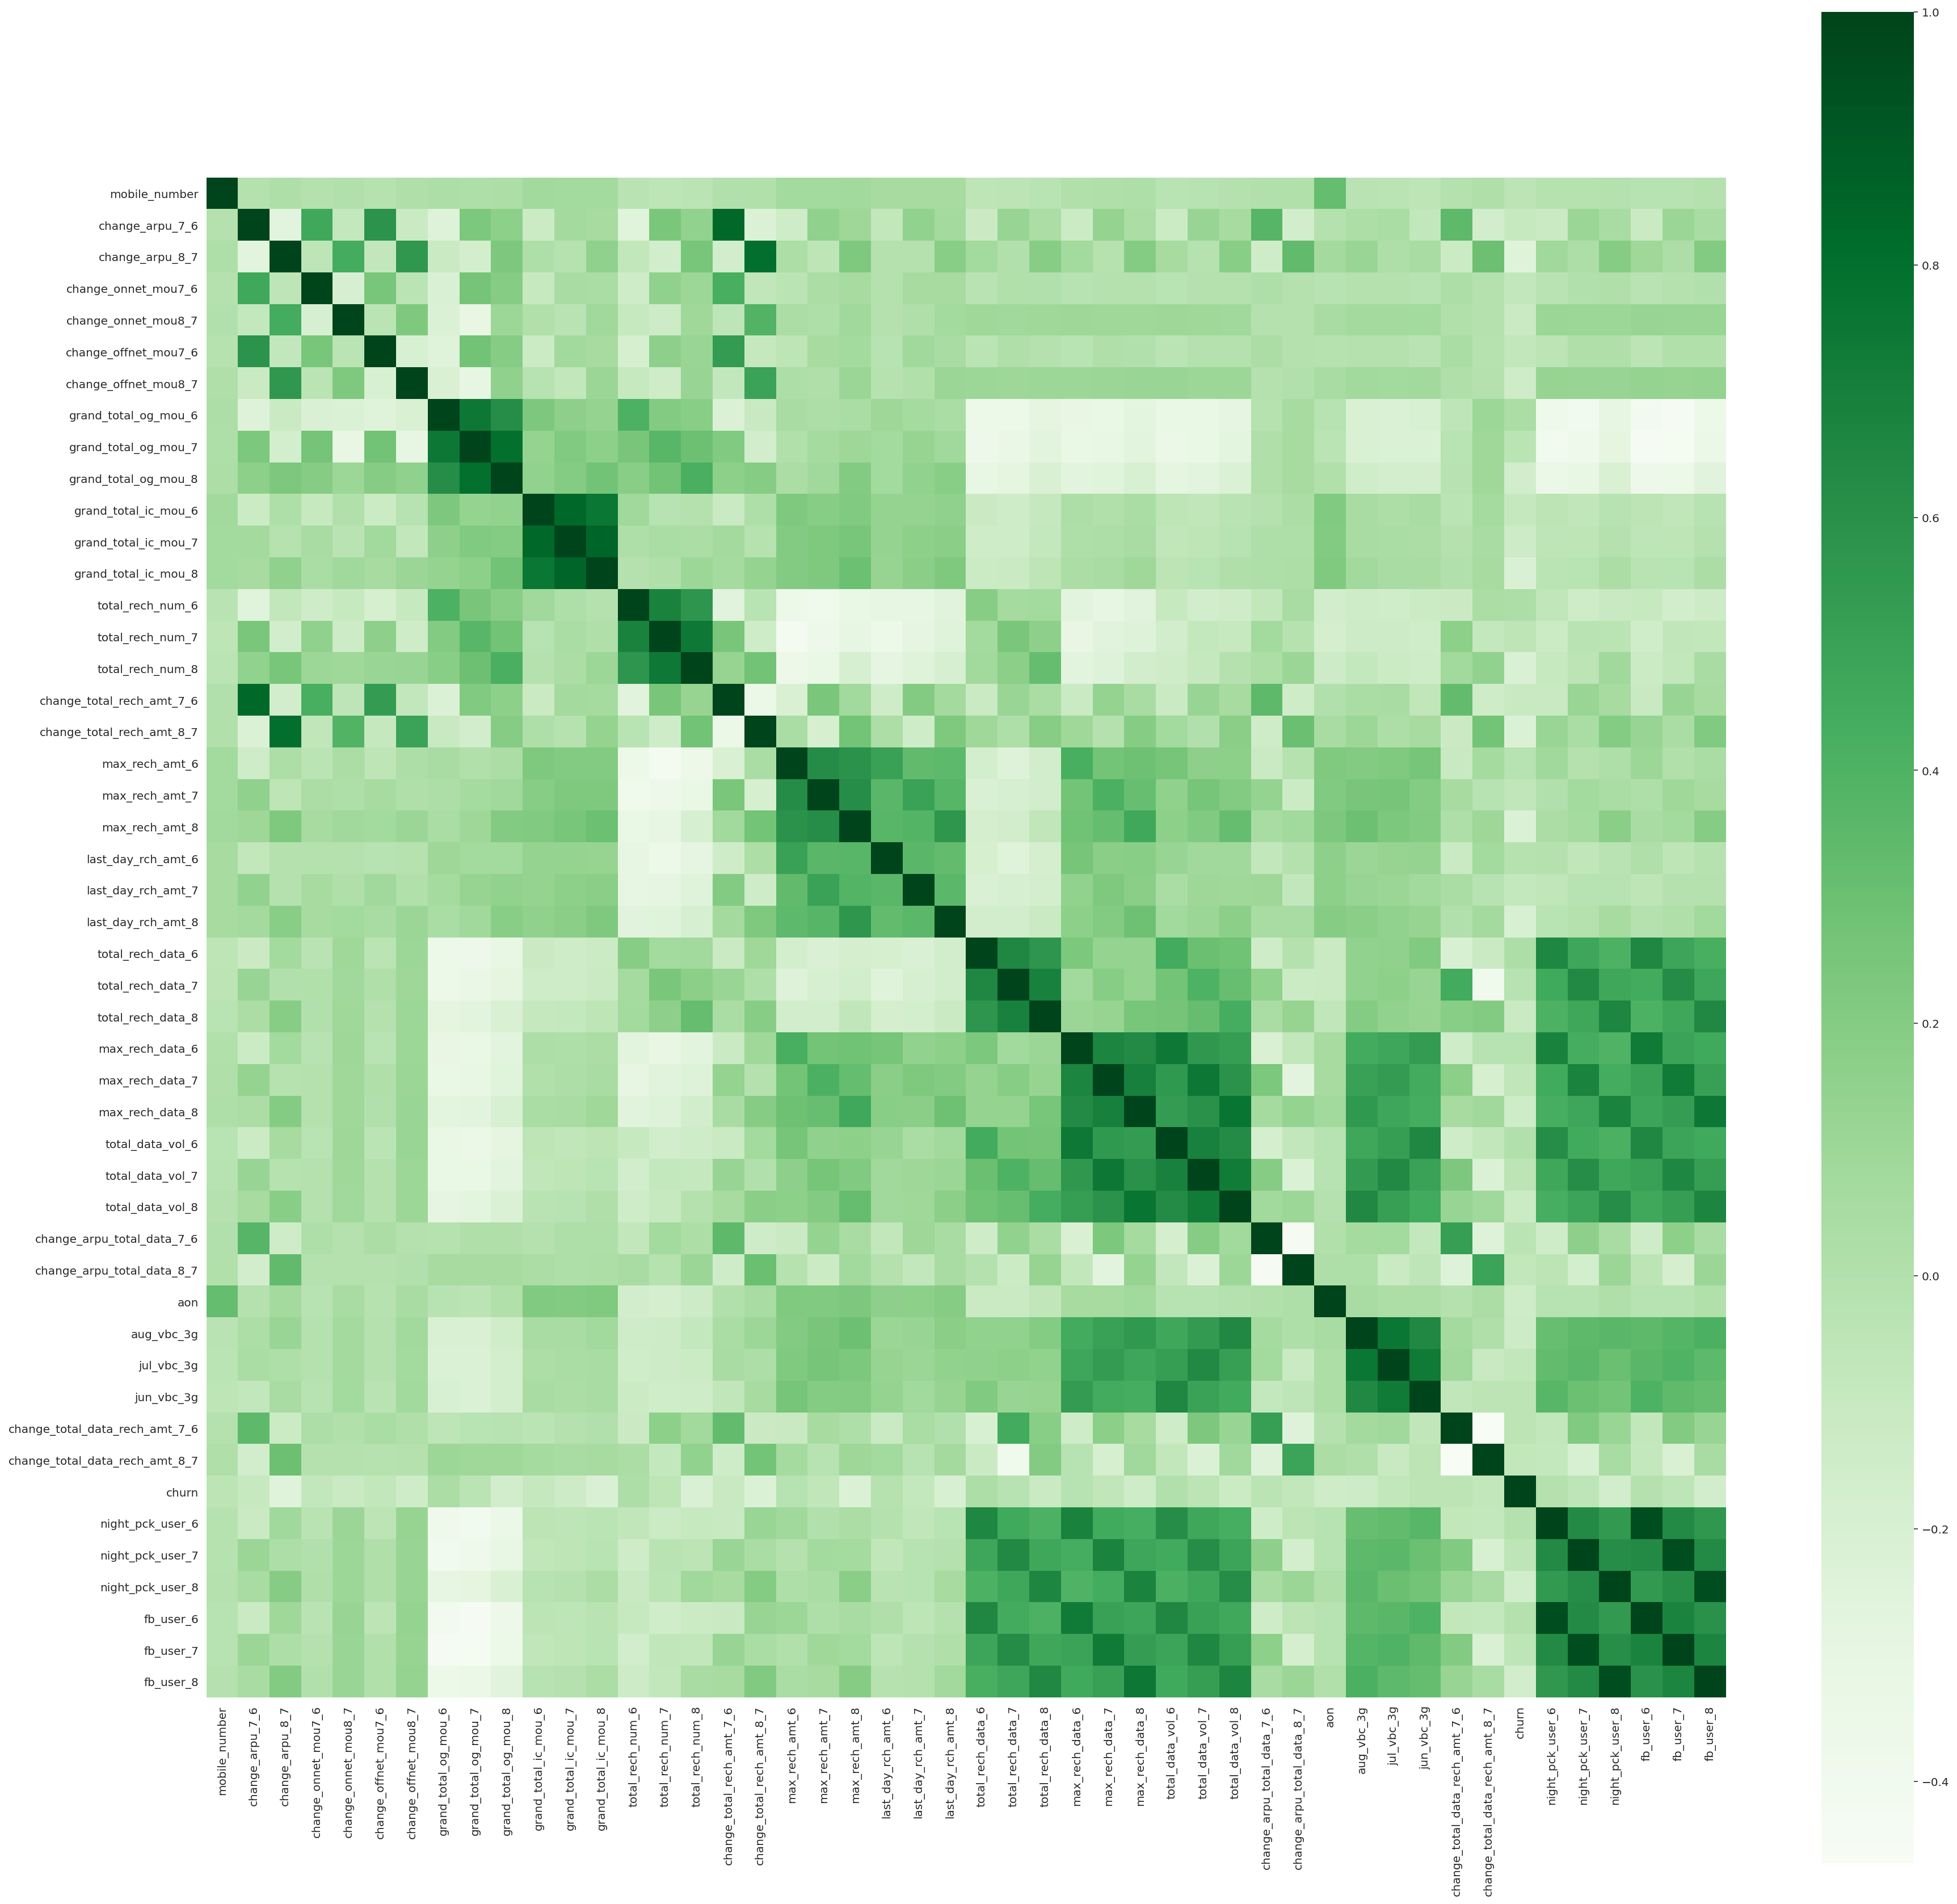

In [ ]:
# plotting a heatmap

corr_matrix = telecom_cap.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f',
            annot=False, annot_kws={'size':15}, cmap='Greens')


## Data Preprocessing and Model Building

####  Required libraries

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve,f1_score
from sklearn.metrics import precision_recall_curve, accuracy_score, make_scorer,auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb


In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
# imbalancing libraries
from collections import Counter
from imblearn.under_sampling import *
# to calculate class weight
from sklearn.utils import class_weight

###Interpretable Model

As we konw interpretable model are logistic regression and decision tree. 

#### DT without Feature Engineering

In [ ]:
telecom_data_raw.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803   132.733572   133.485251   
7      7000701601  1069.180  1349.850  3171.480    57.840000    54.680000   
8      7001524846   378.721   492.223   137.362   413.690000   351.030000   
21     7002124215   514.453   597.753   637.760   102.410000   132.110000   
23     7000887461    74.350   193.897   366.966    48.960000    50.660000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    170.199722     144.70619          0.00      134.98857   
7         52.29    453.430000     567.16000        325.91       16.23000   
8         35.08     94.660000      80.63000        136.48        0.00000   
21        85.14    757.930000     896.68000        983.39        0.00000   
23        33.58     85.410000      89.36000        205.89        0.00000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      127.833863           0.00     300.883455     276.251571           0.00   
7       33.490000          31.64      23.740000      12.590000          38.06   
8        0.000000           0.00       0.000000       0.000000           0.00   
21       0.000000           0.00       0.000000       0.000000           0.00   
23       0.000000           0.00       0.000000       0.000000           0.00   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
0             0.00            0.00            0.00            0.00   
7           487.53          609.24          350.16          626.46   
8           508.36          431.66          171.56          103.86   
21          860.34         1028.79         1068.54          207.09   
23          134.38          140.04          239.48          119.58   

    total_ic_mou_7  total_ic_mou_8  total_rech_num_6  total_rech_num_7  \
0             0.00            5.44               4.0               3.0   
7           558.04          428.74               5.0               5.0   
8            28.49           16.54              19.0              21.0   
21          131.89          261.04              22.0              26.0   
23          222.89          298.33               3.0               5.0   

    total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
0                2.0             362.0             252.0             252.0   
7                7.0            1580.0             790.0            3638.0   
8               14.0             437.0             601.0             120.0   
21              27.0             600.0             680.0             718.0   
23               4.0               0.0             454.0             439.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
0            252.0           252.0           252.0               252.0   
7           1580.0           790.0          1580.0                 0.0   
8             90.0           154.0            30.0                50.0   
21            50.0            50.0            50.0                30.0   
23             0.0           179.0           179.0                 0.0   

    last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  \
0                252.0               252.0                1.0   
7                  0.0               779.0                0.0   
8                  0.0                10.0                0.0   
21                20.0                50.0                0.0   
23               179.0                 0.0                0.0   

    total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
0                 1.0                1.0            252.0            252.0   
7                 0.0                0.0              0.0              0.0   
8                 2.0                3.0              0.0            154.0   
21                0.0                0.0              0.0              0.0   
23                2.0               

In [ ]:
model_data = telecom_data_raw.drop('mobile_number', axis=1)
model_data.reset_index(drop=True, inplace=True)
#model_data.drop('index', axis=1, inplace=True)
model_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803   132.733572   133.485251         0.00   
1  1069.180  1349.850  3171.480    57.840000    54.680000        52.29   
2   378.721   492.223   137.362   413.690000   351.030000        35.08   
3   514.453   597.753   637.760   102.410000   132.110000        85.14   
4    74.350   193.897   366.966    48.960000    50.660000        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0    170.199722     144.70619          0.00      134.98857     127.833863   
1    453.430000     567.16000        325.91       16.23000      33.490000   
2     94.660000      80.63000        136.48        0.00000       0.000000   
3    757.930000     896.68000        983.39        0.00000       0.000000   
4     85.410000      89.36000        205.89        0.00000       0.000000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  total_og_mou_6  \
0           0.00     300.883455     276.251571           0.00            0.00   
1          31.64      23.740000      12.590000          38.06          487.53   
2           0.00       0.000000       0.000000           0.00          508.36   
3           0.00       0.000000       0.000000           0.00          860.34   
4           0.00       0.000000       0.000000           0.00          134.38   

   total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
0            0.00            0.00            0.00            0.00   
1          609.24          350.16          626.46          558.04   
2          431.66          171.56          103.86           28.49   
3         1028.79         1068.54          207.09          131.89   
4          140.04          239.48          119.58          222.89   

   total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0            5.44               4.0               3.0               2.0   
1          428.74               5.0               5.0               7.0   
2           16.54              19.0              21.0              14.0   
3          261.04              22.0              26.0              27.0   
4          298.33               3.0               5.0               4.0   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0             362.0             252.0             252.0           252.0   
1            1580.0             790.0            3638.0          1580.0   
2             437.0             601.0             120.0            90.0   
3             600.0             680.0             718.0            50.0   
4               0.0             454.0             439.0             0.0   

   max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0           252.0           252.0               252.0               252.0   
1           790.0          1580.0                 0.0                 0.0   
2           154.0            30.0                50.0                 0.0   
3            50.0            50.0                30.0                20.0   
4           179.0           179.0                 0.0               179.0   

   last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0               252.0                1.0                1.0   
1               779.0                0.0                0.0   
2                10.0                0.0                2.0   
3                50.0                0.0                0.0   
4                 0.0                0.0                2.0   

   total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                1.0            252.0            252.0            252.0   
1                0.0              0.0              0.0              0.0   
2                3.0              0.0            154.0             23.0   
3                0.0              0.0              0.0              0.0   
4                2.0              0.0            179.0            179.0   



In [ ]:
# independent features
X = model_data.drop("churn",axis=1)
# putting Target variable in y
y = model_data["churn"].astype(int)
print(X.shape, y.shape)

(30001, 82) (30001,)


In [ ]:
# spliting data into trian and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 42, 
                                                    stratify = y)

In [ ]:
X_train.shape,y_train.shape

((24000, 82), (24000,))

In [ ]:
X_test.shape,  y_test.shape

((6001, 82), (6001,))

In [ ]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()  

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Not Churn', "Churn"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth= 3, min_samples_split= 80, 
                                       max_features='auto', random_state=42, class_weight="balanced")

In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
gph = get_dt_graph(dt_classifier)

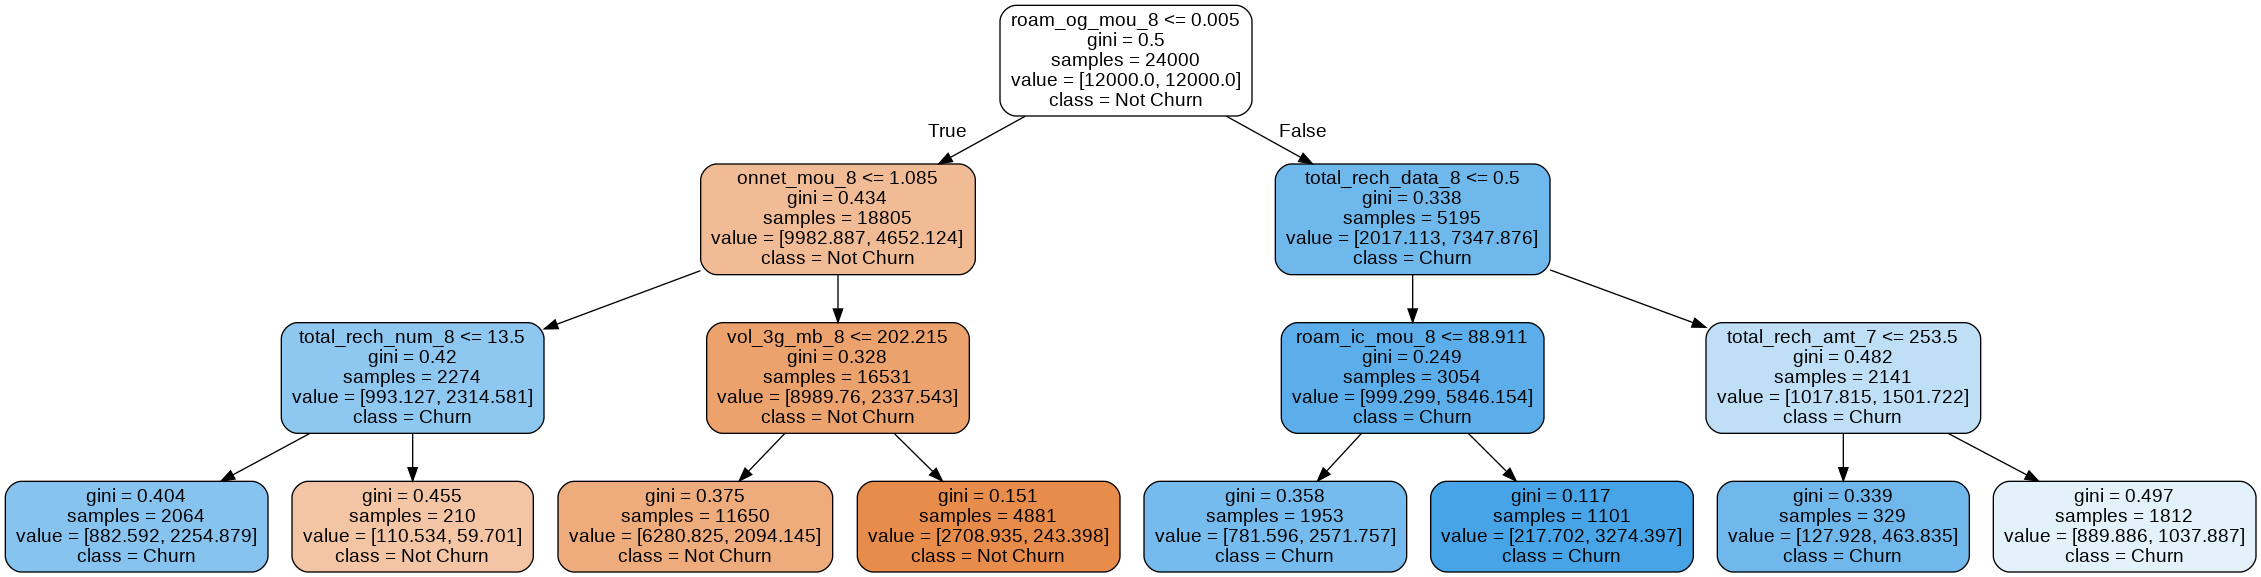

In [ ]:
Image(gph.create_png())

In [ ]:
print("Accuracy score for train data: ")
accuracy_score(y_train, dt_classifier.predict(X_train))

Accuracy score for train data: 


0.7629166666666667

In [ ]:
print("Accuracy score for test data: ")
accuracy_score(y_test, dt_classifier.predict(X_test))

Accuracy score for test data: 


0.7570404932511248

In [ ]:
print("Precision score for the training model : ", precision_score(y_train, dt_classifier.predict(X_train)))
print("----------------")
print("Recall score for the training model: ",recall_score(y_train, dt_classifier.predict(X_train)))

Precision score for the training model :  0.28805620608899296
----------------
Recall score for the training model:  0.8002296211251435


In [ ]:
print("ROC-AUC score for training: ",roc_auc_score(y_train, dt_classifier.predict(X_train)))
print("-----------------")
print("ROC-AUC score for testing: ",roc_auc_score(y_test, dt_classifier.predict(X_test)))

ROC-AUC score for training:  0.7792937510404322
-----------------
ROC-AUC score for testing:  0.7695788152259694


In [ ]:
print("Precision score for test dataset: ",precision_score(y_test, dt_classifier.predict(X_test)))
print("Recall score for the test dataset: ",recall_score(y_test, dt_classifier.predict(X_test)))

Precision score for test dataset:  0.2801747678864009
Recall score for the test dataset:  0.7856049004594181


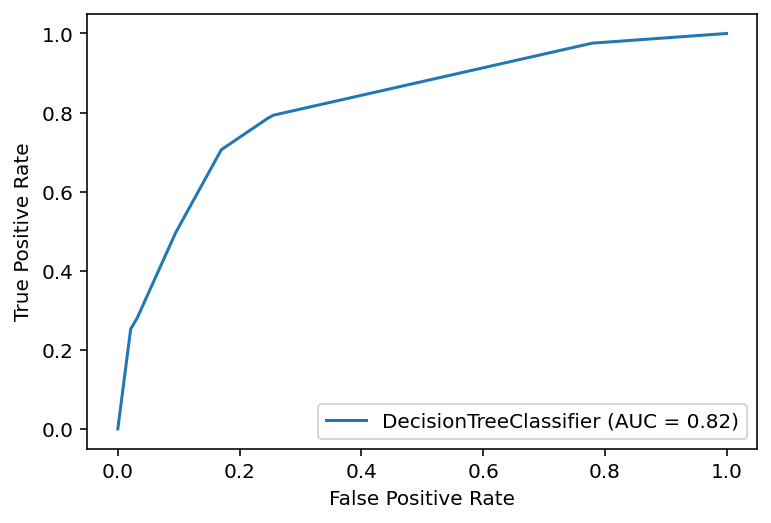

In [ ]:
plot_roc_curve(dt_classifier, X_test, y_test)

#### Split the data into train and test set

In [ ]:
telecom_derived.head()

mobile_number  change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0      7000842753           17.431           -1.013             0.751679   
7      7000701601          280.670         1821.630            -3.160000   
8      7001524846          113.502         -354.861           -62.660000   
21     7002124215           83.300           40.007            29.700000   
23     7000887461          119.547          173.069             1.700000   

    change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0           -133.485251            -25.493532            -144.70619   
7             -2.390000            113.730000            -241.25000   
8           -315.950000            -14.030000              55.85000   
21           -46.970000            138.750000              86.71000   
23           -17.080000              3.950000             116.53000   

    grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0             300.883455            276.251571                  0.00   
7             511.270000            621.830000                388.22   
8             508.360000            431.660000                171.56   
21            860.340000           1028.790000               1068.54   
23            134.380000            140.040000                239.48   

    grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0              134.98857            127.833863                  5.44   
7              642.69000            591.530000                460.38   
8              103.86000             28.490000                 16.54   
21             207.09000            131.890000                261.04   
23             119.58000            222.890000                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0                4.0               3.0               2.0   
7                5.0               5.0               7.0   
8               19.0              21.0              14.0   
21              22.0              26.0              27.0   
23               3.0               5.0               4.0   

    change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
0                      -110.0                        0.0           252.0   
7                      -790.0                     2848.0          1580.0   
8                       164.0                     -481.0            90.0   
21                       80.0                       38.0            50.0   
23                      454.0                      -15.0             0.0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0           252.0               252.0               252.0   
7            790.0          1580.0                 0.0                 0.0   
8            154.0            30.0                50.0                 0.0   
21            50.0            50.0                30.0                20.0   
23           179.0           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    total_data_vol_6  total_data_vol_7  total_data_vol_8  \
0              113.7            152.08            115.36   
7    

In [ ]:
model_data = telecom_derived.drop('mobile_number', axis=1)
model_data.reset_index(drop=True, inplace=True)
#model_data.drop('index', axis=1, inplace=True)
model_data.head()

change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  change_onnet_mou8_7  \
0           17.431           -1.013             0.751679          -133.485251   
1          280.670         1821.630            -3.160000            -2.390000   
2          113.502         -354.861           -62.660000          -315.950000   
3           83.300           40.007            29.700000           -46.970000   
4          119.547          173.069             1.700000           -17.080000   

   change_offnet_mou7_6  change_offnet_mou8_7  grand_total_og_mou_6  \
0            -25.493532            -144.70619            300.883455   
1            113.730000            -241.25000            511.270000   
2            -14.030000              55.85000            508.360000   
3            138.750000              86.71000            860.340000   
4              3.950000             116.53000            134.380000   

   grand_total_og_mou_7  grand_total_og_mou_8  grand_total_ic_mou_6  \
0            276.251571                  0.00             134.98857   
1            621.830000                388.22             642.69000   
2            431.660000                171.56             103.86000   
3           1028.790000               1068.54             207.09000   
4            140.040000                239.48             119.58000   

   grand_total_ic_mou_7  grand_total_ic_mou_8  total_rech_num_6  \
0            127.833863                  5.44               4.0   
1            591.530000                460.38               5.0   
2             28.490000                 16.54              19.0   
3            131.890000                261.04              22.0   
4            222.890000                298.33               3.0   

   total_rech_num_7  total_rech_num_8  change_total_rech_amt_7_6  \
0               3.0               2.0                     -110.0   
1               5.0               7.0                     -790.0   
2              21.0              14.0                      164.0   
3              26.0              27.0                       80.0   
4               5.0               4.0                      454.0   

   change_total_rech_amt_8_7  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                        0.0           252.0           252.0           252.0   
1                     2848.0          1580.0           790.0          1580.0   
2                     -481.0            90.0           154.0            30.0   
3                       38.0            50.0            50.0            50.0   
4                      -15.0             0.0           179.0           179.0   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0               252.0               252.0               252.0   
1                 0.0                 0.0               779.0   
2                50.0                 0.0                10.0   
3                30.0                20.0                50.0   
4                 0.0               179.0                 0.0   

   total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  \
0                1.0                1.0                1.0            252.0   
1                0.0                0.0                0.0              0.0   
2                0.0                2.0                3.0              0.0   
3                0.0                0.0                0.0              0.0   
4                0.0                2.0                2.0              0.0   

   max_rech_data_7  max_rech_data_8  total_data_vol_6  total_data_vol_7  \
0            252.0            252.0             113.7            152.08   
1              0.0              0.0               0.0              0.00   
2            154.0             23.0               0.0           1106.95   
3              0.0              0.0               0.0              0.00   
4            179.0            179.0               0.0            599.57   

   total_data_vol_8  change_arpu_total_data_7_6  cha

In [ ]:
# independent features
X = model_data.drop("churn",axis=1)
print(X.shape)

(30001, 46)


In [ ]:
# putting Target variable in y

y = model_data["churn"].astype(int)
print(y.shape)

(30001,)


In [ ]:
# spliting data into trian and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 42, 
                                                    stratify = y)

In [ ]:
X_train.shape,y_train.shape

((24000, 46), (24000,))

In [ ]:
X_test.shape,  y_test.shape

((6001, 46), (6001,))

#### Decision Tree

##### Before data balancing techniques

In [ ]:
dt_trunc = DecisionTreeClassifier(max_depth= 4, min_samples_split= 80,max_features='auto', random_state=42)

In [ ]:
dt_trunc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
gph = get_dt_graph(dt_trunc)

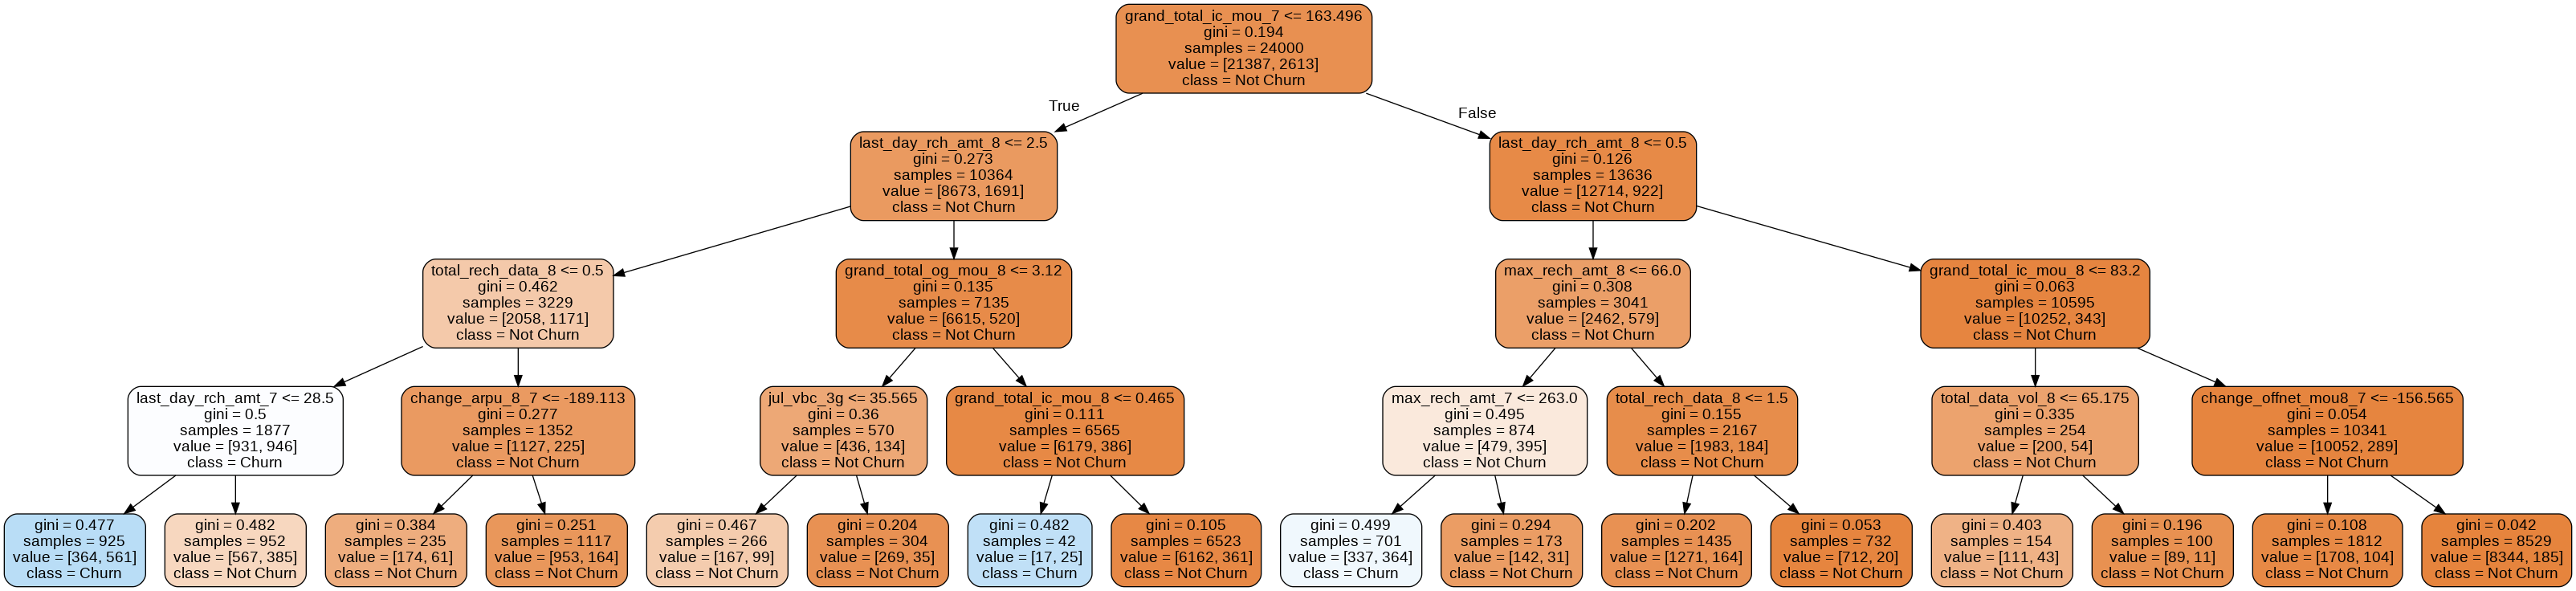

In [ ]:
Image(gph.create_png())

In [ ]:
print("Training Confusion-Matrix of the DT model:\n", confusion_matrix(y_train, dt_trunc.predict(X_train)))

Training Confusion-Matrix of the DT model:
 [[20669   718]
 [ 1663   950]]


In [ ]:
print("Testing Confusion-Matrix of the DT model:\n", confusion_matrix(y_test, dt_trunc.predict(X_test)))

Testing Confusion-Matrix of the DT model:
 [[5173  175]
 [ 435  218]]


#### Adding Class-weight

###### Balanced Class Weight

In [ ]:
unique_classes = list(y_train.unique())
unique_classes

[0, 1]

In [ ]:
uniq_dict = {}
for classes in unique_classes:
    uniq_dict[classes] = y_train.shape[0]/(len(unique_classes)* (y_train.loc[y_train == classes].shape[0]))

In [ ]:
uniq_dict

{0: 0.5610885117127227, 1: 4.592422502870264}

In [ ]:
class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)

array([0.56108851, 4.5924225 ])

In [ ]:
dt_trunc = DecisionTreeClassifier(max_depth= 5, min_samples_split= 80, max_features='auto', 
                                  random_state=42, class_weight="balanced")

In [ ]:
dt_trunc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

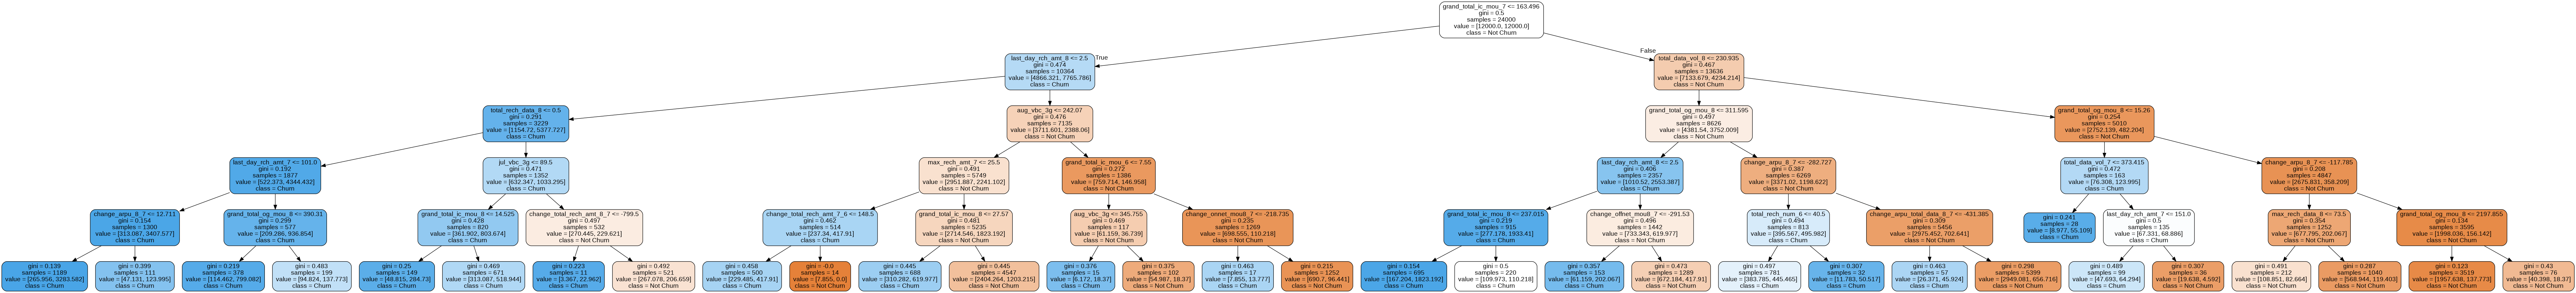

In [ ]:
gph = get_dt_graph(dt_trunc)
Image(gph.create_png())

In [ ]:
print("Training Confusion-Matrix of the DT model:\n", confusion_matrix(y_train, dt_trunc.predict(X_train)))

Training Confusion-Matrix of the DT model:
 [[17362  4025]
 [  645  1968]]


In [ ]:
print("Testing Confusion-Matrix of the DT model:\n", confusion_matrix(y_test, dt_trunc.predict(X_test)))

Testing Confusion-Matrix of the DT model:
 [[4333 1015]
 [ 181  472]]


In [ ]:
print("Accuracy score for test data: ")
accuracy_score(y_test, dt_trunc.predict(X_test))

Accuracy score for test data: 


0.8006998833527745

In [ ]:
print("Precision score for the training model : ", precision_score(y_train, dt_trunc.predict(X_train)))
print("----------------")
print("Recall score for the training model: ",recall_score(y_train, dt_trunc.predict(X_train)))

Precision score for the training model :  0.32838311363257133
----------------
Recall score for the training model:  0.7531572904707233


In [ ]:
print("ROC-AUC score for training: ",roc_auc_score(y_train, dt_trunc.predict(X_train)))
print("-----------------")
print("ROC-AUC score for testing: ",roc_auc_score(y_test, dt_trunc.predict(X_test)))

ROC-AUC score for training:  0.7824794260835406
-----------------
ROC-AUC score for testing:  0.7665135941245801


In [ ]:
print("Precision score for test dataset: ",precision_score(y_test, dt_trunc.predict(X_test)))
print("Recall score for the test dataset: ",recall_score(y_test, dt_trunc.predict(X_test)))

Precision score for test dataset:  0.31741761936785473
Recall score for the test dataset:  0.7228177641653905


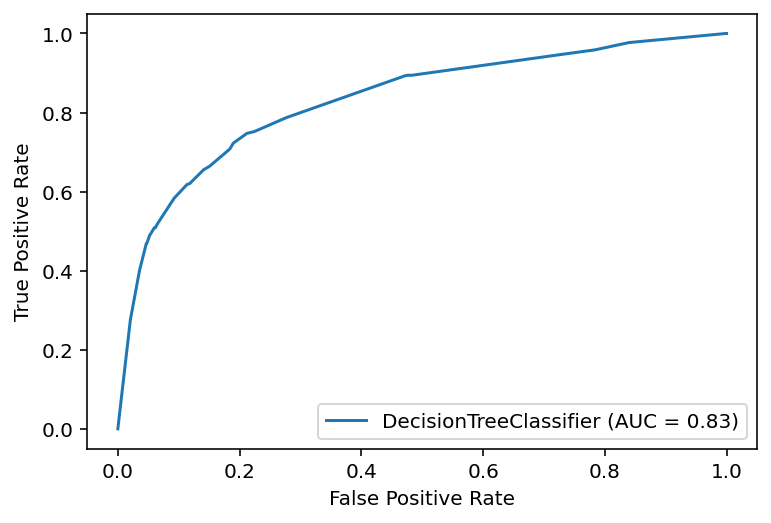

In [ ]:
plot_roc_curve(dt_trunc, X_test, y_test)

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=80, 
                                       class_weight={0:1, 1:8}, random_state=42, 
                                       max_features='auto')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 8},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=80,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

In [ ]:
# Analysis on training side 
y_pred = dt_classifier.predict(X_train)
precision_score(y_train, y_pred), recall_score(y_train,y_pred)

(0.3460698689956332, 0.7278989667049368)

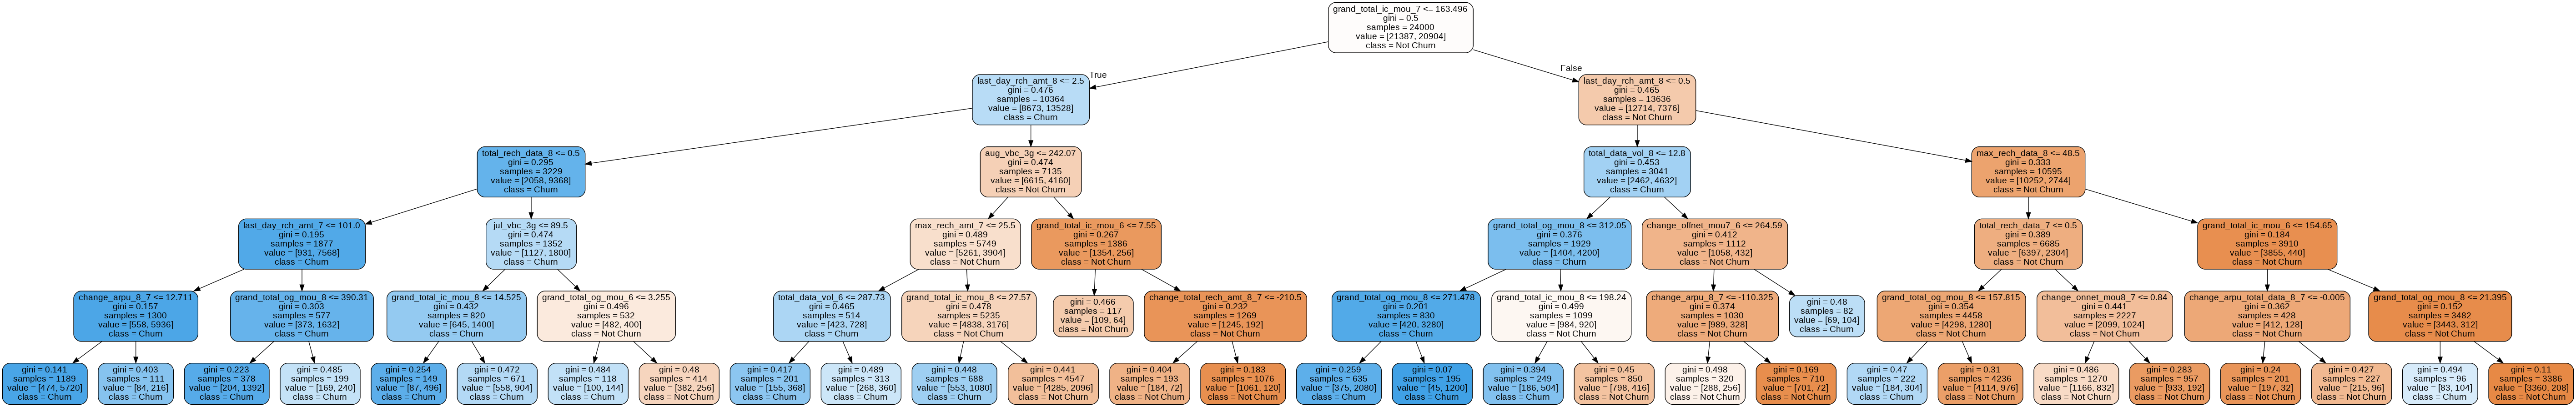

In [ ]:
gph = get_dt_graph(dt_classifier)
Image(gph.create_png())

In [ ]:
confusion_matrix(y_train,y_pred)

array([[17793,  3594],
       [  711,  1902]])

In [ ]:
# Analysis on testing side
y_pred = dt_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels = [0,1]))

[[4456  892]
 [ 199  454]]


In [ ]:
precision_score(y_test, y_pred), recall_score(y_test,y_pred)

(0.337295690936107, 0.6952526799387443)

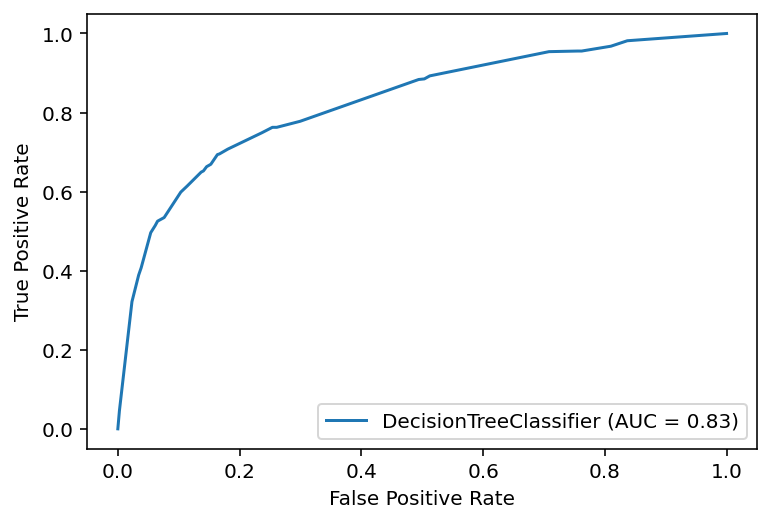

In [ ]:
plot_roc_curve(dt_classifier, X_test, y_test)

##### Using GridSerchCV

In [ ]:
# creating a dtaframe to keep record of model evaluation:
columns = ["Model_Name","Recall_Train","Recall_Test","Accuracy_Train","Accuracy_Test","Precision_Train",
"Precision_Test"]


evaluation_df = pd.DataFrame(columns=columns)

In [ ]:
## creating function to keep record of model evaluation
def evaluation(model:str,y_train_pred, y_test_pred, y_train=y_train, y_test=y_test ):
    x = {"Model_Name":model, 
                      "Recall_Train": recall_score(y_train, y_train_pred),
                      "Recall_Test":recall_score(y_test, y_test_pred),
                      "Accuracy_Train":accuracy_score(y_train, y_train_pred),
                      "Accuracy_Test":accuracy_score(y_test, y_test_pred),
                      "Precision_Train":precision_score(y_train, y_train_pred),
                      "Precision_Test":precision_score(y_test, y_test_pred)}
    
    return x


In [ ]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

We can try to find the optimal value for `class_weight`.

In [ ]:
%%time
estimator = DecisionTreeClassifier(random_state=42,)
weights= np.linspace(0.5, 1.5, 20)
params = {'max_depth':[5,7],'max_features':['log2', 'auto'], 
          'min_samples_leaf':[60,80,100], 'class_weight':[{0:x, 1: 4.0 + x} for x in weights]}

grid_search = GridSearchCV(estimator=estimator, param_grid=params,
                           scoring='recall', n_jobs=-1, cv = 5, verbose=1)
results = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:   35.9s


CPU times: user 4.13 s, sys: 341 ms, total: 4.47 s
Wall time: 49 s


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   48.8s finished


In [ ]:
results.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.5, 1: 4.5},
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

In [ ]:
results.best_params_

{'class_weight': {0: 0.5, 1: 4.5},
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 100}

In [ ]:
results.best_score_

0.7573445272265079

In [ ]:
grid_results = pd.DataFrame({'weights':results.cv_results_['param_class_weight'],'recall_score':results.cv_results_['mean_test_score']})
grid_results.head()

weights  recall_score
0  {0: 0.5, 1: 4.5}      0.730958
1  {0: 0.5, 1: 4.5}      0.745517
2  {0: 0.5, 1: 4.5}      0.748541
3  {0: 0.5, 1: 4.5}      0.732895
4  {0: 0.5, 1: 4.5}      0.730985

In [ ]:
model = results.best_estimator_
model.fit(X_train,y_train)
y_train_pred =model.predict(X_train)
y_pred_test = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4456,  892],
       [ 199,  454]])

In [ ]:
eval_dict = evaluation(model="DT_with_GridSearchCV",y_train_pred=y_train_pred, y_test_pred=y_pred_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  Accuracy_Train  \
0  DT_with_GridSearchCV       0.79181     0.754977        0.752458   

   Accuracy_Test  Precision_Train  Precision_Test  
0       0.750708         0.277123        0.269546

### Model to optimise Precision-Recall

As you know that there are 46 columns which is representing data but some of them are mostly explaining data according to variance. So we can reduce the dimensionality using PCA.

In [ ]:
telecom_derived1 = telecom_derived.copy()

In [ ]:
telecom_derived1.shape

(30001, 48)

In [ ]:
telecom_derived1 = telecom_derived1.drop("mobile_number", axis=1)
X = telecom_derived1.iloc[:,:-1]
y = telecom_derived1['churn'].astype('int')
X.head()

change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
0            17.431           -1.013             0.751679   
7           280.670         1821.630            -3.160000   
8           113.502         -354.861           -62.660000   
21           83.300           40.007            29.700000   
23          119.547          173.069             1.700000   

    change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
0           -133.485251            -25.493532            -144.70619   
7             -2.390000            113.730000            -241.25000   
8           -315.950000            -14.030000              55.85000   
21           -46.970000            138.750000              86.71000   
23           -17.080000              3.950000             116.53000   

    grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
0             300.883455            276.251571                  0.00   
7             511.270000            621.830000                388.22   
8             508.360000            431.660000                171.56   
21            860.340000           1028.790000               1068.54   
23            134.380000            140.040000                239.48   

    grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
0              134.98857            127.833863                  5.44   
7              642.69000            591.530000                460.38   
8              103.86000             28.490000                 16.54   
21             207.09000            131.890000                261.04   
23             119.58000            222.890000                298.33   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0                4.0               3.0               2.0   
7                5.0               5.0               7.0   
8               19.0              21.0              14.0   
21              22.0              26.0              27.0   
23               3.0               5.0               4.0   

    change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
0                      -110.0                        0.0           252.0   
7                      -790.0                     2848.0          1580.0   
8                       164.0                     -481.0            90.0   
21                       80.0                       38.0            50.0   
23                      454.0                      -15.0             0.0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0           252.0               252.0               252.0   
7            790.0          1580.0                 0.0                 0.0   
8            154.0            30.0                50.0                 0.0   
21            50.0            50.0                30.0                20.0   
23           179.0           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    total_data_vol_6  total_data_vol_7  total_data_vol_8  \
0              113.7            152.08            115.36   
7                0.0              0.00              0.00   
8                0.0           1106

In [ ]:
X.shape,y.shape

((30001, 46), (30001,))

In [ ]:
# split into training and testing 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape

((24000, 46), (24000,))

In [ ]:
columns = list(X.columns[~X.columns.str.contains("night.*|fb.*")])

In [ ]:
# scaling the dataset 
scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_train.head()

change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
4974          0.354505        -0.321840            -0.132535   
48075         1.120138        -0.573150             0.627146   
20857        -0.052012        -0.042456            -0.018940   
13490         0.225772        -0.084403            -0.003696   
95911         1.009733         0.716097             0.040443   

       change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
4974              0.054721             -0.156251             -0.198154   
48075             0.062996              0.437155              0.083668   
20857             0.105842             -0.024455              0.127480   
13490             0.132445              0.002477              0.143955   
95911             0.219195              2.978377              1.138330   

       grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
4974              -0.196249             -0.330808             -0.411468   
48075             -0.050922              0.459174              0.534234   
20857             -0.915305             -0.905257             -0.821758   
13490             -0.912991             -0.882700             -0.779746   
95911             -0.189640              1.306511              1.963219   

       grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
4974               0.235288              0.289526             -0.045782   
48075             -0.547884             -0.526311             -0.361250   
20857             -0.751909             -0.739446             -0.747630   
13490             -0.735741             -0.687931             -0.670135   
95911             -0.816631             -0.758061             -0.633614   

       total_rech_num_6  total_rech_num_7  total_rech_num_8  \
4974          -0.193110         -0.072393         -0.539173   
48075          1.184105          1.846133          0.337026   
20857         -0.722808         -0.285563         -0.648698   
13490         -1.146567         -0.711902         -0.758223   
95911         -0.510929         -0.178978         -0.101073   

       change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
4974                    0.006193                  -0.117831       -0.098888   
48075                   1.052152                  -0.528153       -0.452870   
20857                   0.010185                   0.034638       -0.447160   
13490                   0.133944                   0.312670       -0.098888   
95911                   0.744752                   0.474108       -0.338682   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
4974        -0.113295       -0.048428            0.060581           -0.490325   
48075       -0.232751       -0.036643           -0.692260            0.202901   
20857       -0.716006       -0.649468           -0.411655           -0.414070   
13490       -0.341348       -0.048428            0.348030            0.064256   
95911       -0.243611       -0.178064            0.060581            0.189037   

       last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
4974             0.424061           0.118409           0.695489   
48075            0.268863          -0.591958           0.048359   
20857           -0.295494           0.473593           0.695489   
13490           -0.648217           0.118409          -0.598770   
95911            0.268863          -0.591958          -0.598770   

       total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
4974            0.810927         0.648415         0.618785         0.713253   
48075          -0.209036        -0.690967        -0.478567         0.731268   
20857           0.130952         0.110900        -0.340318        -0.286563   
13490           0.130952         0.648415        -0.694581         0.713253   
95911          -0.549023        -0.690967        -0.694581        -0.655865   

       total_data_vol_6  total_data_vol_7  total_data_vo

In [ ]:
X_test.head()

change_arpu_7_6  change_arpu_8_7  change_onnet_mou7_6  \
75914          486.510         -174.133              1021.20   
16249          -49.091           63.313                -0.55   
73393         -130.200          141.200                -6.50   
56558         -217.213         -580.193              -334.02   
84280          236.321          243.594                 2.76   

       change_onnet_mou8_7  change_offnet_mou7_6  change_offnet_mou8_7  \
75914          -192.030000                131.42            -94.900000   
16249             1.040000                  3.98             18.500000   
73393            80.010000                -66.23              5.650000   
56558            33.919525               -345.15            -97.896182   
84280           117.280000                 31.94            183.050000   

       grand_total_og_mou_6  grand_total_og_mou_7  grand_total_og_mou_8  \
75914               1472.53               2625.81           2338.210000   
16249                  1.84                  5.28             26.540000   
73393                240.09                167.36            253.030000   
56558               1028.96                349.79            282.173756   
84280                  0.60                 35.31            335.640000   

       grand_total_ic_mou_6  grand_total_ic_mou_7  grand_total_ic_mou_8  \
75914                 51.68                109.09            112.330000   
16249                  1.89                  0.94              5.660000   
73393                251.38                263.64            264.690000   
56558                517.26                357.52            102.006157   
84280                  0.00                  8.77             67.580000   

       total_rech_num_6  total_rech_num_7  total_rech_num_8  \
75914              17.0              28.0              18.0   
16249               4.0               9.0              10.0   
73393               7.0               4.0               4.0   
56558               7.0               2.0               0.0   
84280               2.0              10.0              19.0   

       change_total_rech_amt_7_6  change_total_rech_amt_8_7  max_rech_amt_6  \
75914                      373.0                     -102.0           120.0   
16249                      -43.0                       60.0            98.0   
73393                     -100.0                      300.0           200.0   
56558                     -672.0                     -424.0           398.0   
84280                      323.0                      207.0             0.0   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
75914           110.0           130.0               120.0                65.0   
16249            25.0            25.0                25.0                 0.0   
73393           300.0           200.0                 0.0                 0.0   
56558           398.0             0.0               252.0               398.0   
84280           198.0            50.0                 0.0                50.0   

       last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
75914                30.0                1.0                0.0   
16249                25.0                3.0                4.0   
73393               200.0                1.0                1.0   
56558                 0.0                1.0                0.0   
84280                50.0                0.0                3.0   

       total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
75914                0.0             41.0              0.0              0.0   
16249                6.0             98.0             25.0             25.0   
73393                1.0            252.0            252.0            252.0   
56558                0.0            252.0              0.0              0.0   
84280                0.0              0.0            198.0              0.0   

       total_data_vol_6  total_data_vol_7  total_data_vo

In [ ]:
X_test[columns] = scaler.transform(X_test[columns]) # scaling of test dataset

####  PCA

In [ ]:
X_train.shape, y_train.shape

((24000, 46), (24000,))

In [ ]:
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([1.78803263e-01, 1.08201800e-01, 9.08563369e-02, 7.33611849e-02,
       5.67068901e-02, 5.30764008e-02, 4.64484340e-02, 3.91416475e-02,
       3.20133825e-02, 2.75288718e-02, 2.63246246e-02, 2.42294549e-02,
       2.17411986e-02, 2.05858628e-02, 1.95990990e-02, 1.81273741e-02,
       1.75725662e-02, 1.60760788e-02, 1.30198262e-02, 1.19107645e-02,
       1.08001376e-02, 9.76580894e-03, 9.38750145e-03, 7.77792225e-03,
       7.25464274e-03, 6.93193340e-03, 6.59022492e-03, 6.30588706e-03,
       5.57805842e-03, 4.94994613e-03, 4.16869728e-03, 3.93972785e-03,
       3.11859393e-03, 2.84032599e-03, 2.64770149e-03, 2.47364052e-03,
       2.28414548e-03, 2.07626157e-03, 2.03199765e-03, 1.55784038e-03,
       1.02892275e-03, 7.19001878e-04, 2.45371618e-04, 1.95956261e-04,
       2.68369539e-06, 2.00681860e-06])

In [ ]:
#Making a scree plot for the explained variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)

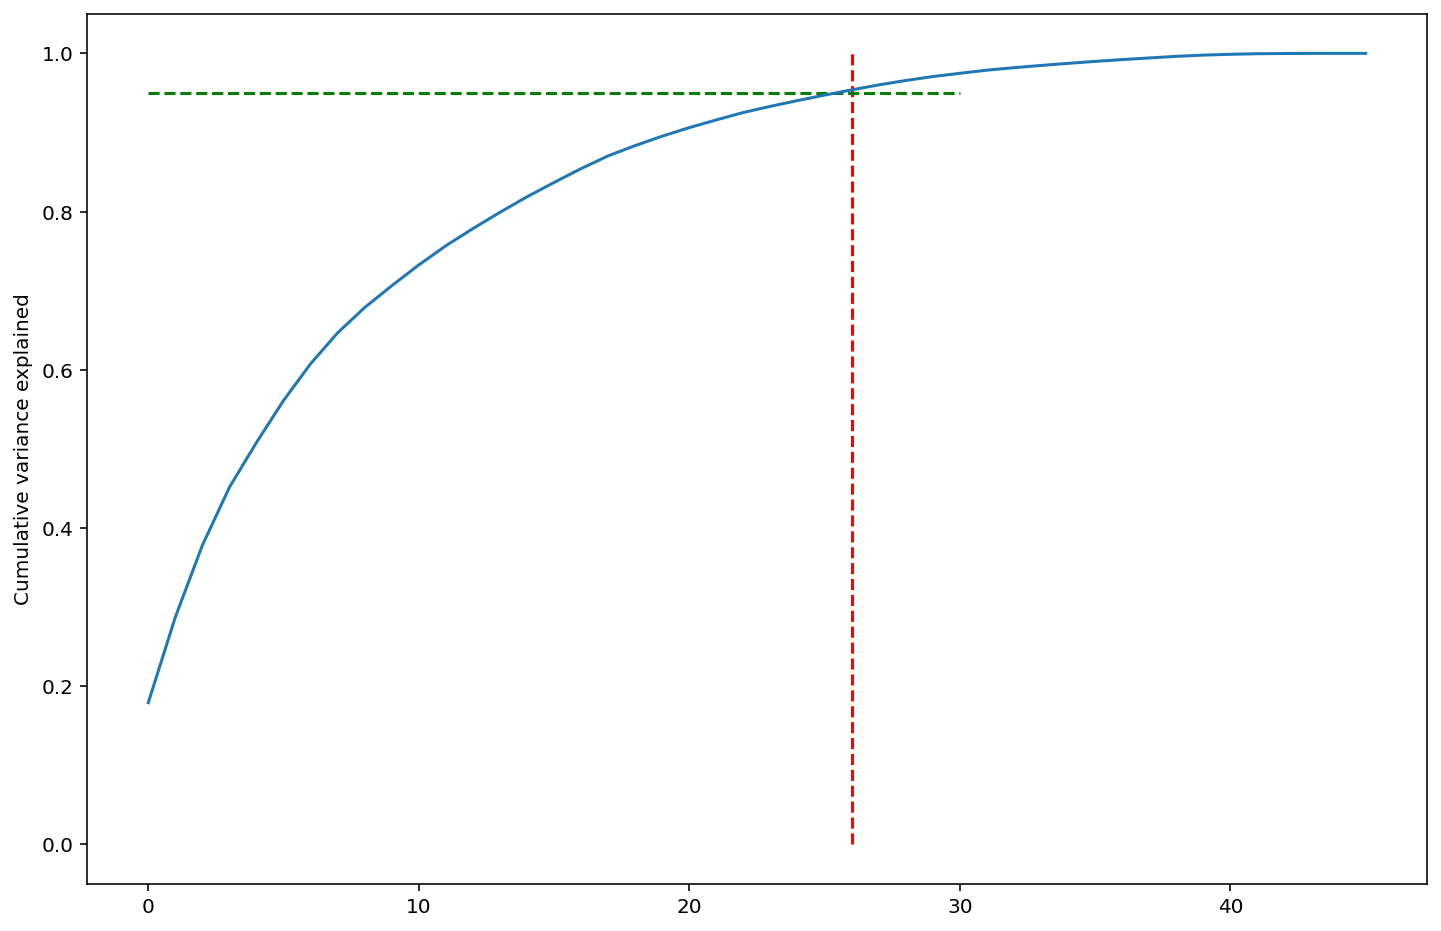

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=26, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
#creating only 27 PCA components
X_pca = IncrementalPCA(n_components=26)

In [ ]:
X_train_pca = X_pca.fit_transform(X_train)

In [ ]:
X_train_pca.shape

(24000, 26)

In [ ]:
# similar on test data
X_test_pca = X_pca.transform(X_test)
X_test_pca.shape

(6001, 26)

#### RandomForest model on PCA

In [ ]:
rf_classifier = RandomForestClassifier(class_weight='balanced')

In [ ]:
rf_classifier.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# predection on train side
y_train_pred = rf_classifier.predict(X_train_pca)

In [ ]:
print(classification_report(y_true= y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21387
           1       1.00      1.00      1.00      2613

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



In [ ]:
# evaluation on train side
evaluate_model(y_train,y_train_pred)

Accuracy Score :  100.0
ROC AUC score :  100.0
Precision score :  100.0
Recall score :  100.0


In [ ]:
# predecting on test side
y_pred_test = rf_classifier.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5348
           1       0.64      0.20      0.31       653

    accuracy                           0.90      6001
   macro avg       0.78      0.59      0.63      6001
weighted avg       0.88      0.90      0.88      6001



In [ ]:
# evaluation on test side
evaluate_model(y_test,y_pred_test)

Accuracy Score :  90.1
ROC AUC score :  59.49
Precision score :  64.25
Recall score :  20.37


In [ ]:
eval_dict = evaluation(model="RandomForest_without_tuning",y_train_pred=y_train_pred, y_test_pred=y_pred_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  Accuracy_Train  \
0         DT_with_GridSearchCV       0.79181     0.754977        0.752458   
1  RandomForest_without_tuning       1.00000     0.203675        1.000000   

   Accuracy_Test  Precision_Train  Precision_Test  
0       0.750708         0.277123        0.269546  
1       0.901016         1.000000        0.642512

##### GridSearchCV with RandomForest

In [ ]:
# instantiation of estimator for GridSearchCV
estimator = RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
params =  {
    'max_depth': [5,10,12],
    'min_samples_leaf': [25,30,35],
    'n_estimators': [ 15,20, 25],
    'max_features' : ["auto", "sqrt", "log2"],
    'class_weight':[{1:1,0:0.35},'balanced',],
    #'ccp_alpha':[0.1, 0.15]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=estimator, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = 'balanced_accuracy',return_train_score=True)

In [ ]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 11.0min finished


CPU times: user 7.16 s, sys: 292 ms, total: 7.46 s
Wall time: 11min 3s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                     

In [ ]:
rf_best = grid_search.best_estimator_

In [ ]:
# best estimator
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# best score
grid_search.best_score_

0.7755525118009527

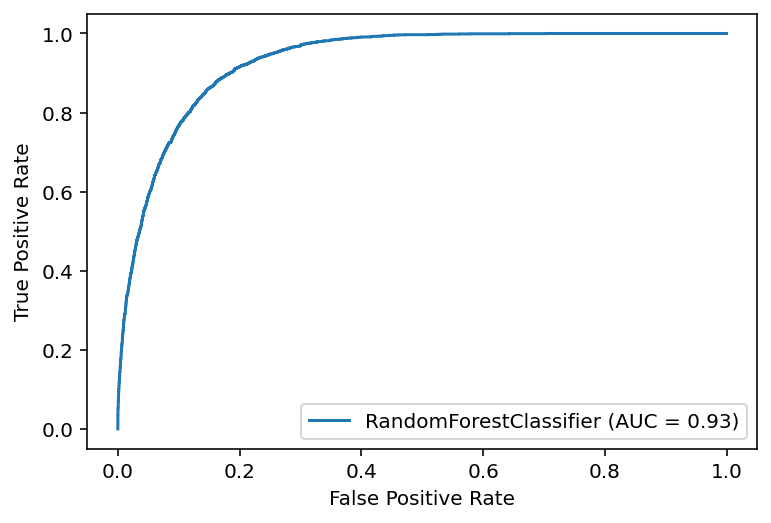

In [ ]:
# ROC-AUC curve
plot_roc_curve(rf_best, X_train_pca, y_train)
plt.show()

**AUC is 0.93, which indicates model with good predection power.**

In [ ]:
# fitting the model

rf_best.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# predection on train side

y_train_pred = rf_best.predict(X_train_pca)

In [ ]:
print(classification_report(y_true= y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93     21387
           1       0.46      0.80      0.58      2613

    accuracy                           0.87     24000
   macro avg       0.72      0.84      0.75     24000
weighted avg       0.92      0.87      0.89     24000



In [ ]:
# evaluation on train side

evaluate_model(y_train,y_train_pred)

Accuracy Score :  87.48
ROC AUC score :  84.12
Precision score :  45.72
Recall score :  79.83


In [ ]:
# predecting on test side

y_pred_test = rf_best.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      5348
           1       0.39      0.70      0.50       653

    accuracy                           0.85      6001
   macro avg       0.68      0.78      0.71      6001
weighted avg       0.90      0.85      0.87      6001



In [ ]:
# evaluation on test side

evaluate_model(y_test,y_pred_test)

Accuracy Score :  85.05
ROC AUC score :  78.3
Precision score :  39.43
Recall score :  69.68


In [ ]:
eval_dict = evaluation(model="RandomForest with tuning",y_train_pred=y_train_pred, y_test_pred=y_pred_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  Accuracy_Train  \
0         DT_with_GridSearchCV      0.791810     0.754977        0.752458   
1  RandomForest_without_tuning      1.000000     0.203675        1.000000   
2     RandomForest with tuning      0.798316     0.696784        0.874833   

   Accuracy_Test  Precision_Train  Precision_Test  
0       0.750708         0.277123        0.269546  
1       0.901016         1.000000        0.642512  
2       0.850525         0.457155        0.394281

#### XGBoost

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# predection on train side
y_train_pred = xgb_classifier.predict(X_train_pca)

In [ ]:
print(classification_report(y_true= y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     21387
           1       0.71      0.35      0.47      2613

    accuracy                           0.91     24000
   macro avg       0.82      0.67      0.71     24000
weighted avg       0.90      0.91      0.90     24000



In [ ]:
# evaluation on train side
evaluate_model(y_train,y_train_pred)

Accuracy Score :  91.38
ROC AUC score :  66.81
Precision score :  70.77
Recall score :  35.4


In [ ]:
# predecting on test side
y_pred_test = xgb_classifier.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5348
           1       0.63      0.31      0.42       653

    accuracy                           0.91      6001
   macro avg       0.78      0.64      0.68      6001
weighted avg       0.89      0.91      0.89      6001



In [ ]:
# evaluation on test side
evaluate_model(y_test,y_pred_test)

Accuracy Score :  90.53
ROC AUC score :  64.44
Precision score :  63.24
Recall score :  31.09


In [ ]:
eval_dict = evaluation(model="XGB_without_tuning",y_train_pred=y_train_pred, y_test_pred=y_pred_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  Accuracy_Train  \
0          DT_with_GridSearchCV      0.791810     0.754977        0.752458   
1   RandomForest_without_tuning      1.000000     0.203675        1.000000   
2      RandomForest with tuning      0.798316     0.696784        0.874833   
3  RandomForest_with_tuning_NCR      0.817451     0.751914        0.904298   
4            XGB_without_tuning      0.353999     0.310873        0.913750   

   Accuracy_Test  Precision_Train  Precision_Test  
0       0.750708         0.277123        0.269546  
1       0.901016         1.000000        0.642512  
2       0.850525         0.457155        0.394281  
3       0.821530         0.595816        0.350714  
4       0.905349         0.707728        0.632399

##### GridSearchCV for XGBoost

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_jobs= -1, random_state=42)

In [ ]:
params  = {'booster': ['gbtree', 'dart'],
           'eta': [0.2, 0.25, 0.3, .35],
           'max_depth':[6, 7, 8],
           'tree_method':['auto', 'gpu_hist']}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "recall",return_train_score=True)

In [ ]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 22.5min finished


CPU times: user 2.04 s, sys: 594 ms, total: 2.63 s
Wall time: 22min 28s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'booster': ['gbtree', 'dart'],
                         'eta': [0.2, 0.25, 0.3, 0.35], 'max_depth': [6, 7, 8],
                         'tree_method': [

In [ ]:
xgb_best_est = grid_search.best_estimator_

In [ ]:
# best estimator
xgb_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
# best score
grid_search.best_score_

0.34939818172494375

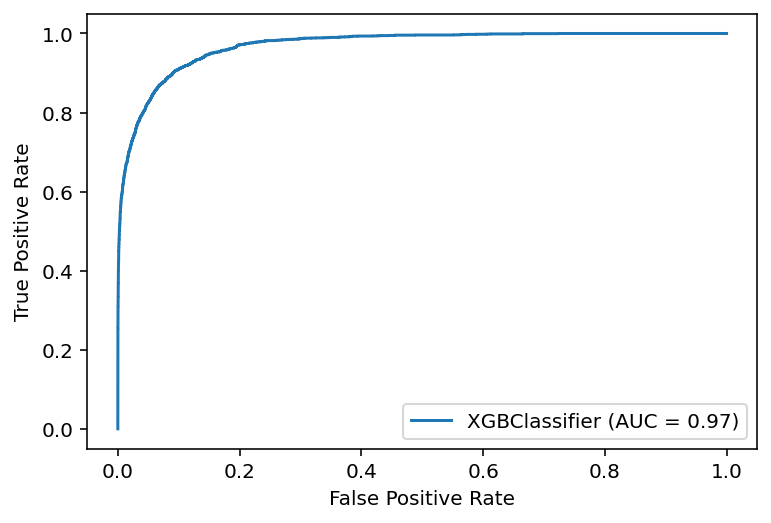

In [ ]:
# ROC-AUC curve
plot_roc_curve(xgb_best_est, X_train_pca, y_train)
plt.show()

In [ ]:
# fitting the model

xgb_best_est.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
# predection on train side

y_train_pred = xgb_best_est.predict(X_train_pca)

In [ ]:
print(classification_report(y_true= y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     21387
           1       0.92      0.59      0.72      2613

    accuracy                           0.95     24000
   macro avg       0.93      0.79      0.85     24000
weighted avg       0.95      0.95      0.94     24000



In [ ]:
# evaluation on train side

evaluate_model(y_train,y_train_pred)

Accuracy Score :  94.97
ROC AUC score :  79.27
Precision score :  91.65
Recall score :  59.2


In [ ]:
# predecting on test side

y_pred_test = xgb_best_est.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5348
           1       0.63      0.35      0.45       653

    accuracy                           0.91      6001
   macro avg       0.78      0.66      0.70      6001
weighted avg       0.89      0.91      0.90      6001



In [ ]:
# evaluation on test side

evaluate_model(y_test,y_pred_test)

Accuracy Score :  90.72
ROC AUC score :  66.43
Precision score :  63.11
Recall score :  35.38


In [ ]:
eval_dict = evaluation(model="XGB_with_tuning",y_train_pred=y_train_pred, y_test_pred=y_pred_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  Accuracy_Train  \
0          DT_with_GridSearchCV      0.791810     0.754977        0.752458   
1   RandomForest_without_tuning      1.000000     0.203675        1.000000   
2      RandomForest with tuning      0.798316     0.696784        0.874833   
3  RandomForest_with_tuning_NCR      0.817451     0.751914        0.904298   
4            XGB_without_tuning      0.353999     0.310873        0.913750   
5               XGB_with_tuning      0.592040     0.353752        0.949708   

   Accuracy_Test  Precision_Train  Precision_Test  
0       0.750708         0.277123        0.269546  
1       0.901016         1.000000        0.642512  
2       0.850525         0.457155        0.394281  
3       0.821530         0.595816        0.350714  
4       0.905349         0.707728        0.632399  
5       0.907182         0.916469        0.631148

#### Random Forest on undersampled data

In [ ]:
X_train_pca.shape

(24000, 26)

In [ ]:
y_train.shape

(24000,)

In [ ]:
# Neighbourhood cleaning rule
%%time
undersampler = NeighbourhoodCleaningRule(random_state=42,n_jobs=-1)
X_train_pca, y_train = undersampler.fit_resample(X_train_pca, y_train)
counter = Counter(y_train)
counter

CPU times: user 15.1 s, sys: 7.05 ms, total: 15.2 s
Wall time: 8.12 s


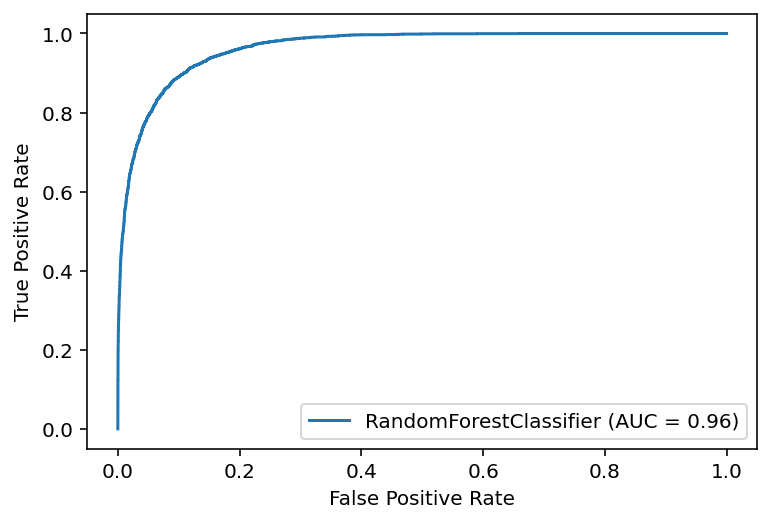

In [ ]:
# ROC-AUC curve
plot_roc_curve(grid_search.best_estimator_, X_train_pca, y_train)
plt.show()

**AUC is 0.96, which indicates model with good predection power.**

In [ ]:
# fitting the model

grid_search.best_estimator_.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# predection on train side

y_train_pred = grid_search.best_estimator_.predict(X_train_pca)

In [ ]:
print(classification_report(y_true= y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     17512
           1       0.60      0.82      0.69      2613

    accuracy                           0.90     20125
   macro avg       0.78      0.87      0.82     20125
weighted avg       0.92      0.90      0.91     20125



In [ ]:
# evaluation on train side

evaluate_model(y_train,y_train_pred)

Accuracy Score :  90.43
ROC AUC score :  86.74
Precision score :  59.58
Recall score :  81.75


In [ ]:
# predecting on test side

y_pred_test = grid_search.best_estimator_.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5348
           1       0.35      0.75      0.48       653

    accuracy                           0.82      6001
   macro avg       0.66      0.79      0.69      6001
weighted avg       0.90      0.82      0.85      6001



In [ ]:
# evaluation on test side

evaluate_model(y_test,y_pred_test)

Accuracy Score :  82.15
ROC AUC score :  79.1
Precision score :  35.07
Recall score :  75.19


In [ ]:
eval_dict = evaluation(model="RandomForest_with_tuning_NCR",y_train_pred=y_train_pred, y_test_pred=y_pred_test,
                       y_train=y_train, y_test=y_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  Accuracy_Train  \
0          DT_with_GridSearchCV      0.791810     0.754977        0.752458   
1   RandomForest_without_tuning      1.000000     0.203675        1.000000   
2      RandomForest with tuning      0.798316     0.696784        0.874833   
3  RandomForest_with_tuning_NCR      0.817451     0.751914        0.904298   

   Accuracy_Test  Precision_Train  Precision_Test  
0       0.750708         0.277123        0.269546  
1       0.901016         1.000000        0.642512  
2       0.850525         0.457155        0.394281  
3       0.821530         0.595816        0.350714

As you can see target variable is imbalanced so we need to balance it using balancing techniques.

#### Balancing using Undersampling Techniques

Before balancing the data we apply PCA

In [ ]:
X_train_pca.shape

(24000, 26)

In [ ]:
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([1.78803263e-01, 1.08201800e-01, 9.08563369e-02, 7.33611849e-02,
       5.67068901e-02, 5.30764008e-02, 4.64484340e-02, 3.91416475e-02,
       3.20133825e-02, 2.75288718e-02, 2.63246246e-02, 2.42294549e-02,
       2.17411986e-02, 2.05858628e-02, 1.95990990e-02, 1.81273741e-02,
       1.75725662e-02, 1.60760788e-02, 1.30198262e-02, 1.19107645e-02,
       1.08001376e-02, 9.76580894e-03, 9.38750145e-03, 7.77792225e-03,
       7.25464274e-03, 6.93193340e-03, 6.59022492e-03, 6.30588706e-03,
       5.57805842e-03, 4.94994613e-03, 4.16869728e-03, 3.93972785e-03,
       3.11859393e-03, 2.84032599e-03, 2.64770149e-03, 2.47364052e-03,
       2.28414548e-03, 2.07626157e-03, 2.03199765e-03, 1.55784038e-03,
       1.02892275e-03, 7.19001878e-04, 2.45371618e-04, 1.95956261e-04,
       2.68369539e-06, 2.00681860e-06])

In [ ]:
#Making a scree plot for the explained variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)

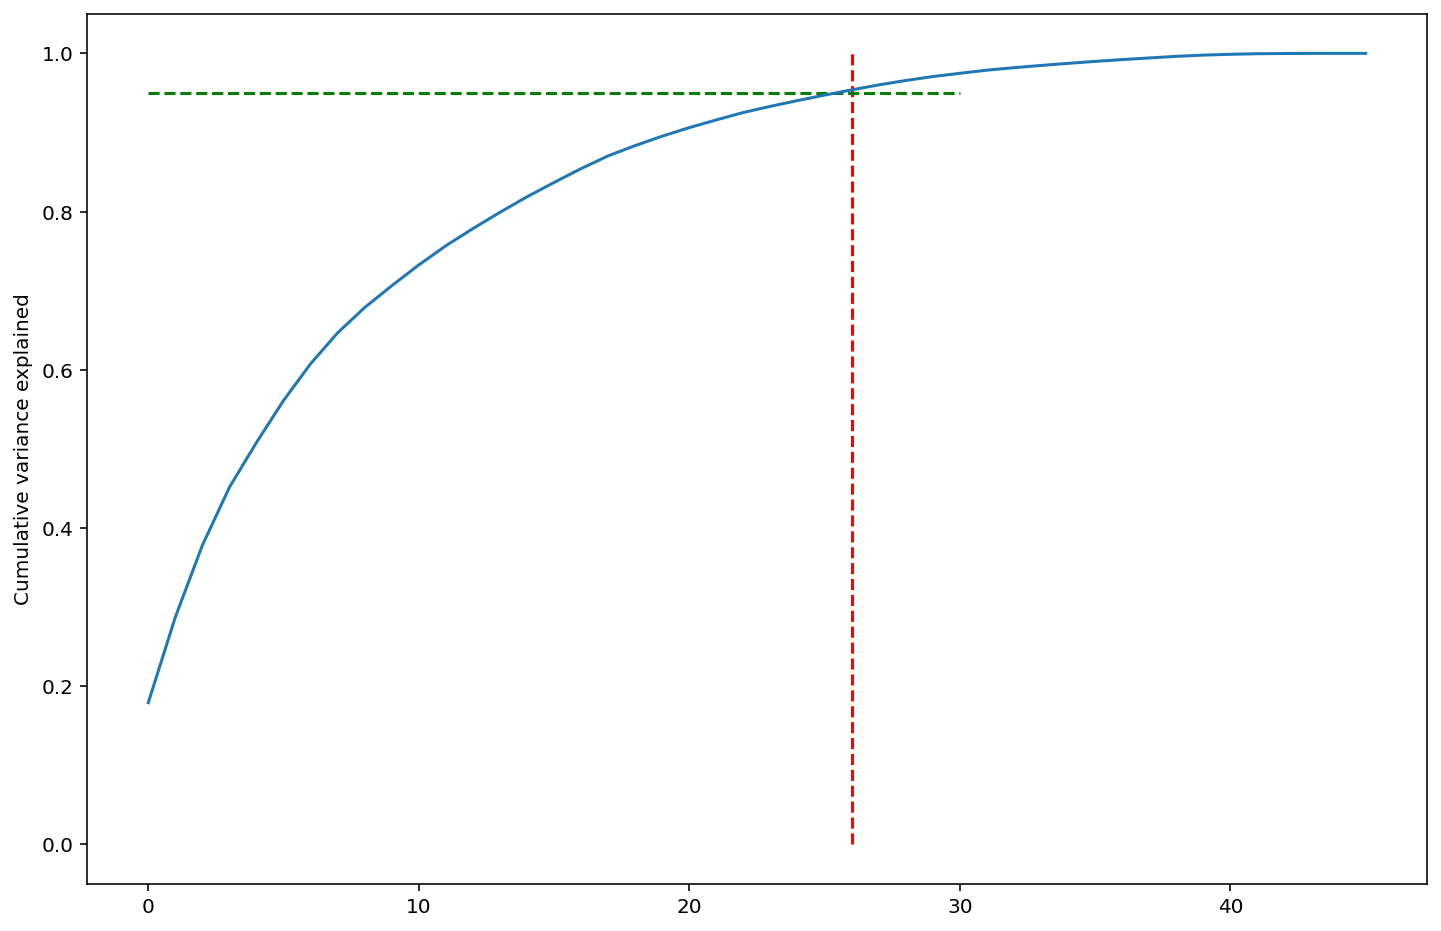

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=26, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
#creating only 26 PCA components
X_pca = IncrementalPCA(n_components=26)

In [ ]:
X_train_pca = X_pca.fit_transform(X_train)

In [ ]:
X_train_pca.shape

(24000, 26)

In [ ]:
# similar on test data
X_test_pca = X_pca.transform(X_test)
X_test_pca.shape

(6001, 26)

In [ ]:
under_sample = RandomUnderSampler(random_state = 42)
X_train_pca, y_train = under_sample.fit_resample(X_train_pca, y_train)

In [ ]:
counter = Counter(y_train)
counter

Counter({0: 2613, 1: 2613})

In [ ]:
# Neighbourhood cleaning rule
%%time
undersampler = NeighbourhoodCleaningRule(random_state=42,n_jobs=-1)
X_train_pca, y_train = undersampler.fit_resample(X_train_pca, y_train)
counter = Counter(y_train)
counter

CPU times: user 16.5 s, sys: 6.53 ms, total: 16.5 s
Wall time: 8.81 s


In [ ]:
print(counter)

Counter({0: 17512, 1: 2613})


In [ ]:
X_train_pca.shape

(20125, 26)

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# predection on train side
y_train_pred = xgb_classifier.predict(X_train_pca)

In [ ]:
print(classification_report(y_true= y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     17512
           1       0.84      0.55      0.67      2613

    accuracy                           0.93     20125
   macro avg       0.89      0.77      0.81     20125
weighted avg       0.92      0.93      0.92     20125



In [ ]:
# evaluation on train side
evaluate_model(y_train,y_train_pred)

Accuracy Score :  92.81
ROC AUC score :  76.78
Precision score :  84.06
Recall score :  55.11


In [ ]:
# predecting on test side
y_pred_test = xgb_classifier.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5348
           1       0.52      0.54      0.53       653

    accuracy                           0.90      6001
   macro avg       0.73      0.74      0.74      6001
weighted avg       0.90      0.90      0.90      6001



In [ ]:
# evaluation on test side
evaluate_model(y_test,y_pred_test)

Accuracy Score :  89.6
ROC AUC score :  73.8
Precision score :  52.16
Recall score :  53.6


In [ ]:
eval_dict = evaluation(model="XGB_without_tuning_RandomunderSampler",y_train_pred=y_train_pred, y_test_pred=y_pred_test,
                       y_train=y_train, y_test=y_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  \
0                   DT_with_GridSearchCV      0.791810     0.754977   
1            RandomForest_without_tuning      1.000000     0.203675   
2               RandomForest with tuning      0.798316     0.696784   
3           RandomForest_with_tuning_NCR      0.817451     0.751914   
4                     XGB_without_tuning      0.353999     0.310873   
5                        XGB_with_tuning      0.592040     0.353752   
6  XGB_without_tuning_RandomunderSampler      0.551091     0.535988   

   Accuracy_Train  Accuracy_Test  Precision_Train  Precision_Test  
0        0.752458       0.750708         0.277123        0.269546  
1        1.000000       0.901016         1.000000        0.642512  
2        0.874833       0.850525         0.457155        0.394281  
3        0.904298       0.821530         0.595816        0.350714  
4        0.913750       0.905349         0.707728        0.632399  
5        0.949708       0.907182         0.916469        0.631148  
6        0.928149       0.896017         0.840630        0.521610

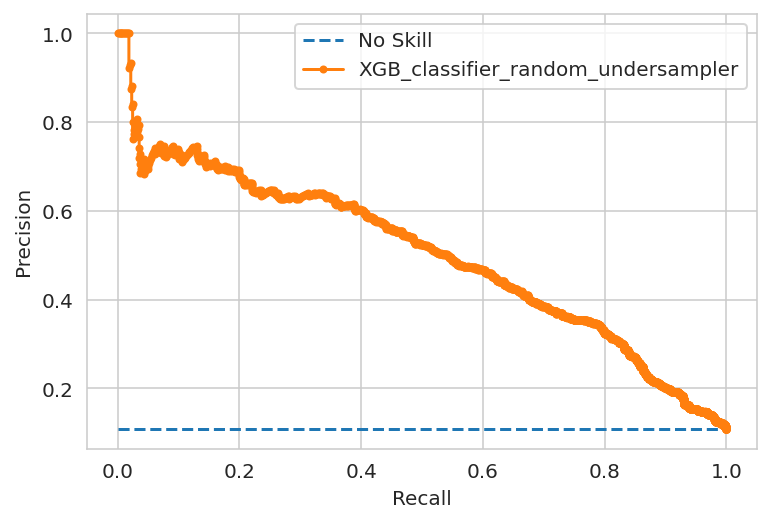

In [ ]:
# predict probabilities
xgb_probs = xgb_classifier.predict_proba(X_test_pca)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGB_classifier_random_undersampler')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_jobs= -1, random_state=42)

In [ ]:
parameters = {'learning_rate': [0.1, 0.12, 0.15],
              'max_depth': [10, 11, 12],
              'min_child_weight': [5,8,10],
              'n_estimators': [60, 80, 100],
              'gamma':[1, 1.1, 1.2],
              }

In [ ]:
params  = {'eta': [.1, .12, .15,],
           'max_depth':[1, 2, 3],
           'lambda':[1, 1.2, 1.5]}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=5, scoring = "balanced_accuracy",return_train_score=True)

In [ ]:
X_train_pca.shape

(20125, 26)

In [ ]:
y_train.shape

(20125,)

In [ ]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.3min finished


CPU times: user 3.52 s, sys: 109 ms, total: 3.63 s
Wall time: 3min 20s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.1, 0.12, 0.15], 'lambda': [1, 1.2, 1.5],
                         'max_depth': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, r

In [ ]:
xgb_best_est = grid_search.best_estimator_

In [ ]:
# best estimator
xgb_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              lambda=1, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# best score
grid_search.best_score_

0.7490138233175833

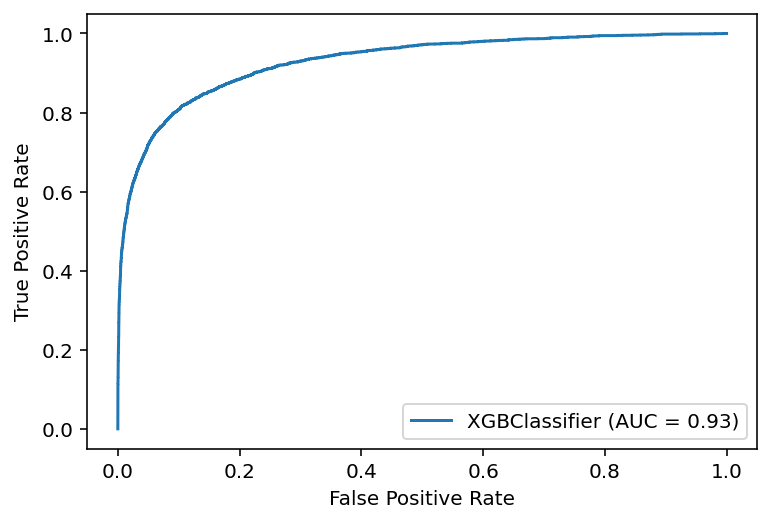

In [ ]:
# ROC-AUC curve
plot_roc_curve(xgb_best_est, X_train_pca, y_train)
plt.show()

In [ ]:
# fitting the model

xgb_best_est.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              lambda=1, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# prediction on train side

y_train_pred = xgb_best_est.predict(X_train_pca)

In [ ]:
print(classification_report(y_true= y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     17512
           1       0.84      0.55      0.67      2613

    accuracy                           0.93     20125
   macro avg       0.89      0.77      0.81     20125
weighted avg       0.92      0.93      0.92     20125



In [ ]:
# evaluation on train side

evaluate_model(y_train,y_train_pred)

Accuracy Score :  92.81
ROC AUC score :  76.78
Precision score :  84.06
Recall score :  55.11


In [ ]:
# predecting on test side

y_pred_test = xgb_best_est.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5348
           1       0.52      0.54      0.53       653

    accuracy                           0.90      6001
   macro avg       0.73      0.74      0.74      6001
weighted avg       0.90      0.90      0.90      6001



In [ ]:
# evaluation on test side
evaluate_model(y_test,y_pred_test)

Accuracy Score :  89.6
ROC AUC score :  73.8
Precision score :  52.16
Recall score :  53.6


In [ ]:
eval_dict = evaluation(model="XGB_with_tuning_shallow",y_train_pred=y_train_pred, y_test_pred=y_pred_test,
                       y_train=y_train, y_test=y_test)

In [ ]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

Model_Name  Recall_Train  Recall_Test  \
0                   DT_with_GridSearchCV      0.791810     0.754977   
1            RandomForest_without_tuning      1.000000     0.203675   
2               RandomForest with tuning      0.798316     0.696784   
3           RandomForest_with_tuning_NCR      0.817451     0.751914   
4                     XGB_without_tuning      0.353999     0.310873   
5                        XGB_with_tuning      0.592040     0.353752   
6  XGB_without_tuning_RandomunderSampler      0.551091     0.535988   
7                    XGB_with_tuning_NCR      0.885572     0.598775   
8                XGB_with_tuning_shallow      0.551091     0.535988   

   Accuracy_Train  Accuracy_Test  Precision_Train  Precision_Test  
0        0.752458       0.750708         0.277123        0.269546  
1        1.000000       0.901016         1.000000        0.642512  
2        0.874833       0.850525         0.457155        0.394281  
3        0.904298       0.821530         0.595816        0.350714  
4        0.913750       0.905349         0.707728        0.632399  
5        0.949708       0.907182         0.916469        0.631148  
6        0.928149       0.896017         0.840630        0.521610  
7        0.984099       0.892685         0.991006        0.505821  
8        0.928149       0.896017         0.840630        0.521610